In [ ]:
# Data Exploration and Understanding:

In [1]:
import pandas as pd
chunk_size = 100000  # Try with a smaller chunk size
chunks = []
for chunk in pd.read_csv('C:/Users/ncssa/Downloads/Small_Sized-20241107T071105Z-001/Small_Sized/new_train_sample.zip', chunksize=chunk_size, low_memory=False):
    chunks.append(chunk)
Traindf = pd.concat(chunks, ignore_index=True)


In [2]:
import pandas as pd
chunk_size = 100000  # Set an appropriate chunk size based on your system's memory
chunks = []
for chunk in pd.read_csv('C:/Users/ncssa/Downloads/GUIDE_Test.csv.zip', chunksize=chunk_size, low_memory=False):
    chunks.append(chunk)
Testdf = pd.concat(chunks, ignore_index=True)


In [ ]:
# Initial Inspection

In [3]:
Traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [4]:
Testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [5]:
Traindf.drop(columns = ['ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection'],inplace = True)
Testdf.drop(columns = ['ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection'],inplace = True)

In [6]:
Traindf.isnull().sum()

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
FileName                    0
FolderPath                  0
ResourceIdName              0
OSFamily                    0
OSVersion 

In [7]:
Testdf.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
FileName                    0
FolderPath                  0
ResourceIdName              0
OSFamily                    0
OSVersion                   0
SuspicionL

In [ ]:
# Data Preprocessing

In [ ]:
# Handling Missing Data

In [8]:
# To clean your DataFrames (Traindf and Testdf) by removing missing values, duplicates, and rows with NaN values,

In [9]:
# Remove rows with NaN values
Traindf_cleaned = Traindf.dropna()
Testdf_cleaned = Testdf.dropna()

# Remove duplicate rows
Traindf_cleaned = Traindf_cleaned.drop_duplicates()
Testdf_cleaned = Testdf_cleaned.drop_duplicates()

# If you want to reset the index after cleaning
Traindf_cleaned.reset_index(drop=True, inplace=True)
Testdf_cleaned.reset_index(drop=True, inplace=True)

# Display cleaned DataFrames
print("Cleaned Traindf:")
print(Traindf_cleaned.head())

print("Cleaned Testdf:")
print(Testdf_cleaned.head())


Cleaned Traindf:
   Unnamed: 0             Id  OrgId  IncidentId  AlertId  \
0     5863942  1675037249833    385       22057    90081   
1     3886128   206158430630     79        1247   424805   
2     2832400   721554507110    116       45646   470302   
3     5108129   721554506403    171        4402  1426284   
4     3977815   309237647666   2446       19804  1428032   

                  Timestamp  DetectorId  AlertTitle            Category  \
0  2024-06-08T00:39:31.000Z         161         131  SuspiciousActivity   
1  2024-06-05T06:40:21.000Z          56          40    CredentialAccess   
2  2024-06-07T18:38:54.000Z          43          28             Malware   
3  2024-06-11T00:55:58.000Z         407         431           Execution   
4  2024-06-10T22:24:29.000Z          87         347           Discovery   

         MitreTechniques  ... FileName FolderPath ResourceIdName  OSFamily  \
0                  T1110  ...   289573     117668           3586         5   
1  T1003;T1012;

In [10]:
Traindf_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103168 entries, 0 to 103167
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          103168 non-null  int64 
 1   Id                  103168 non-null  int64 
 2   OrgId               103168 non-null  int64 
 3   IncidentId          103168 non-null  int64 
 4   AlertId             103168 non-null  int64 
 5   Timestamp           103168 non-null  object
 6   DetectorId          103168 non-null  int64 
 7   AlertTitle          103168 non-null  int64 
 8   Category            103168 non-null  object
 9   MitreTechniques     103168 non-null  object
 10  IncidentGrade       103168 non-null  object
 11  EntityType          103168 non-null  object
 12  EvidenceRole        103168 non-null  object
 13  DeviceId            103168 non-null  int64 
 14  Sha256              103168 non-null  int64 
 15  IpAddress           103168 non-null  int64 
 16  Ur

In [11]:
Testdf_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113709 entries, 0 to 113708
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  113709 non-null  int64 
 1   OrgId               113709 non-null  int64 
 2   IncidentId          113709 non-null  int64 
 3   AlertId             113709 non-null  int64 
 4   Timestamp           113709 non-null  object
 5   DetectorId          113709 non-null  int64 
 6   AlertTitle          113709 non-null  int64 
 7   Category            113709 non-null  object
 8   MitreTechniques     113709 non-null  object
 9   IncidentGrade       113709 non-null  object
 10  EntityType          113709 non-null  object
 11  EvidenceRole        113709 non-null  object
 12  DeviceId            113709 non-null  int64 
 13  Sha256              113709 non-null  int64 
 14  IpAddress           113709 non-null  int64 
 15  Url                 113709 non-null  int64 
 16  Ac

In [12]:
# Removing uncommon columns
a = []
b =[]
c = []
d = []
a = Traindf_cleaned.columns
b = Testdf_cleaned.columns
c = set(a)-set(b)
d = set(b)-set(a)
Traindf_cleaned.drop(columns = c,inplace = True)
Testdf_cleaned.drop(columns =d ,inplace = True)
print(pd.DataFrame(Traindf_cleaned.columns ,Testdf_cleaned.columns))

                                     0
Id                                  Id
OrgId                            OrgId
IncidentId                  IncidentId
AlertId                        AlertId
Timestamp                    Timestamp
DetectorId                  DetectorId
AlertTitle                  AlertTitle
Category                      Category
MitreTechniques        MitreTechniques
IncidentGrade            IncidentGrade
EntityType                  EntityType
EvidenceRole              EvidenceRole
DeviceId                      DeviceId
Sha256                          Sha256
IpAddress                    IpAddress
Url                                Url
AccountSid                  AccountSid
AccountUpn                  AccountUpn
AccountObjectId        AccountObjectId
AccountName                AccountName
DeviceName                  DeviceName
NetworkMessageId      NetworkMessageId
RegistryKey                RegistryKey
RegistryValueName    RegistryValueName
RegistryValueData    Regi

In [13]:
import numpy as np

# Count rows with any numpy.nan in Traindf_cleaned
nan_rows_Traindf_cleaned = Traindf_cleaned.isnull().any(axis=1).sum()

# Count rows with any numpy.nan in Testdf_cleaned
nan_rows_Testdf_cleaned = Testdf_cleaned.isnull().any(axis=1).sum()

# Display the results
print(f"Number of rows with numpy.nan in Traindf_cleaned: {nan_rows_Traindf_cleaned}")
print(f"Number of rows with numpy.nan in Testdf_cleaned: {nan_rows_Testdf_cleaned}")


Number of rows with numpy.nan in Traindf_cleaned: 0
Number of rows with numpy.nan in Testdf_cleaned: 0


In [ ]:
# Pay special attention to class imbalances

In [14]:
# Value counts for IncidentGrade in Traindf_cleaned
incident_grade_counts_train = Traindf_cleaned['IncidentGrade'].value_counts()

# Value counts for IncidentGrade in Testdf_cleaned
incident_grade_counts_test = Testdf_cleaned['IncidentGrade'].value_counts()

# Display the results
print("Value counts of IncidentGrade in Traindf_cleaned:")
print(incident_grade_counts_train)

print("\nValue counts of IncidentGrade in Testdf_cleaned:")
print(incident_grade_counts_test)


Value counts of IncidentGrade in Traindf_cleaned:
IncidentGrade
BenignPositive    58381
FalsePositive     34741
TruePositive      10046
Name: count, dtype: int64

Value counts of IncidentGrade in Testdf_cleaned:
IncidentGrade
BenignPositive    75217
FalsePositive     29791
TruePositive       8701
Name: count, dtype: int64


In [15]:
from sklearn.utils import resample

# Undersample the majority classes in Traindf_cleaned
minority_class_size_train = Traindf_cleaned['IncidentGrade'].value_counts()['TruePositive']

# Separate each class
train_benign = Traindf_cleaned[Traindf_cleaned['IncidentGrade'] == 'BenignPositive']
train_false = Traindf_cleaned[Traindf_cleaned['IncidentGrade'] == 'FalsePositive']
train_true = Traindf_cleaned[Traindf_cleaned['IncidentGrade'] == 'TruePositive']

# Resample the majority classes
train_benign_downsampled = resample(train_benign, replace=False, n_samples=minority_class_size_train, random_state=42)
train_false_downsampled = resample(train_false, replace=False, n_samples=minority_class_size_train, random_state=42)

# Combine all classes
Traindf_balanced = pd.concat([train_benign_downsampled, train_false_downsampled, train_true])

# Repeat for Testdf_cleaned
minority_class_size_test = Testdf_cleaned['IncidentGrade'].value_counts()['TruePositive']

# Separate each class
test_benign = Testdf_cleaned[Testdf_cleaned['IncidentGrade'] == 'BenignPositive']
test_false = Testdf_cleaned[Testdf_cleaned['IncidentGrade'] == 'FalsePositive']
test_true = Testdf_cleaned[Testdf_cleaned['IncidentGrade'] == 'TruePositive']

# Resample the majority classes
test_benign_downsampled = resample(test_benign, replace=False, n_samples=minority_class_size_test, random_state=42)
test_false_downsampled = resample(test_false, replace=False, n_samples=minority_class_size_test, random_state=42)

# Combine all classes
Testdf_balanced = pd.concat([test_benign_downsampled, test_false_downsampled, test_true])

# Display the value counts for verification
print("Balanced Traindf value counts:")
print(Traindf_balanced['IncidentGrade'].value_counts())

print("\nBalanced Testdf value counts:")
print(Testdf_balanced['IncidentGrade'].value_counts())


Balanced Traindf value counts:
IncidentGrade
BenignPositive    10046
FalsePositive     10046
TruePositive      10046
Name: count, dtype: int64

Balanced Testdf value counts:
IncidentGrade
BenignPositive    8701
FalsePositive     8701
TruePositive      8701
Name: count, dtype: int64


In [16]:
# Drop rows with missing target values
Traindf_balanced = Traindf_balanced.dropna(subset=['IncidentGrade'])
Testdf_balanced = Testdf_balanced.dropna(subset=['IncidentGrade'])

# Replace NaN or equivalent values with 'unknown'
for col in Traindf_balanced.columns:
    Traindf_balanced[col] = Traindf_balanced[col].replace([pd.NA, 'nan', 'NaN'], 'unknown')
    Testdf_balanced[col] = Testdf_balanced[col].replace([pd.NA, 'nan', 'NaN'], 'unknown')

# Infer object types to avoid downcasting warnings
Traindf_balanced = Traindf_balanced.infer_objects(copy=False)
Testdf_balanced = Testdf_balanced.infer_objects(copy=False)

# Check for missing values
print(Traindf_balanced.isnull().sum())  # Should show 0 for all columns
print(Testdf_balanced.isnull().sum())   # Should show 0 for all columns


Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
MitreTechniques       0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
SuspicionLevel        0
LastVerdict           0
CountryCode           0
State                 0
City                  0
dtype: int64
Id                    0
OrgId                 0
IncidentId            0
Ale

In [17]:
Traindf_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30138 entries, 14361 to 103154
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  30138 non-null  int64 
 1   OrgId               30138 non-null  int64 
 2   IncidentId          30138 non-null  int64 
 3   AlertId             30138 non-null  int64 
 4   Timestamp           30138 non-null  object
 5   DetectorId          30138 non-null  int64 
 6   AlertTitle          30138 non-null  int64 
 7   Category            30138 non-null  object
 8   MitreTechniques     30138 non-null  object
 9   IncidentGrade       30138 non-null  object
 10  EntityType          30138 non-null  object
 11  EvidenceRole        30138 non-null  object
 12  DeviceId            30138 non-null  int64 
 13  Sha256              30138 non-null  int64 
 14  IpAddress           30138 non-null  int64 
 15  Url                 30138 non-null  int64 
 16  AccountSid          30

In [18]:
Testdf_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26103 entries, 9569 to 113707
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  26103 non-null  int64 
 1   OrgId               26103 non-null  int64 
 2   IncidentId          26103 non-null  int64 
 3   AlertId             26103 non-null  int64 
 4   Timestamp           26103 non-null  object
 5   DetectorId          26103 non-null  int64 
 6   AlertTitle          26103 non-null  int64 
 7   Category            26103 non-null  object
 8   MitreTechniques     26103 non-null  object
 9   IncidentGrade       26103 non-null  object
 10  EntityType          26103 non-null  object
 11  EvidenceRole        26103 non-null  object
 12  DeviceId            26103 non-null  int64 
 13  Sha256              26103 non-null  int64 
 14  IpAddress           26103 non-null  int64 
 15  Url                 26103 non-null  int64 
 16  AccountSid          261

In [19]:
# # Drop all ID columns
# id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 
#               'AccountSid','AccountObjectId','NetworkMessageId',
#               'ApplicationId', 'OAuthApplicationId']

# # Drop the ID columns
# Traindf_balanced = Traindf_balanced.drop(columns=id_columns, errors='ignore')
# Testdf_balanced = Testdf_balanced.drop(columns=id_columns, errors='ignore')

# Convert all remaining columns to 'object' datatype
Traindf_balanced = Traindf_balanced.astype('object')
Testdf_balanced = Testdf_balanced.astype('object')

# Display the first few rows of the cleaned DataFrames
print("Cleaned Traindf_balanced:")
print(Traindf_balanced.head())

print("\nCleaned Testdf_balanced:")
print(Testdf_balanced.head())


Cleaned Traindf_balanced:
                  Id OrgId IncidentId AlertId                 Timestamp  \
14361  1228360647120   111       3180  638455  2024-06-09T03:20:02.000Z   
10677  1382979474438   690       8355  288958  2024-06-11T11:13:57.000Z   
873    1365799603984   208      31805   90188  2024-06-12T06:30:47.000Z   
58580   472446404255    26       9466  110285  2024-06-06T12:43:22.000Z   
39280   609885356628    42          2  110577  2024-06-05T12:35:35.000Z   

      DetectorId AlertTitle           Category  \
14361        162        132  CommandAndControl   
10677        347        356     DefenseEvasion   
873          114         92   CredentialAccess   
58580         43         28            Malware   
39280         43         28            Malware   

                                         MitreTechniques   IncidentGrade  ...  \
14361                                              T1071  BenignPositive  ...   
10677  T1105;T1140;T1216;T1218;T1218.003;T1218.004;T1...  Be

In [20]:
# Save Traindf_balanced to a CSV file
Traindf_balanced.to_csv("C:/Users/ncssa/Downloads/Traindf_balanced.csv", index=False)

# Save Testdf_balanced to a CSV file
Testdf_balanced.to_csv("C:/Users/ncssa/Downloads/Testdf_balanced.csv", index=False)

print("Balanced DataFrames saved successfully!")


Balanced DataFrames saved successfully!


In [2]:
import pandas as pd
# Read the saved CSV files into DataFrames
Traindf_loaded = pd.read_csv("C:/Users/ncssa/Downloads/Traindf_balanced.csv")
Testdf_loaded = pd.read_csv("C:/Users/ncssa/Downloads/Testdf_balanced.csv")

# Display the first few rows of the loaded DataFrames
print("Loaded Traindf_balanced:")
print(Traindf_loaded.head())

print("\nLoaded Testdf_balanced:")
print(Testdf_loaded.head())


Loaded Traindf_balanced:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1228360647120    111        3180   638455  2024-06-09T03:20:02.000Z   
1  1382979474438    690        8355   288958  2024-06-11T11:13:57.000Z   
2  1365799603984    208       31805    90188  2024-06-12T06:30:47.000Z   
3   472446404255     26        9466   110285  2024-06-06T12:43:22.000Z   
4   609885356628     42           2   110577  2024-06-05T12:35:35.000Z   

   DetectorId  AlertTitle           Category  \
0         162         132  CommandAndControl   
1         347         356     DefenseEvasion   
2         114          92   CredentialAccess   
3          43          28            Malware   
4          43          28            Malware   

                                     MitreTechniques   IncidentGrade  ...  \
0                                              T1071  BenignPositive  ...   
1  T1105;T1140;T1216;T1218;T1218.003;T1218.004;T1...  BenignPositive  ...   
2  T1003;T

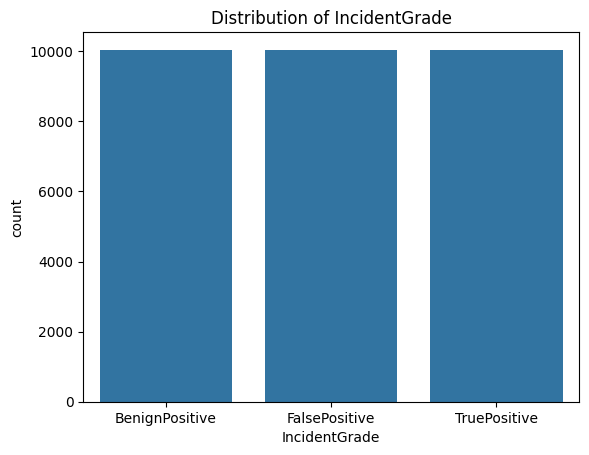

In [8]:
import seaborn as sns
sns.countplot(x='IncidentGrade', data=Traindf_loaded)
plt.title('Distribution of IncidentGrade')
plt.show()


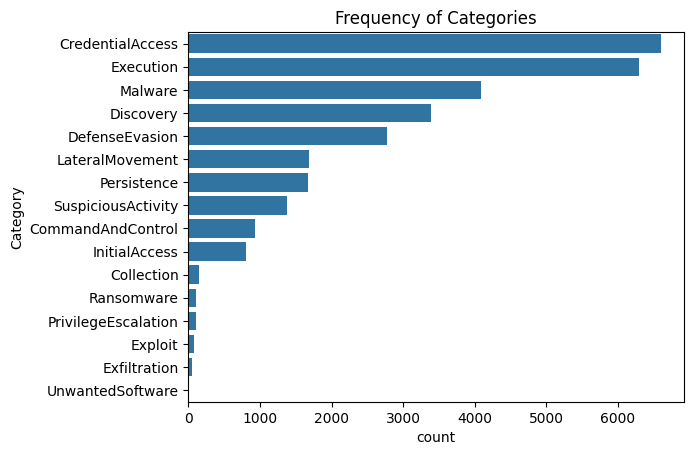

In [10]:
sns.countplot(y='Category', data=Traindf_loaded, order=Traindf_loaded['Category'].value_counts().index)
plt.title('Frequency of Categories')
plt.show()


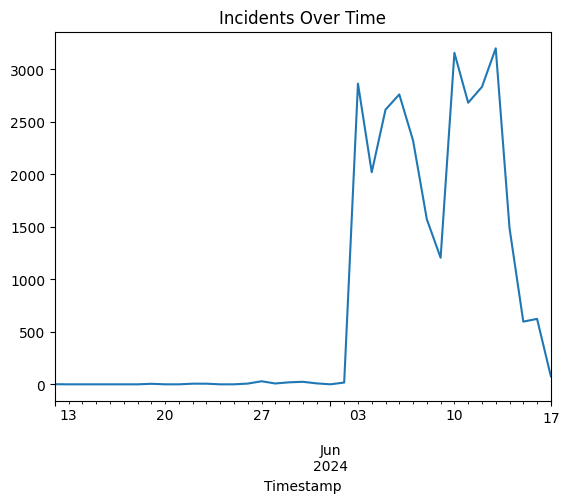

In [5]:
import matplotlib.pyplot as plt
Traindf_loaded['Timestamp'] = pd.to_datetime(Traindf_loaded['Timestamp'])
Traindf_loaded.set_index('Timestamp').resample('D').size().plot()
plt.title('Incidents Over Time')
plt.show()


In [22]:
# Function to replace non-common values with "Others" for all columns
def replace_with_others_all_columns(df, common_values_dict):
    for column in df.columns:
        # Get the unique values in the current column
        unique_values = df[column].unique()
        
        # Get the common values between the two DataFrames
        common_values = common_values_dict.get(column, set(unique_values))
        
        # Replace non-common values with "Others"
        df[column] = df[column].apply(lambda x: x if x in common_values else 'Others')
    
    return df

# Create a dictionary of common values for each column
common_values_dict = {}

# Iterate over each column to compute common values
for column in Traindf_loaded.columns:
    # Get unique values for the column in both DataFrames
    unique_train_loaded = Traindf_loaded[column].unique()
    unique_test_loaded = Testdf_loaded[column].unique()

    # Find the common unique values for each column
    common_values_dict[column] = set(unique_train_loaded) & set(unique_test_loaded)

# Apply the function to both DataFrames
Traindf_loaded = replace_with_others_all_columns(Traindf_loaded, common_values_dict)
Testdf_loaded = replace_with_others_all_columns(Testdf_loaded, common_values_dict)

# Display the unique values after transformation for a few columns
print("Unique values in Traindf_loaded after transformation:")
print(Traindf_loaded.nunique())

print("\nUnique values in Testdf_loaded after transformation:")
print(Testdf_loaded.nunique())


Unique values in Traindf_loaded after transformation:
Id                       1
OrgId                  461
IncidentId              75
AlertId               2280
Timestamp              159
DetectorId             289
AlertTitle             361
Category                16
MitreTechniques        413
IncidentGrade            3
EntityType               8
EvidenceRole             2
DeviceId               757
Sha256                 884
IpAddress              177
Url                    164
AccountSid             206
AccountUpn             179
AccountObjectId        158
AccountName            297
DeviceName             765
NetworkMessageId         1
RegistryKey            116
RegistryValueName       44
RegistryValueData       64
ApplicationId            1
ApplicationName          1
OAuthApplicationId       1
FileName               695
FolderPath             530
ResourceIdName           1
OSFamily                 5
OSVersion               10
SuspicionLevel           2
LastVerdict              2
C

In [23]:
# Display unique values for each column in Traindf_loaded
print("Unique values in Traindf_loaded:")
for column in Traindf_loaded.columns:
    print(f"\nColumn: {column}")
    print(Traindf_loaded[column].unique())

# Display unique values for each column in Testdf_loaded
print("\nUnique values in Testdf_loaded:")
for column in Testdf_loaded.columns:
    print(f"\nColumn: {column}")
    print(Testdf_loaded[column].unique())


Unique values in Traindf_loaded:

Column: Id
['Others']

Column: OrgId
[111 690 208 26 42 2 1128 3 772 56 32 524 688 'Others' 635 1952 69 657 538
 340 309 682 39 582 935 1392 96 236 815 370 9 214 27 362 333 364 137 882
 640 721 6 794 735 1727 409 400 432 518 503 267 13 372 544 790 1025 371
 1227 917 795 850 995 1406 238 1002 627 1549 174 102 1351 1185 276 266 948
 262 1021 16 407 566 229 866 1526 361 585 802 1253 737 628 388 460 257
 1075 323 108 618 1103 417 1082 52 1712 288 416 46 446 587 84 74 758 1210
 200 889 436 1953 1789 783 54 190 1063 971 804 590 1435 339 314 55 1405
 2551 445 172 787 1911 1654 1117 249 1012 29 125 2586 1147 606 105 165 776
 849 1486 130 1374 510 1239 149 706 507 1030 530 182 180 73 1762 480 1739
 1376 1368 516 495 732 1233 318 906 2038 1009 722 762 1251 287 2473 8 1432
 1414 115 559 2903 93 2376 87 529 483 2239 681 676 205 1212 1135 1247 2646
 1882 1885 577 64 45 1337 1058 349 745 1391 583 310 1389 1192 145 1536 727
 719 1158 191 2321 358 98 410 1381 673 920 

In [24]:
# Select columns with nunique greater than 1 and less than 20
selected_columns = Traindf_loaded.columns[(Traindf_loaded.nunique() > 1)]

# Display the selected columns and their unique values
print("Columns with nunique > 1 ")
for column in selected_columns:
    print(f"\nColumn: {column}")
    print(Traindf_loaded[column].unique())


Columns with nunique > 1 

Column: OrgId
[111 690 208 26 42 2 1128 3 772 56 32 524 688 'Others' 635 1952 69 657 538
 340 309 682 39 582 935 1392 96 236 815 370 9 214 27 362 333 364 137 882
 640 721 6 794 735 1727 409 400 432 518 503 267 13 372 544 790 1025 371
 1227 917 795 850 995 1406 238 1002 627 1549 174 102 1351 1185 276 266 948
 262 1021 16 407 566 229 866 1526 361 585 802 1253 737 628 388 460 257
 1075 323 108 618 1103 417 1082 52 1712 288 416 46 446 587 84 74 758 1210
 200 889 436 1953 1789 783 54 190 1063 971 804 590 1435 339 314 55 1405
 2551 445 172 787 1911 1654 1117 249 1012 29 125 2586 1147 606 105 165 776
 849 1486 130 1374 510 1239 149 706 507 1030 530 182 180 73 1762 480 1739
 1376 1368 516 495 732 1233 318 906 2038 1009 722 762 1251 287 2473 8 1432
 1414 115 559 2903 93 2376 87 529 483 2239 681 676 205 1212 1135 1247 2646
 1882 1885 577 64 45 1337 1058 349 745 1391 583 310 1389 1192 145 1536 727
 719 1158 191 2321 358 98 410 1381 673 920 2021 2582 158 648 2450 1254
 1

In [25]:
# Drop the columns that are not selected from both DataFrames
Traindf_loaded = Traindf_loaded[selected_columns]
Testdf_loaded = Testdf_loaded[selected_columns]

# Display the first few rows of the modified DataFrames
print("Modified Traindf_loaded:")
print(Traindf_loaded.head())

print("\nModified Testdf_loaded:")
print(Testdf_loaded.head())

Modified Traindf_loaded:
  OrgId IncidentId AlertId Timestamp DetectorId AlertTitle           Category  \
0   111     Others  Others    Others        162        132  CommandAndControl   
1   690     Others  Others    Others        347        356     DefenseEvasion   
2   208     Others  Others    Others        114         92   CredentialAccess   
3    26     Others  Others    Others         43         28            Malware   
4    42     Others  Others    Others         43         28            Malware   

                                     MitreTechniques   IncidentGrade  \
0                                              T1071  BenignPositive   
1  T1105;T1140;T1216;T1218;T1218.003;T1218.004;T1...  BenignPositive   
2  T1003;T1005;T1119;T1539;T1550.004;T1552.001;T1...  BenignPositive   
3                              T1027;T1047;T1204.002  BenignPositive   
4          T1027;T1027.002;T1027.005;T1105;T1204.002  BenignPositive   

  EntityType  ... DeviceName RegistryKey RegistryValueN

In [26]:
# Convert all columns in the DataFrame to object type
Traindf_loaded = Traindf_loaded.astype('object')
Testdf_loaded = Traindf_loaded.astype('object')
# Verify the changes
print(Traindf_loaded.dtypes)
print(Testdf_loaded.dtypes)

OrgId                object
IncidentId           object
AlertId              object
Timestamp            object
DetectorId           object
AlertTitle           object
Category             object
MitreTechniques      object
IncidentGrade        object
EntityType           object
EvidenceRole         object
DeviceId             object
Sha256               object
IpAddress            object
Url                  object
AccountSid           object
AccountUpn           object
AccountObjectId      object
AccountName          object
DeviceName           object
RegistryKey          object
RegistryValueName    object
RegistryValueData    object
FileName             object
FolderPath           object
OSFamily             object
OSVersion            object
SuspicionLevel       object
LastVerdict          object
dtype: object
OrgId                object
IncidentId           object
AlertId              object
Timestamp            object
DetectorId           object
AlertTitle           object
Catego

In [27]:
# Save the modified Traindf_loaded to a CSV file
Traindf_loaded.to_csv("C:/Users/ncssa/Downloads/Traindf_loaded_modified.csv", index=False)

# Save the modified Testdf_loaded to a CSV file
Testdf_loaded.to_csv("C:/Users/ncssa/Downloads/Testdf_loaded_modified.csv", index=False)

print("Modified DataFrames saved successfully!")


Modified DataFrames saved successfully!


In [ ]:
# Feature Selection

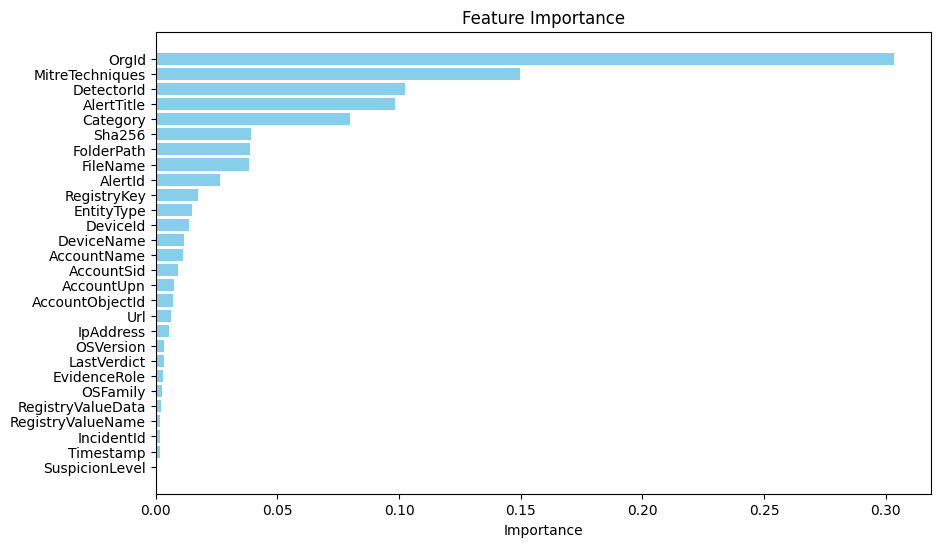

Top Features:
            Feature  Importance
0             OrgId    0.303379
7   MitreTechniques    0.149745
4        DetectorId    0.102629
5        AlertTitle    0.098452
6          Category    0.079812
11           Sha256    0.038994
23       FolderPath    0.038864
22         FileName    0.038228
2           AlertId    0.026225
19      RegistryKey    0.017184


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Separate features and target
X = Traindf_loaded.drop('IncidentGrade', axis=1)
y = Traindf_loaded['IncidentGrade']

# Identify categorical features
categorical_cols = X.select_dtypes(include=['object']).columns

# Convert all columns to string type to ensure uniformity
for col in categorical_cols:
    X[col] = X[col].astype(str)

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoders for future use

# Encode the target variable
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Compute feature importance
feature_importance = baseline_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Print top features
print("Top Features:")
print(importance_df.head(10))


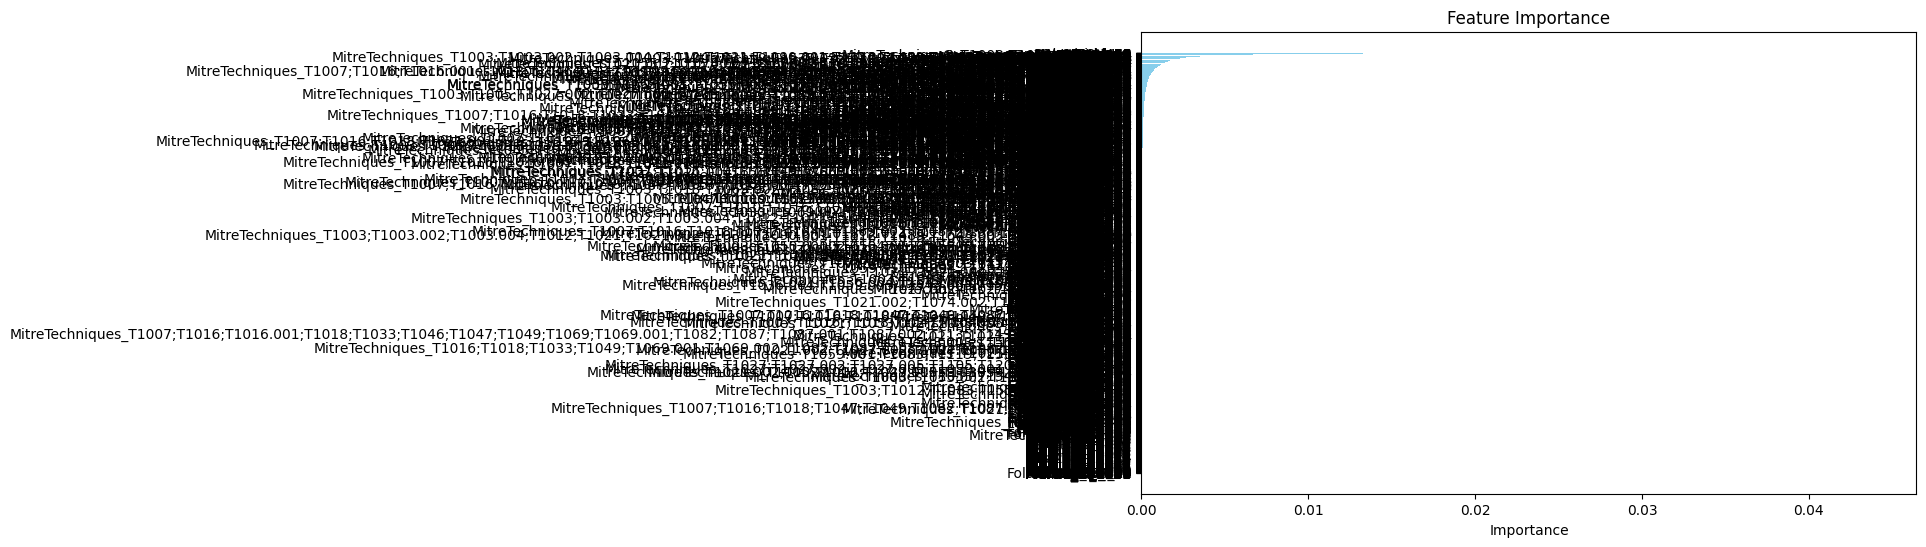

Top Features:
                                    Feature  Importance
206                                OrgId_26    0.044238
287                                OrgId_42    0.031332
401                                OrgId_79    0.023451
1356                          AlertTitle_40    0.022760
450                            OrgId_Others    0.018612
1082                          DetectorId_56    0.018059
295                               OrgId_445    0.017411
406                                 OrgId_8    0.016522
485   MitreTechniques_T1003;T1012;T1552.002    0.015444
247                               OrgId_337    0.014112


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
selected_columns = ['IncidentGrade','OrgId','MitreTechniques','DetectorId','AlertTitle','Category','Sha256','FolderPath','FileName','AlertId',
                    'RegistryKey']
Traindf_exploded = Traindf_loaded[selected_columns]

# Separate features and target
X = Traindf_exploded.drop('IncidentGrade', axis=1)
y = Traindf_exploded['IncidentGrade']

# Ensure all categorical columns are of type 'str'
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].astype(str)

# Apply One-Hot Encoding to categorical features
# We will use ColumnTransformer to apply one hot encoding only to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep the other columns as they are (e.g., numerical)
)

# Create a pipeline that applies preprocessing and then fits a Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Get feature importance
model = pipeline.named_steps['classifier']  # Access the trained Random Forest model
feature_importance = model.feature_importances_

# Since OneHotEncoder expands the categorical columns, we need to capture the column names
encoded_columns = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_columns = list(encoded_columns) + [col for col in X.columns if col not in categorical_cols]

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Print top features
print("Top Features:")
print(importance_df.head(10))


In [30]:
print(importance_df.head(20))

                                    Feature  Importance
206                                OrgId_26    0.044238
287                                OrgId_42    0.031332
401                                OrgId_79    0.023451
1356                          AlertTitle_40    0.022760
450                            OrgId_Others    0.018612
1082                          DetectorId_56    0.018059
295                               OrgId_445    0.017411
406                                 OrgId_8    0.016522
485   MitreTechniques_T1003;T1012;T1552.002    0.015444
247                               OrgId_337    0.014112
212                                OrgId_27    0.013264
1493              Category_CredentialAccess    0.011336
186                               OrgId_238    0.010860
214                               OrgId_274    0.010721
165                               OrgId_208    0.008737
426                                 OrgId_9    0.008576
1095                          DetectorId_62    0

In [31]:
selected_columns = ['IncidentGrade','OrgId','MitreTechniques','DetectorId','AlertTitle','Category','Sha256','FolderPath','FileName','AlertId',
                    'RegistryKey']
Testdf_exploded = Testdf_loaded[selected_columns]

In [ ]:
# Encoding Categorical Variables

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = [
    col for col in Traindf_exploded.select_dtypes(include=['object']).columns
    if col != 'IncidentGrade'
]

# Ensure all categorical columns are strings using .loc
Traindf_exploded.loc[:, categorical_columns] = Traindf_exploded[categorical_columns].astype(str)
Testdf_exploded.loc[:, categorical_columns] = Testdf_exploded[categorical_columns].astype(str)

# Label encode the 'IncidentGrade' column (target variable)
Traindf_exploded.loc[:, 'IncidentGrade'] = label_encoder.fit_transform(Traindf_exploded['IncidentGrade'])
Testdf_exploded.loc[:, 'IncidentGrade'] = label_encoder.transform(Testdf_exploded['IncidentGrade'])

# Perform one-hot encoding on both DataFrames
Traindf_onehot = pd.get_dummies(Traindf_exploded, columns=categorical_columns, drop_first=True)
Testdf_onehot = pd.get_dummies(Testdf_exploded, columns=categorical_columns, drop_first=True)

# Align test DataFrame with training DataFrame columns
Testdf_onehot = Testdf_onehot.reindex(columns=Traindf_onehot.columns, fill_value=0)

# Save the transformed DataFrames to CSV files
Traindf_onehot.to_csv('C:/Users/ncssa/Downloads/Traindf_onehot.csv', index=False)
Testdf_onehot.to_csv('C:/Users/ncssa/Downloads/Testdf_onehot.csv', index=False)

# Display the head of the transformed DataFrames
print("Transformed Training Data:")
print(Traindf_onehot.head())

print("Transformed Test Data:")
print(Testdf_onehot.head())


Transformed Training Data:
  IncidentGrade  OrgId_1004  OrgId_1009  OrgId_1012  OrgId_102  OrgId_1021  \
0             0       False       False       False      False       False   
1             0       False       False       False      False       False   
2             0       False       False       False      False       False   
3             0       False       False       False      False       False   
4             0       False       False       False      False       False   

   OrgId_1022  OrgId_1025  OrgId_1026  OrgId_1030  ...  RegistryKey_848  \
0       False       False       False       False  ...            False   
1       False       False       False       False  ...            False   
2       False       False       False       False  ...            False   
3       False       False       False       False  ...            False   
4       False       False       False       False  ...            False   

   RegistryKey_89  RegistryKey_9  RegistryKey_91  Reg

In [1]:
# read the transformed DataFrames from CSV files
import pandas as pd
Traindf_onehot = pd.read_csv('C:/Users/ncssa/Downloads/Traindf_onehot.csv')
Testdf_onehot = pd.read_csv('C:/Users/ncssa/Downloads/Testdf_onehot.csv')


In [51]:
Traindf_onehot['IncidentGrade'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
# Model Selection and Train

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
import pandas as pd

# List of top 10 important features
top_10_features = ['OrgId_26','OrgId_42','DetectorId_56','AlertTitle_40',
    'MitreTechniques_T1003;T1012;T1552.002','OrgId_8','OrgId_79','OrgId_445','OrgId_337',
    'Category_CredentialAccess','OrgId_Others','DetectorId_62','AlertId_Others','OrgId_274',
    'AlertTitle_46','OrgId_27','OrgId_208','OrgId_238',
    'FolderPath_Others','OrgId_493','OrgId_9','OrgId_373','OrgId_23',
    'Category_Malware',
    'AlertTitle_28',
    'MitreTechniques_T1059.001',
    'FolderPath_9'
]

# Extract the selected top 10 features and target variable
X = Traindf_onehot[top_10_features]  # Input features
y = Traindf_onehot['IncidentGrade']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Dictionary to store evaluation results
model_results = {}

# Train and save each model separately
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the model using joblib
    model_filename = f"C:/Users/ncssa/Downloads/{model_name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, model_filename)
    
    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the evaluation metrics
    model_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']

    }

# Convert the results to a DataFrame
evaluation_df = pd.DataFrame(model_results).T

# Print the evaluation DataFrame
print(evaluation_df)


                     Accuracy  Precision Class 0  Recall Class 0  \
Logistic Regression  0.746184           0.667739        0.823413   
Random Forest        0.749171           0.664286        0.830357   
SVM                  0.749171           0.664286        0.830357   

                     F1-Score Class 0  Precision Class 1  Recall Class 1  \
Logistic Regression          0.737450           0.800459        0.707552   
Random Forest                0.738095           0.868455        0.672580   
SVM                          0.738095           0.868455        0.672580   

                     F1-Score Class 1  Precision Class 2  Recall Class 2  \
Logistic Regression          0.751143           0.802002        0.707209   
Random Forest                0.758069           0.765152        0.743011   
SVM                          0.758069           0.765152        0.743011   

                     F1-Score Class 2  
Logistic Regression          0.751629  
Random Forest                0.753919

In [ ]:
# Training Data Performance:
# Accuracy: All three models perform similarly in terms of accuracy, with SVM and Random Forest slightly outperforming Logistic Regression.
# Precision Class 0: Random Forest and SVM have similar precision for Class 0, while Logistic Regression lags slightly.
# Recall Class 0: Random Forest has the best recall for Class 0, followed closely by SVM.
# Precision Class 1: SVM and Random Forest have almost identical precision for Class 1, both outperforming Logistic Regression.
# Recall Class 1: Logistic Regression has the highest recall for Class 1, but the difference is minor.
# F1-Score Class 1: Random Forest has the highest F1-Score for Class 1, with SVM closely following.
# Precision Class 2: Logistic Regression has a slight edge in precision for Class 2.
# Recall Class 2: Random Forest leads in recall for Class 2.
# F1-Score Class 2: Random Forest has a marginal advantage in F1-Score for Class 2.


In [ ]:
# Evaluation on Test Set

In [54]:
from sklearn.metrics import classification_report
import joblib
import pandas as pd

# Ensure the Test DataFrame contains the same features as training
X_test_unknown = Testdf_onehot[top_10_features]
y_test_unknown = Testdf_onehot['IncidentGrade']  # Assuming ground truth labels are available

# Dictionary to store evaluation results on unknown data
unknown_results = {}

# Loop through saved models
for model_name in models.keys():
    # Load the trained model
    model_filename = f"C:/Users/ncssa/Downloads/{model_name.replace(' ', '_').lower()}.pkl"
    model = joblib.load(model_filename)
    
    # Predict using the model
    y_pred_unknown = model.predict(X_test_unknown)
    
    # Evaluate the model (if ground truth labels are available)
    report = classification_report(y_test_unknown, y_pred_unknown, output_dict=True)
    
    # Store the evaluation metrics
    unknown_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']

    }

# Convert results to a DataFrame
unknown_evaluation_df = pd.DataFrame(unknown_results).T

# Print the evaluation DataFrame
print("Evaluation on Unknown Data:")
print(unknown_evaluation_df)


Evaluation on Unknown Data:
                     Accuracy  Precision Class 0  Recall Class 0  \
Logistic Regression  0.738337           0.662978        0.816942   
Random Forest        0.742949           0.661600        0.827494   
SVM                  0.742816           0.660680        0.827593   

                     F1-Score Class 0  Precision Class 1  Recall Class 1  \
Logistic Regression          0.731951           0.798500        0.699383   
Random Forest                0.735306           0.857928        0.667828   
SVM                          0.734777           0.859708        0.667330   

                     F1-Score Class 1  Precision Class 2  Recall Class 2  \
Logistic Regression          0.745662           0.783371        0.698686   
Random Forest                0.751035           0.755562        0.733526   
SVM                          0.751401           0.755330        0.733526   

                     F1-Score Class 2  
Logistic Regression          0.738609  
Random Fo

In [ ]:
# Evaluation on Unknown Data:
# Accuracy: Random Forest outperforms SVM slightly, with Logistic Regression trailing behind.
# Precision Class 0: Logistic Regression and Random Forest show similar precision, with Logistic Regression slightly ahead.
# Recall Class 0: Random Forest has the best recall for Class 0, similar to its performance on the training data.
# Precision Class 1: Random Forest and SVM have the best precision for Class 1, but SVM is slightly better.
# Recall Class 1: Logistic Regression has the highest recall for Class 1, continuing the trend from the training data.
# F1-Score Class 1: Random Forest remains the top performer for Class 1, with SVM following.
# Precision Class 2: Random Forest still holds a slight lead in precision.
# Recall Class 2: Random Forest leads in recall again, followed by SVM.
# F1-Score Class 2: Random Forest and SVM perform similarly for Class 2.
# Summary:
# Random Forest consistently performs well across most metrics, especially for recall and F1-Score in Class 0 and Class 2.
# SVM is a strong contender, particularly for precision in Class 1, but it has slightly lower recall in Class 2 compared to Random Forest.
# Logistic Regression performs well in precision for Class 2 and recall for Class 1 but lags slightly in other areas.
# It seems like Random Forest might be the best choice for overall performance, especially in terms of recall for Class 0 and Class 2,
#     but SVM might be a good alternative for precision-focused applications, especially for Class 1.








In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
import numpy as np

# List of top 10 important features
top_10_features = ['OrgId_26','OrgId_42','DetectorId_56','AlertTitle_40',
    'MitreTechniques_T1003;T1012;T1552.002','OrgId_8','OrgId_79','OrgId_445','OrgId_337',
    'Category_CredentialAccess','OrgId_Others','DetectorId_62','AlertId_Others','OrgId_274',
    'AlertTitle_46','OrgId_27','OrgId_208','OrgId_238',
    'FolderPath_Others','OrgId_493','OrgId_9','OrgId_373','OrgId_23',
    'Category_Malware',
    'AlertTitle_28',
    'MitreTechniques_T1059.001',
    'FolderPath_9'
]

# Extract the selected top 10 features and target variable
X = Traindf_onehot[top_10_features]  # Input features
y = Traindf_onehot['IncidentGrade']  # Target variable

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store evaluation results
cv_results = {}

# Perform StratifiedKFold cross-validation for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Compute cross-validated accuracy
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    
    # Store results
    cv_results[model_name] = {
        'Mean Accuracy': np.mean(scores),
        'Standard Deviation': np.std(scores)
    }

    # Detailed classification report for one fold (optional)
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        report = classification_report(y_val, y_pred, output_dict=True)
        print(f"\nClassification Report for {model_name} on Fold:")
        print(classification_report(y_val, y_pred))
        break  # Remove break to see all folds' reports

# Convert the results to a DataFrame for better visualization
cv_results_df = pd.DataFrame(cv_results).T

# Display the evaluation results
print("\nCross-Validation Results:")
print(cv_results_df)



Evaluating Logistic Regression...

Classification Report for Logistic Regression on Fold:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      2010
           1       0.80      0.70      0.75      2009
           2       0.79      0.71      0.75      2009

    accuracy                           0.74      6028
   macro avg       0.75      0.74      0.74      6028
weighted avg       0.75      0.74      0.74      6028


Evaluating Random Forest...

Classification Report for Random Forest on Fold:
              precision    recall  f1-score   support

           0       0.66      0.83      0.74      2010
           1       0.87      0.67      0.75      2009
           2       0.76      0.75      0.75      2009

    accuracy                           0.75      6028
   macro avg       0.76      0.75      0.75      6028
weighted avg       0.76      0.75      0.75      6028


Evaluating SVM...

Classification Report for SVM on Fold:
         

In [ ]:
# Key Observations:
# Logistic Regression:

# Accuracy: 73.76% (Mean)
# Standard Deviation: ±0.20%
# Performs reasonably well but slightly lower than other models in accuracy.
# Better recall for Class 0, which suggests it's prioritizing correct predictions for this class.
# Random Forest:

# Accuracy: 74.23% (Mean)
# Standard Deviation: ±0.29%
# Best overall accuracy among the models.
# Slightly better balance between precision and recall compared to Logistic Regression.
# Strong recall for Class 0 but a drop in Class 1 recall, which could be addressed with class weights or hyperparameter tuning.
# SVM:

# Accuracy: 74.22% (Mean)
# Standard Deviation: ±0.26%
# Performance closely matches Random Forest, with slightly better precision for Class 1.
# Recall for Class 1 is comparable to Random Forest but lower than Logistic Regression.


In [ ]:
# Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],  # Number of trees
        'max_depth': [None, 10, 20, 30],  # Depth of each tree
        'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
        'min_samples_leaf': [1, 2, 4]     # Minimum samples in a leaf
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],         # Regularization strength
        'kernel': ['linear', 'rbf'],    # Kernel type
        'gamma': ['scale', 'auto']      # Kernel coefficient
    }
}

# Dictionary to store best models and results
best_models = {}
tuned_model_results = {}

for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available processors
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the evaluation metrics
    tuned_model_results[model_name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']

    }

# Convert the tuned results to a DataFrame
tuned_evaluation_df = pd.DataFrame(tuned_model_results).T

# Print the tuned evaluation DataFrame
print("Tuned Model Results:")
print(tuned_evaluation_df)


Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Performing Grid Search for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Performing Grid Search for SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Tuned Model Results:
                                                           Best Params  \
Logistic Regression                       {'C': 10, 'solver': 'lbfgs'}   
Random Forest        {'max_depth': None, 'min_samples_leaf': 4, 'mi...   
SVM                       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}   

                     Accuracy Precision Class 0 Recall Class 0  \
Logistic Regression  0.746184          0.667739       0.823413   
Random Forest        0.749171          0.664286       0.830357   
SVM                  0.749171          0.664286       0.830357   

                    F1-Score Class 0 Precision Class 1 Recall Class 1  \
Logistic Regression          0.

In [ ]:
# Best Hyperparameters:
# Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
# Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
# SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# Performance Comparison:
# Training Data:
# Accuracy:
# Random Forest and SVM both have the highest accuracy (0.749171), followed by Logistic Regression (0.746184).
# Precision Class 0:
# Logistic Regression performs slightly better than the others with a precision of 0.667739.
# Recall Class 0:
# Random Forest has the highest recall (0.830357), closely followed by SVM (0.830357).
# F1-Score Class 0:
# Random Forest and SVM both have a slightly better F1-Score (0.738095) than Logistic Regression (0.737450).
# Precision Class 1:
# Random Forest and SVM show a large improvement in precision (both around 0.868), compared to Logistic Regression (0.800459).
# Recall Class 1:
# Logistic Regression has the highest recall (0.707552), while Random Forest and SVM are slightly lower (0.672580).
# F1-Score Class 1:
# Random Forest and SVM both have better F1-Scores (0.738095) compared to Logistic Regression (0.737450).
# Precision Class 2:
# Logistic Regression slightly outperforms the others (0.802002), but Random Forest and SVM are quite close.
# Recall Class 2:
# Random Forest has the best recall (0.743011), followed by SVM (0.743011).
# F1-Score Class 2:
# Random Forest has the highest F1-Score (0.753919), closely followed by SVM (0.753919).


In [ ]:
# Final Evaluation on Test Set

In [56]:
from sklearn.metrics import classification_report

# Ensure unseen data has the same features as the training data
X_unseen = Testdf_onehot[top_10_features]
y_unseen = Testdf_onehot['IncidentGrade']

# Dictionary to store evaluation results for unseen data
unseen_results = {}

# Evaluate each tuned model
for model_name, model in best_models.items():
    # Predict on unseen data
    y_pred_unseen = model.predict(X_unseen)
    report = classification_report(y_unseen, y_pred_unseen, output_dict=True)
    
    # Store the evaluation metrics
    unseen_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']

    }

# Convert the results to a DataFrame
unseen_evaluation_df = pd.DataFrame(unseen_results).T

# Print the evaluation results
print("Evaluation on Unseen Data:")
print(unseen_evaluation_df)


Evaluation on Unseen Data:
                     Accuracy  Precision Class 0  Recall Class 0  \
Logistic Regression  0.738337           0.662978        0.816942   
Random Forest        0.742816           0.660680        0.827593   
SVM                  0.742949           0.661600        0.827494   

                     F1-Score Class 0  Precision Class 1  Recall Class 1  \
Logistic Regression          0.731951           0.798500        0.699383   
Random Forest                0.734777           0.859708        0.667330   
SVM                          0.735306           0.857928        0.667828   

                     F1-Score Class 1  Precision Class 2  Recall Class 2  \
Logistic Regression          0.745662           0.783371        0.698686   
Random Forest                0.751401           0.755330        0.733526   
SVM                          0.751035           0.755562        0.733526   

                     F1-Score Class 2  
Logistic Regression          0.738609  
Random For

In [57]:
# Evaluation on Unseen Data:
# Accuracy:
# SVM (0.742949) and Random Forest (0.742816) have similar accuracy, with Logistic Regression trailing slightly (0.738337).
# Precision Class 0:
# Logistic Regression has the highest precision (0.662978), followed by SVM (0.661600).
# Recall Class 0:
# Random Forest has the highest recall (0.827593), followed by SVM (0.827494).
# F1-Score Class 0:
# Random Forest and SVM show the best performance (0.734777 and 0.735306, respectively).
# Precision Class 1:
# SVM has the highest precision (0.857928), followed closely by Random Forest (0.859708).
# Recall Class 1:
# Logistic Regression again outperforms with the highest recall (0.699383).
# F1-Score Class 1:
# Random Forest and SVM are slightly ahead (0.751035 and 0.751401) compared to Logistic Regression (0.745662).
# Precision Class 2:
# Random Forest (0.755330) and SVM (0.755562) are the best, slightly ahead of Logistic Regression (0.783371).
# Recall Class 2:
# Random Forest leads with the highest recall (0.733526), followed by SVM.
# F1-Score Class 2:
# Random Forest (0.744268) and SVM (0.744381) show almost identical results, outperforming Logistic Regression (0.738609).
# Summary:
# Best Overall Performance: Random Forest and SVM are closely matched after tuning, showing good precision and recall across all classes,
# especially for Class 2 and Class 0.
# Logistic Regression: Tuning improved Logistic Regression's performance, but it still lags behind Random Forest and SVM in certain metrics,
# especially for Class 1 precision and Class 2 recall.
# Both Random Forest and SVM appear to be strong models, with Random Forest having a slight edge in recall for Class 2, and
# SVM leading in precision for Class 1.








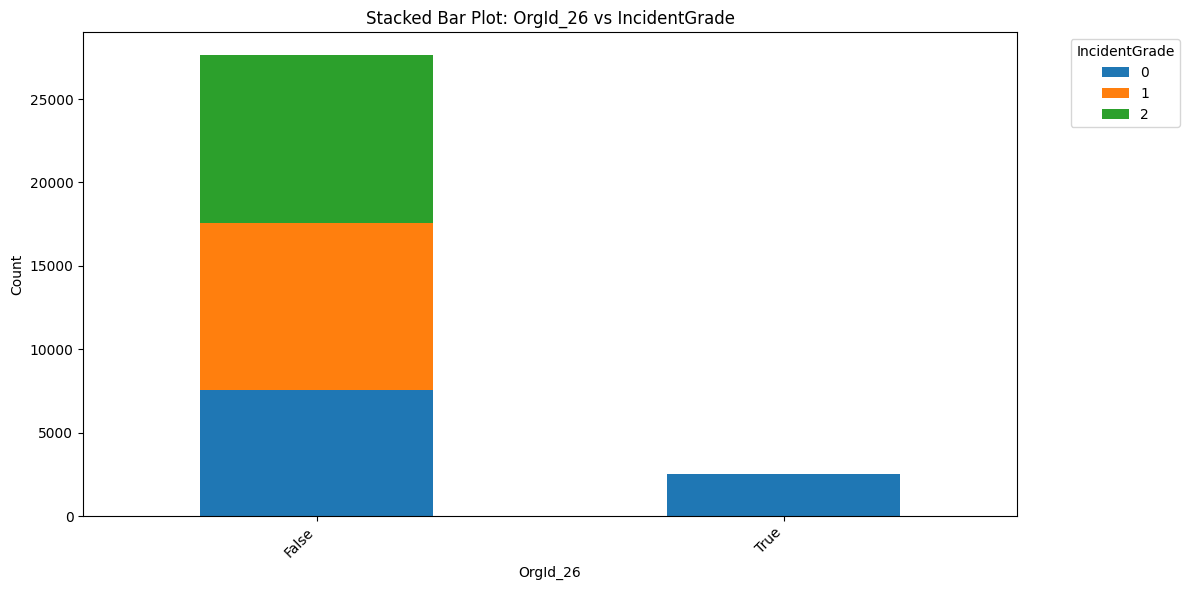

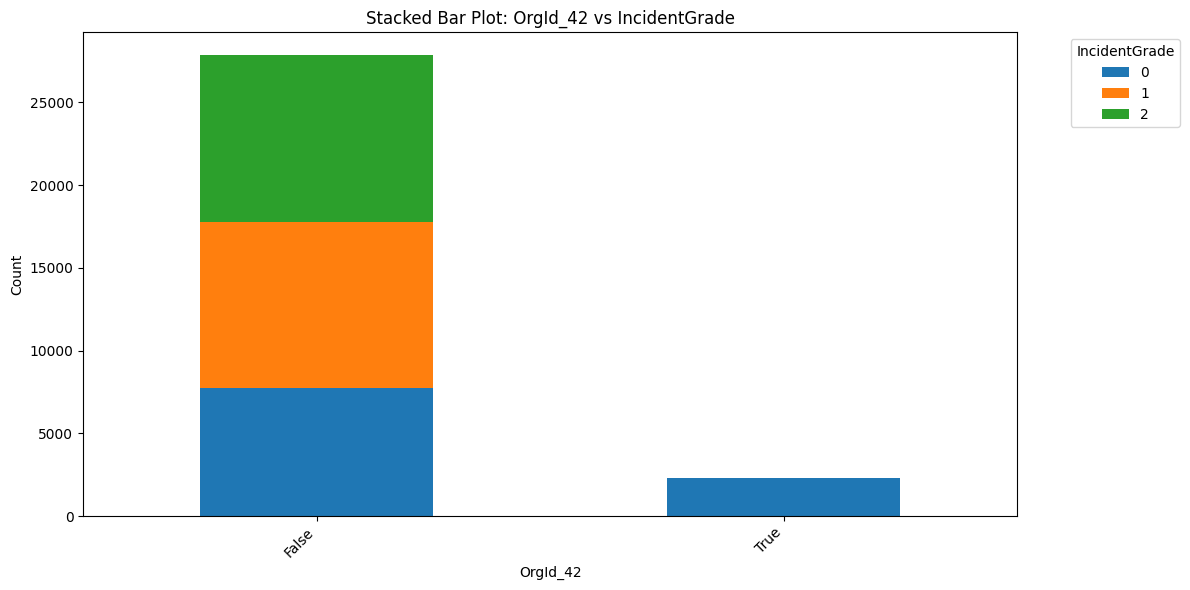

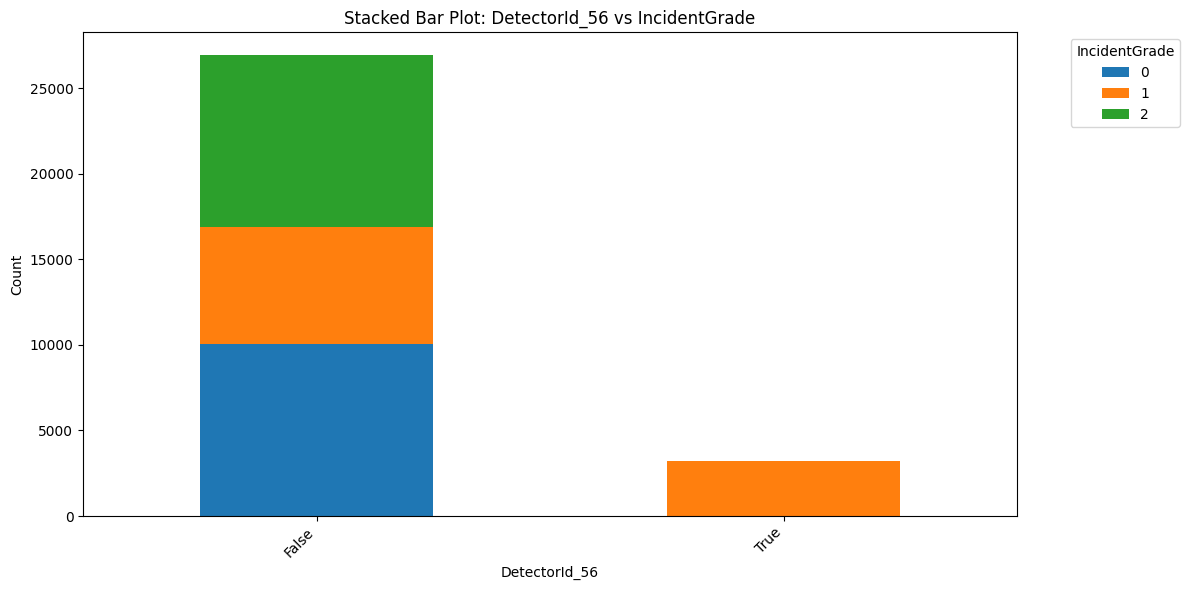

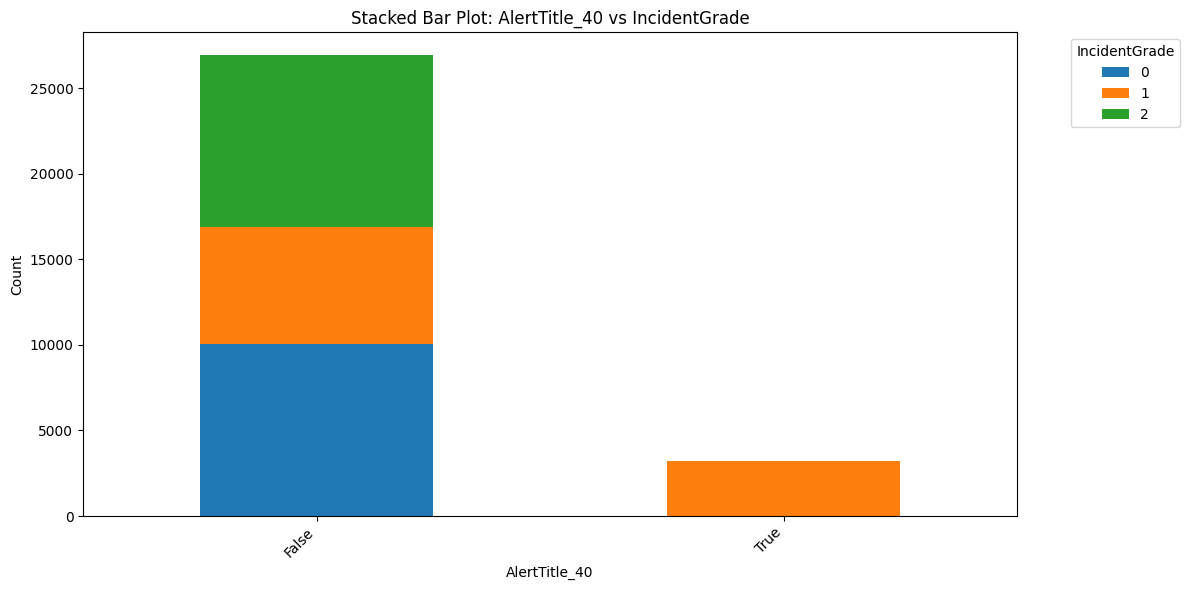

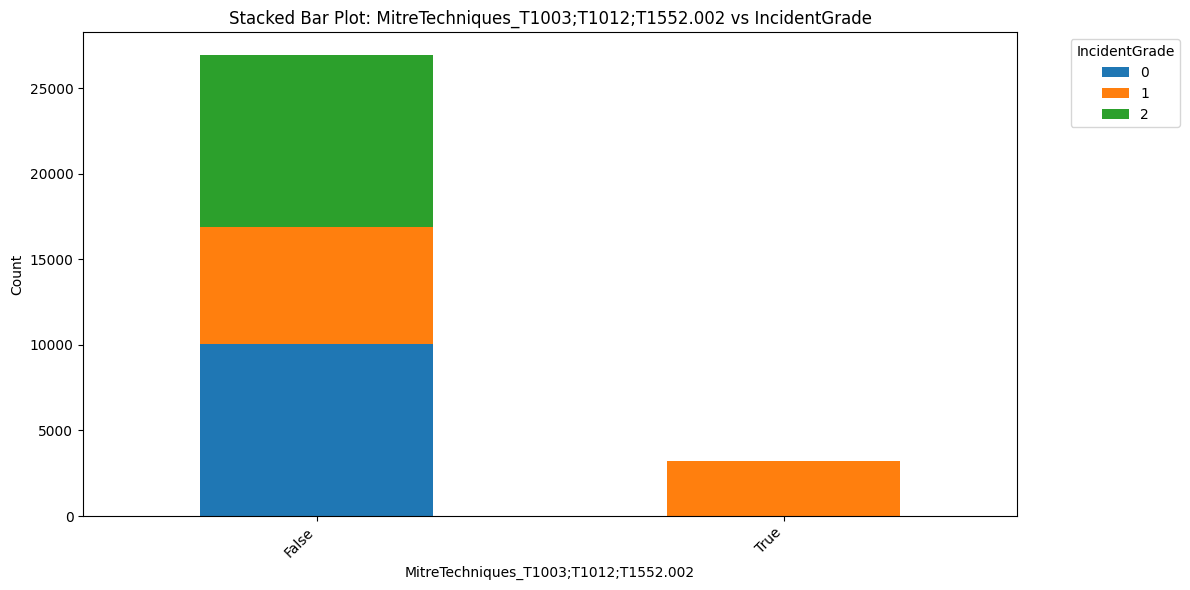

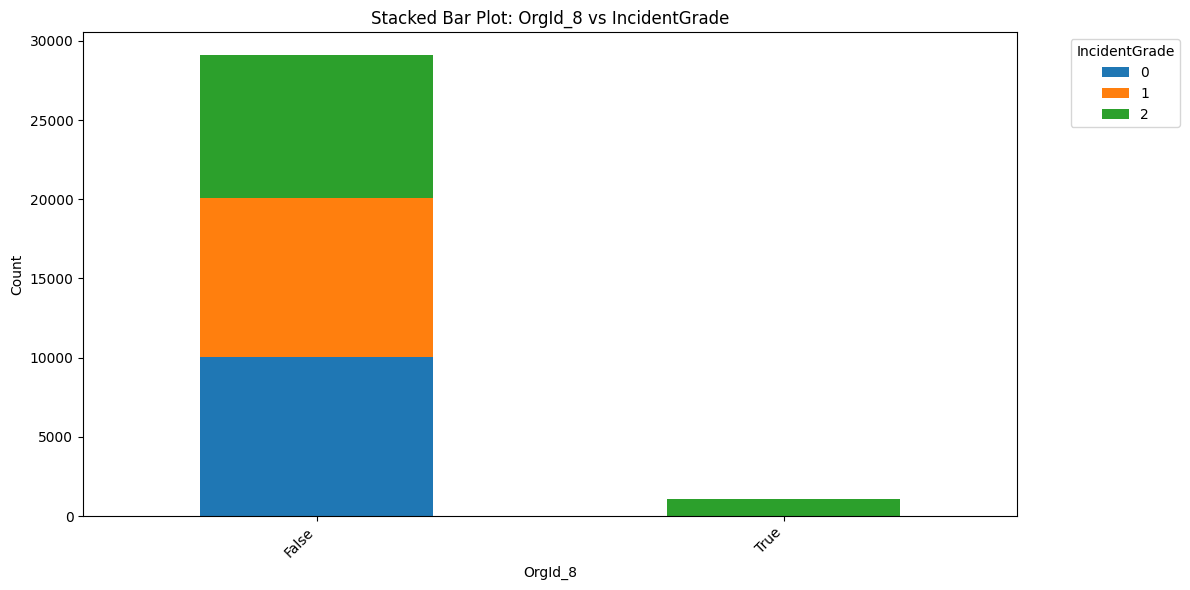

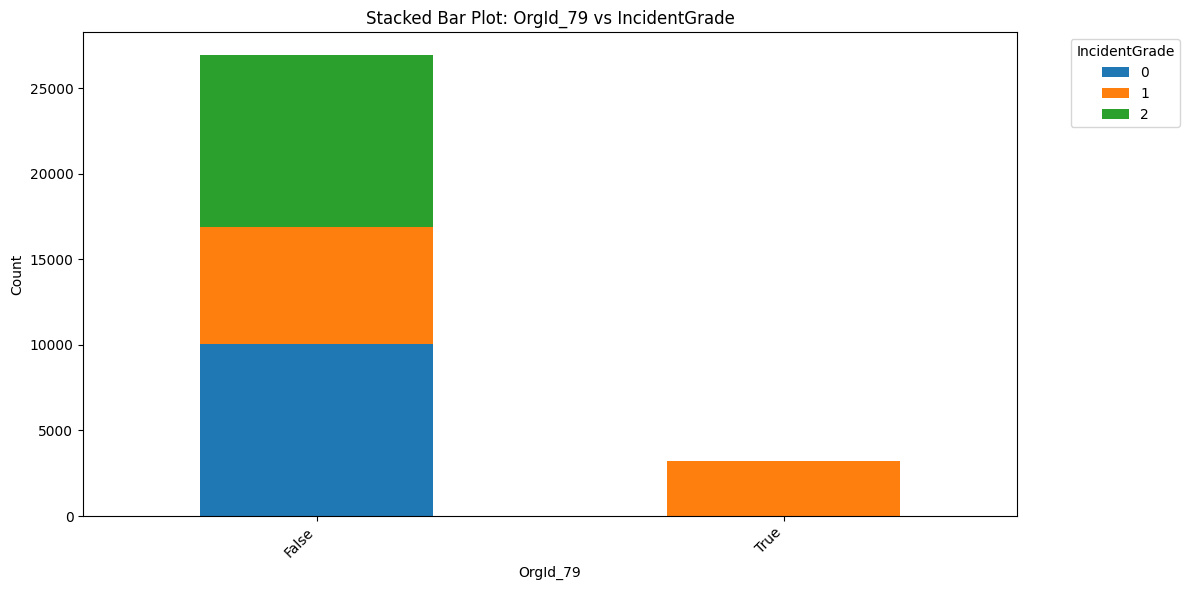

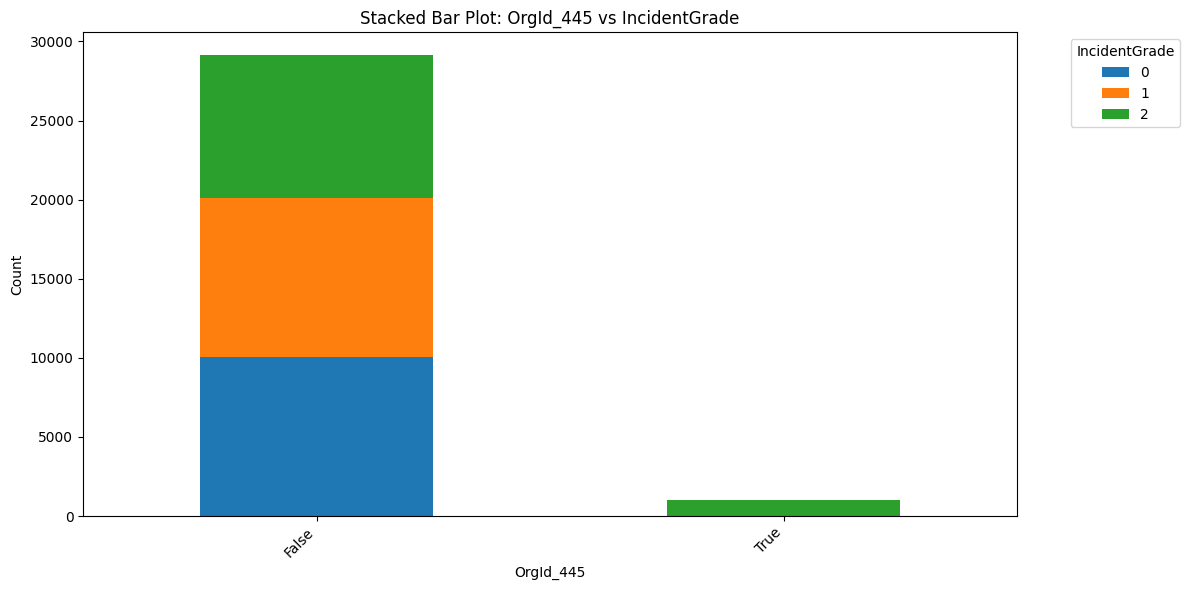

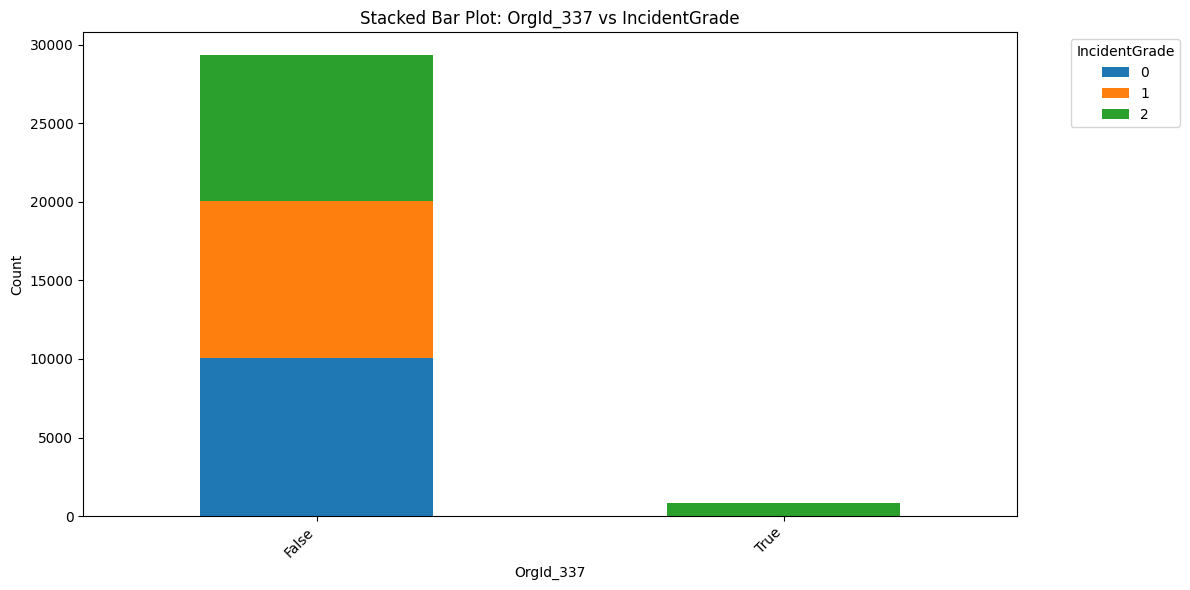

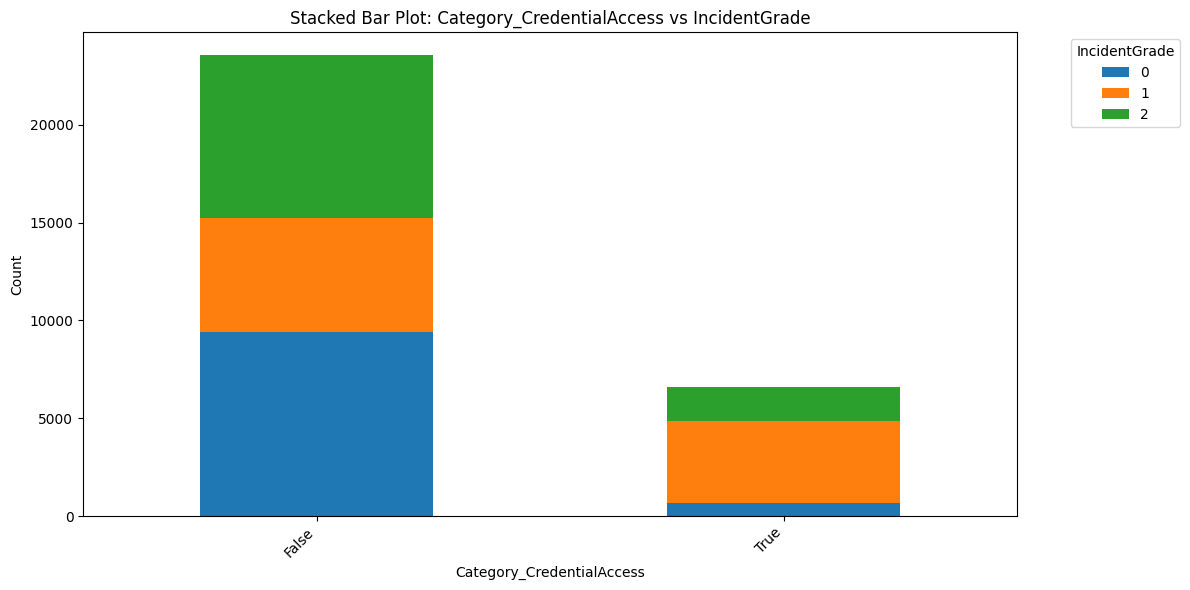

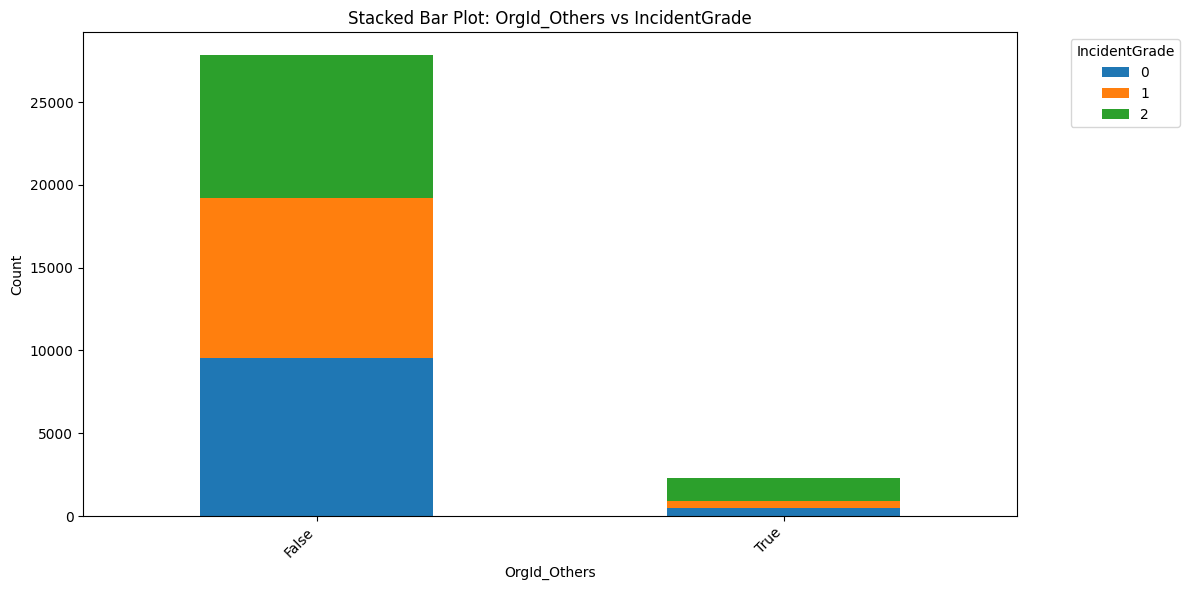

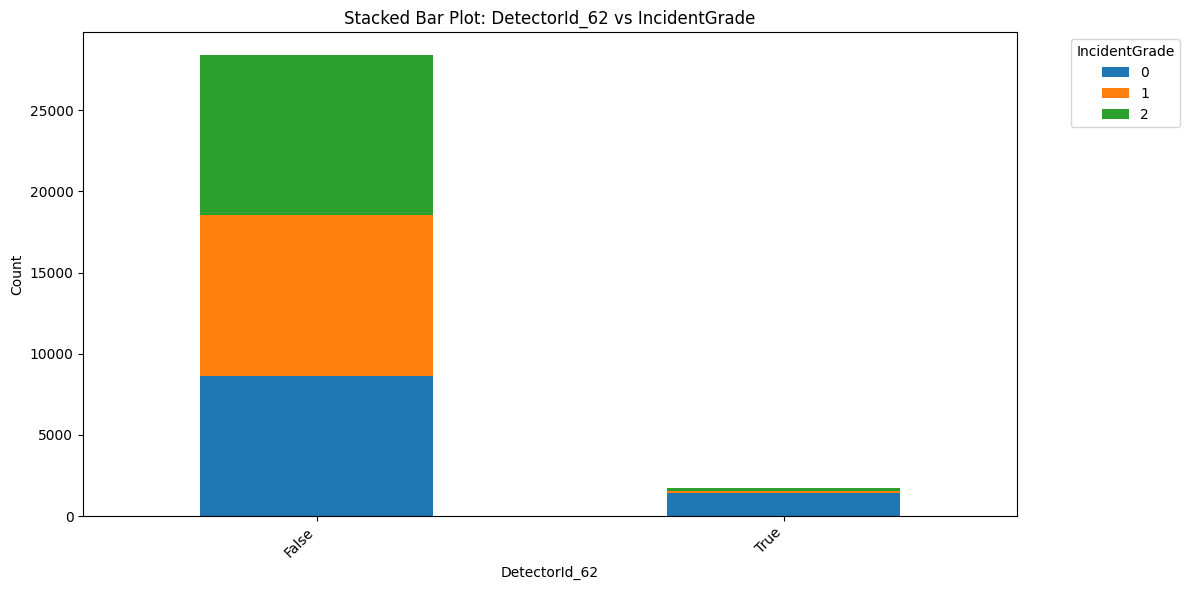

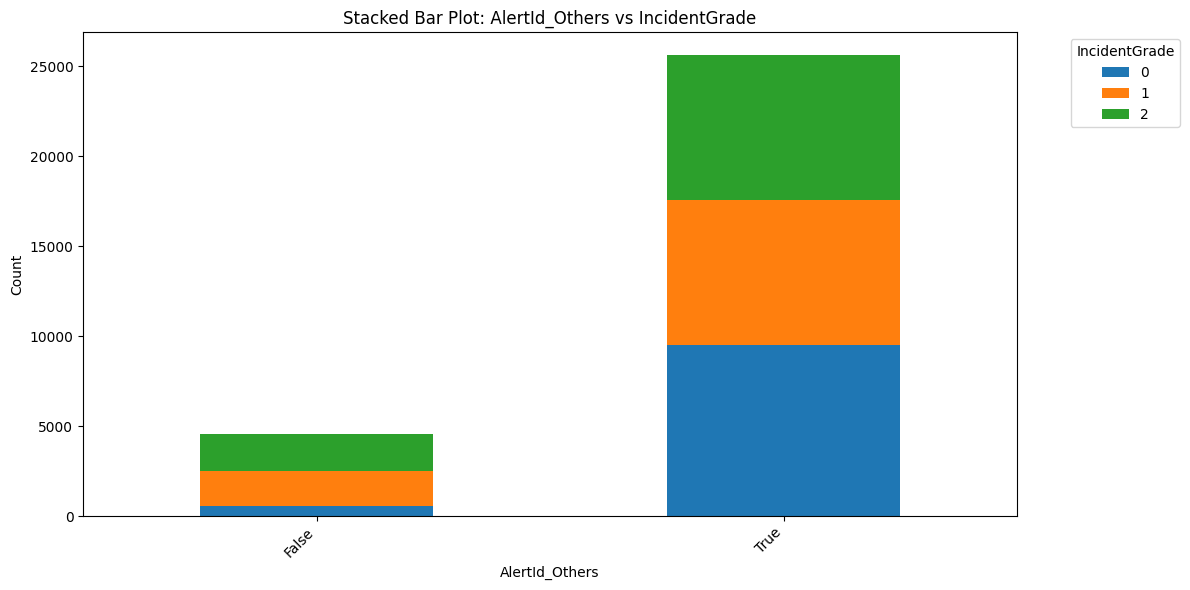

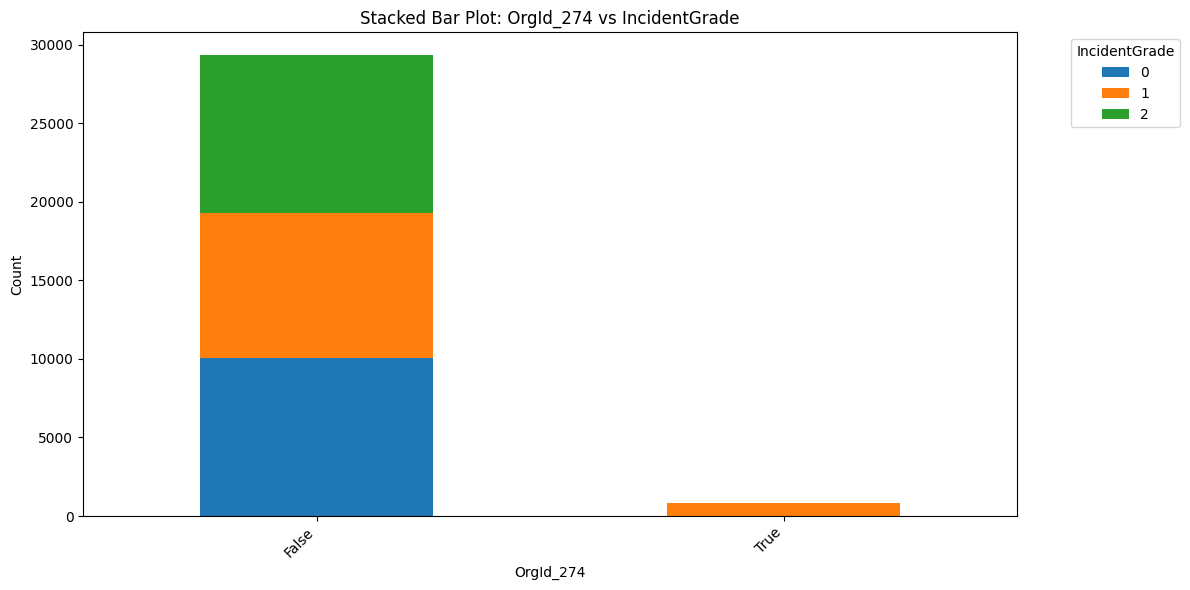

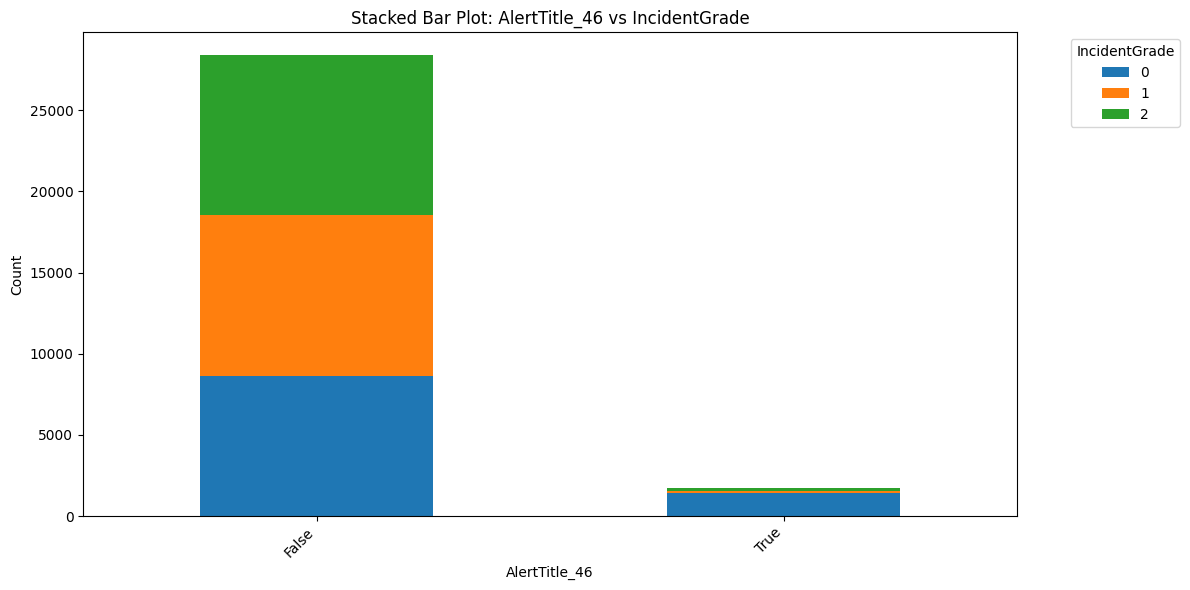

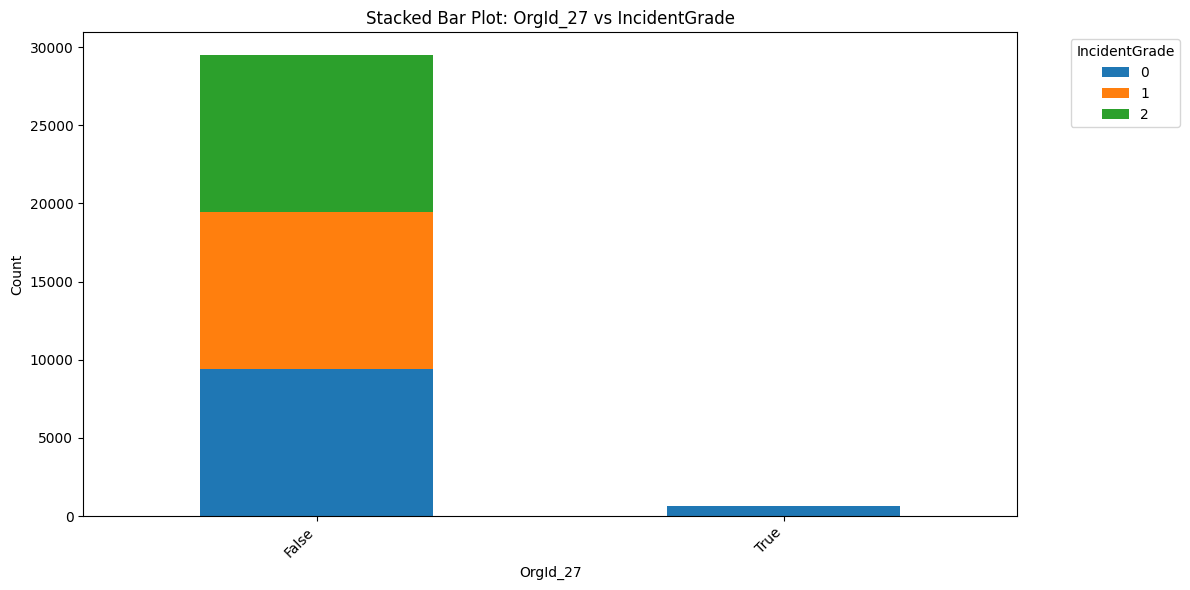

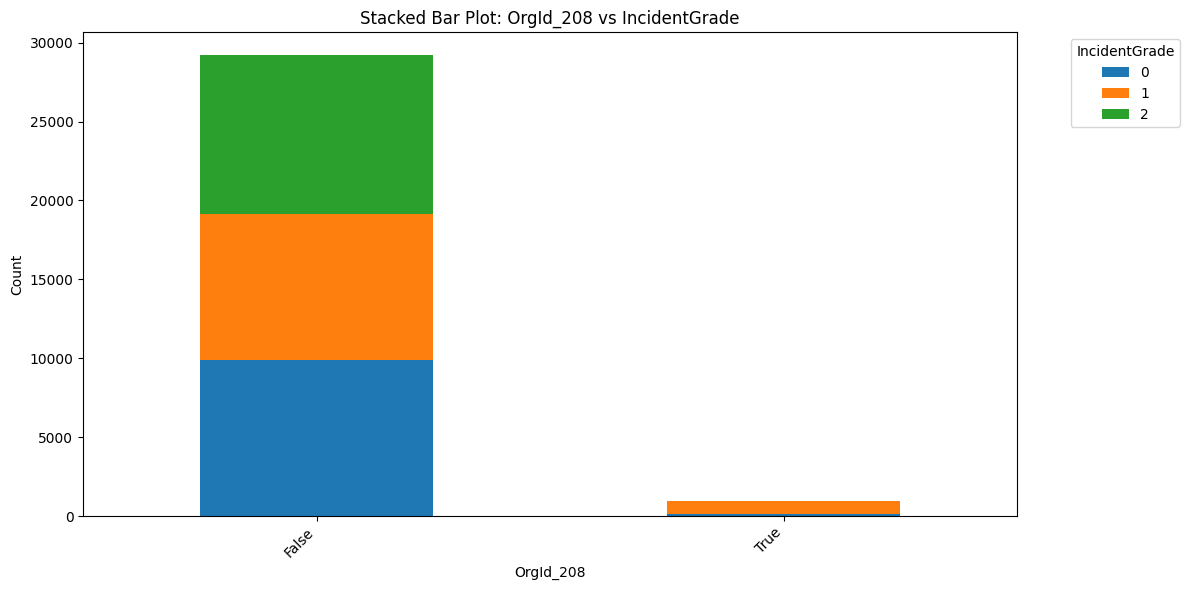

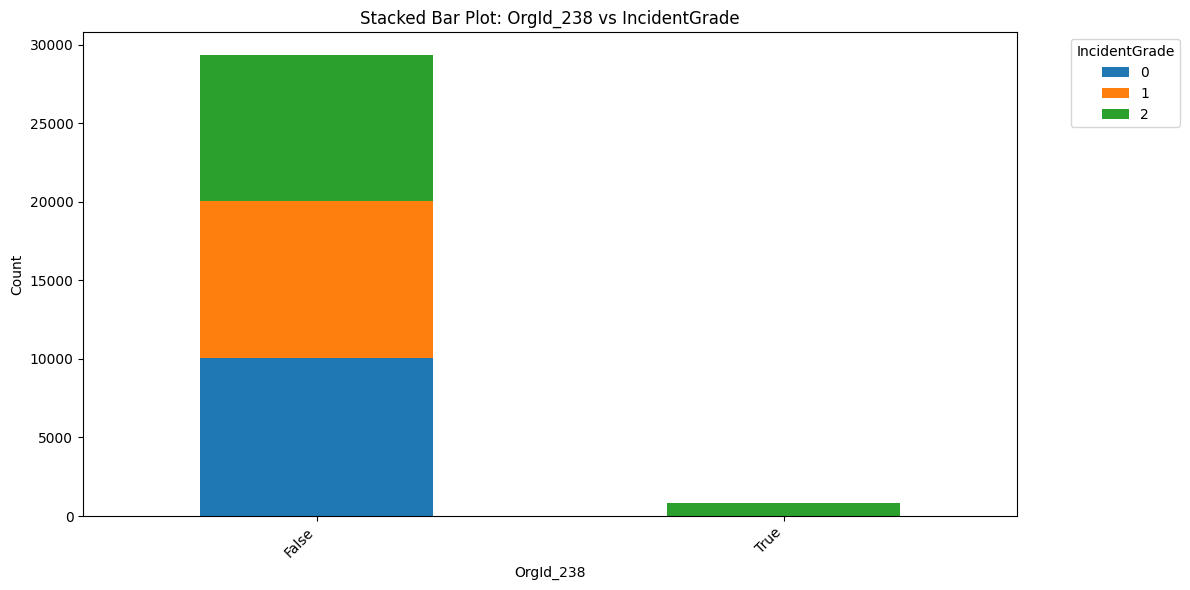

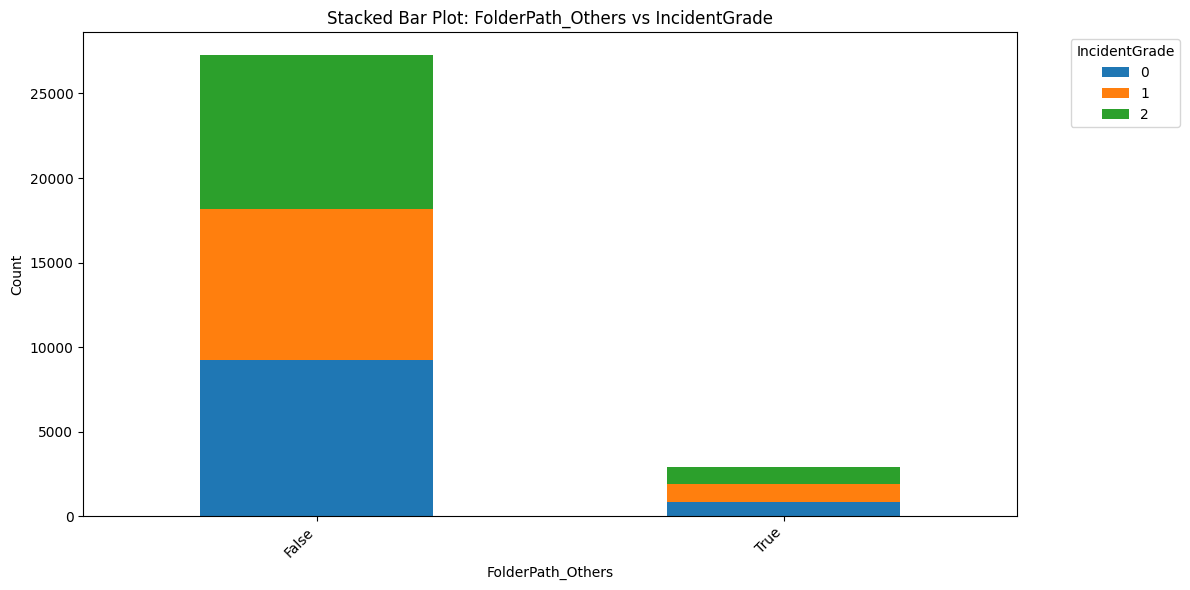

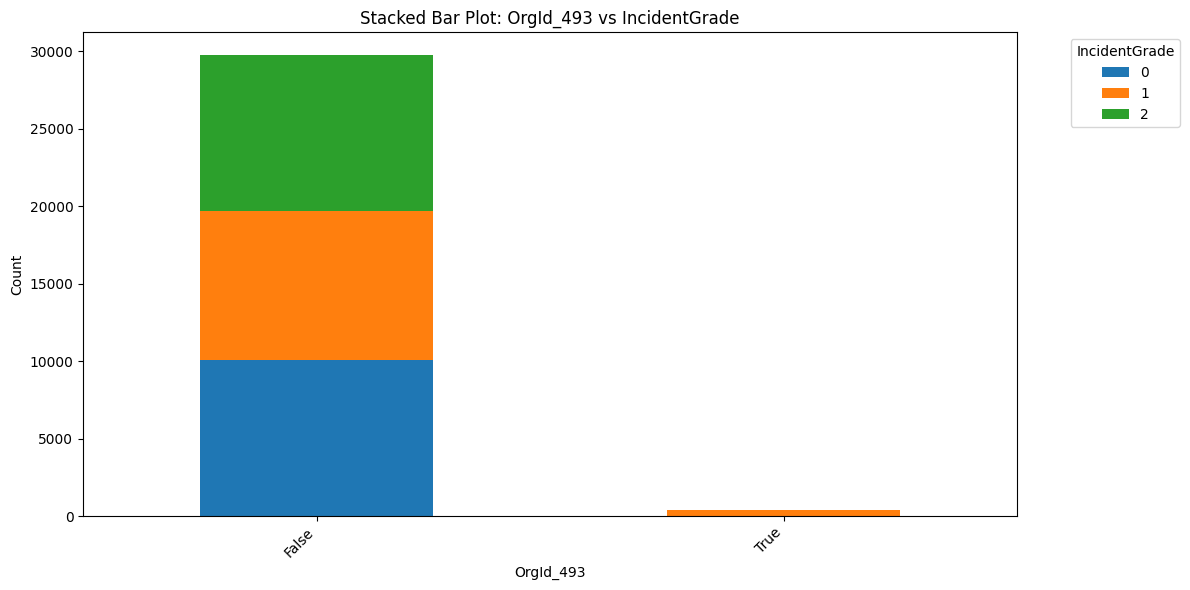

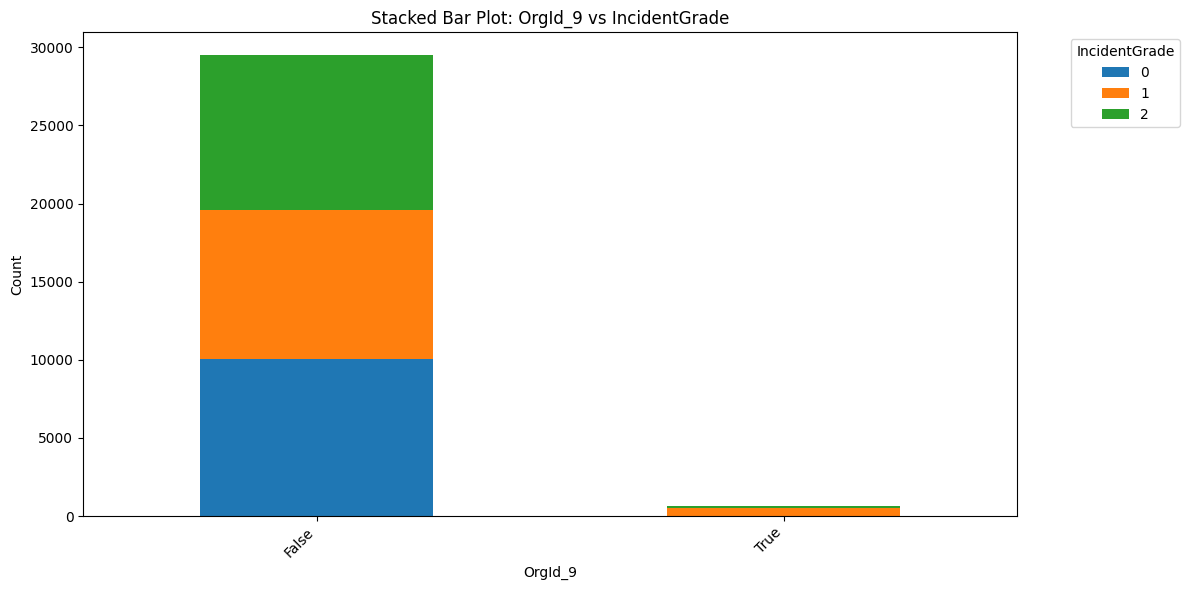

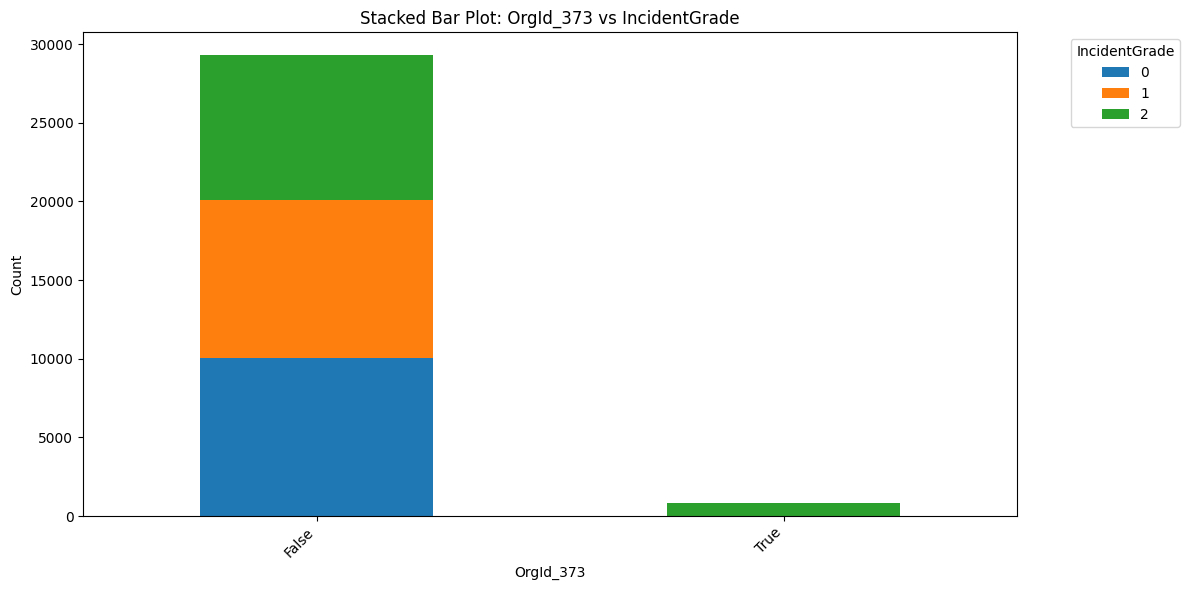

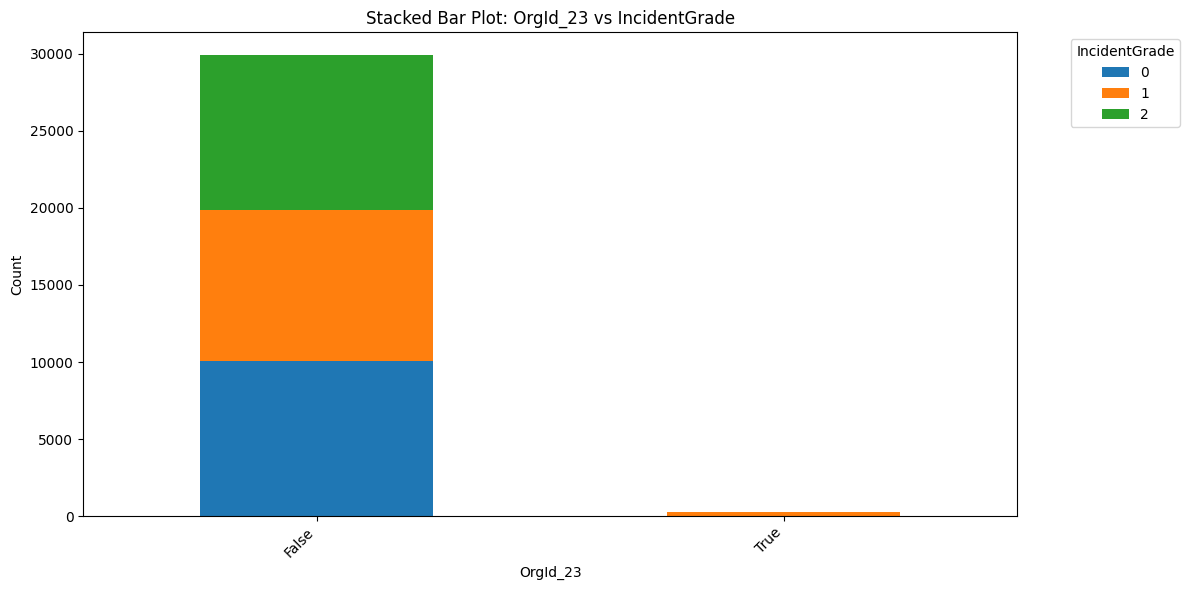

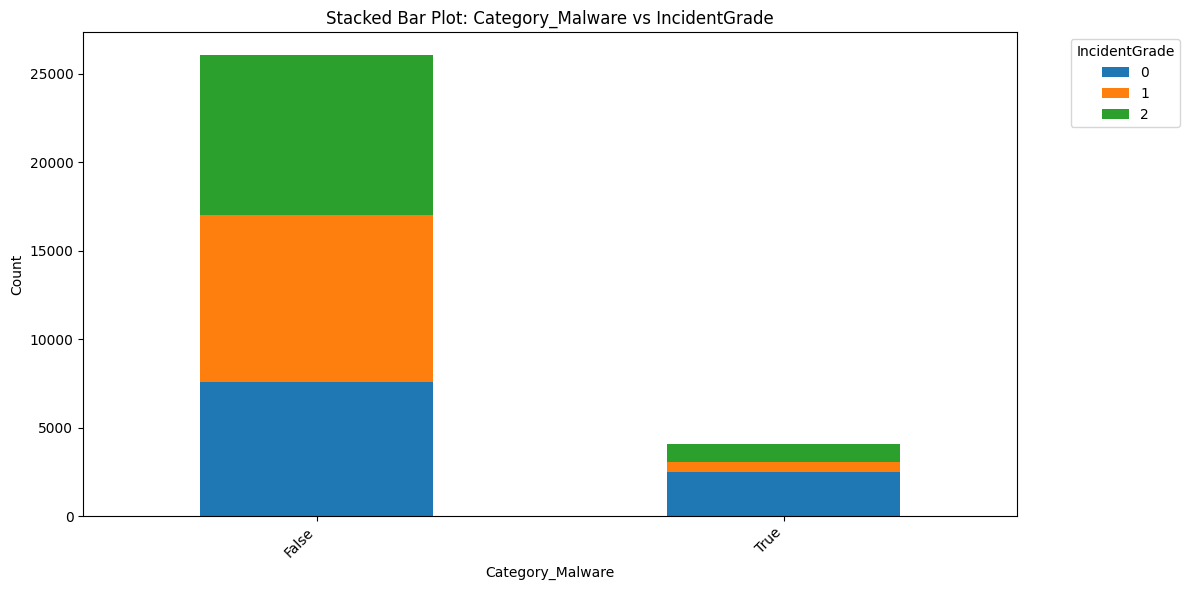

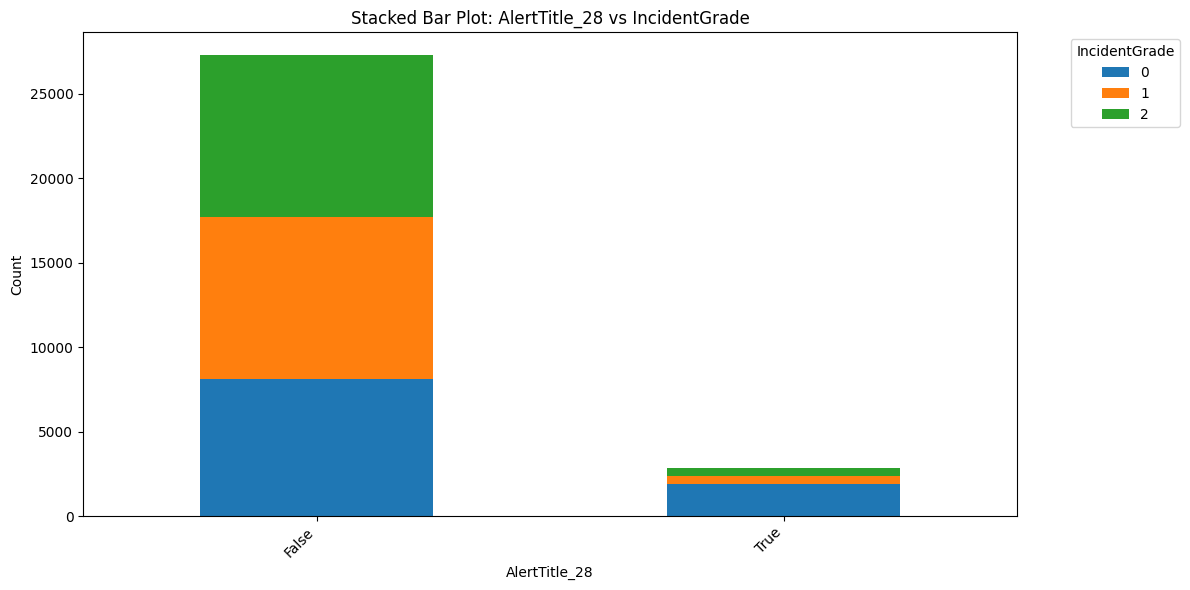

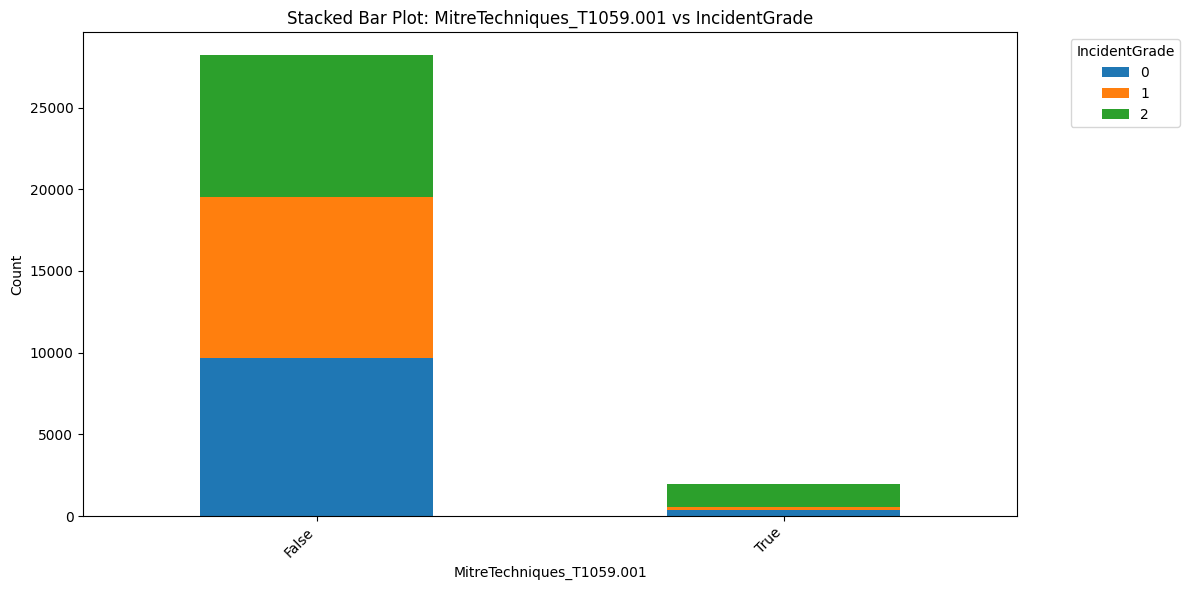

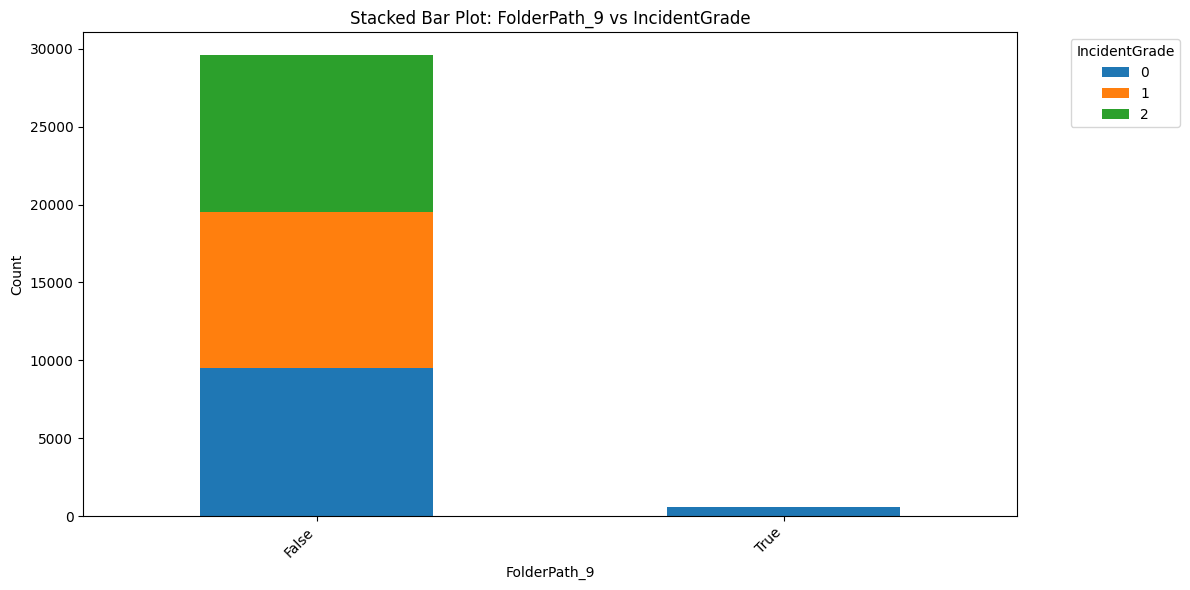

In [37]:
import matplotlib.pyplot as plt

# Create stacked bar plots for each of the top_10 categorical features
for feature in top_10_features:
    # Calculate the count of each category for each class of the target
    count_data = Traindf_onehot.groupby([feature, 'IncidentGrade']).size().unstack(fill_value=0)
    
    # Plot stacked bar plot
    count_data.plot(kind='bar', stacked=True, figsize=(12,6))
    
    # Customize plot
    plt.title(f'Stacked Bar Plot: {feature} vs IncidentGrade')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='IncidentGrade', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [40]:
s_columns = ['IncidentGrade','OrgId','MitreTechniques','DetectorId','AlertTitle','Category','Sha256','FolderPath','FileName','AlertId',
                    'RegistryKey']
Traindf_exploded = Traindf_loaded[s_columns]

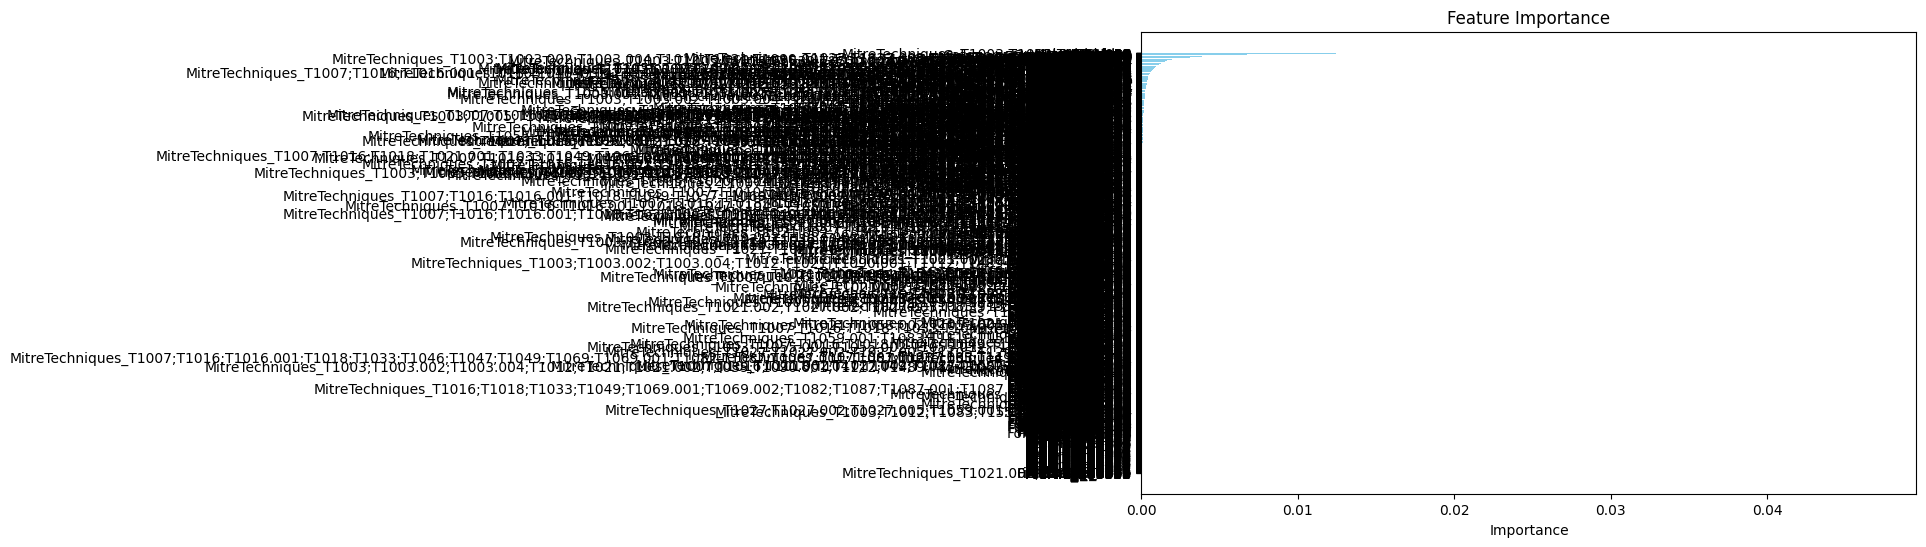

Top Features:
                                    Feature  Importance
206                                OrgId_26    0.047184
287                                OrgId_42    0.029126
450                            OrgId_Others    0.021431
485   MitreTechniques_T1003;T1012;T1552.002    0.018510
1356                          AlertTitle_40    0.018109
1082                          DetectorId_56    0.017583
406                                 OrgId_8    0.015040
295                               OrgId_445    0.014296
1493              Category_CredentialAccess    0.013130
401                                OrgId_79    0.012481


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate features and target
X = Traindf_exploded.drop('IncidentGrade', axis=1)
y = Traindf_exploded['IncidentGrade']

# Ensure all categorical columns are of type 'str'
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].astype(str)

# Apply One-Hot Encoding to categorical features
# We will use ColumnTransformer to apply one hot encoding only to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep the other columns as they are (e.g., numerical)
)

# Create a pipeline that applies preprocessing and then fits a Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Get feature importance
model = pipeline.named_steps['classifier']  # Access the trained Random Forest model
feature_importance = model.feature_importances_

# Since OneHotEncoder expands the categorical columns, we need to capture the column names
encoded_columns = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_columns = list(encoded_columns) + [col for col in X.columns if col not in categorical_cols]

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Print top features
print("Top Features:")
print(importance_df.head(10))


In [56]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import joblib
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# List of top 10 important features
top_10_features = ['OrgId_26','OrgId_42','DetectorId_56','AlertTitle_40',
    'MitreTechniques_T1003;T1012;T1552.002','OrgId_8','OrgId_79','OrgId_445','OrgId_337',
    'Category_CredentialAccess','OrgId_Others','DetectorId_62','AlertId_Others','OrgId_274',
    'AlertTitle_46','OrgId_27','OrgId_208','OrgId_238',
    'FolderPath_Others','OrgId_493','OrgId_9','OrgId_373','OrgId_23',
    'Category_Malware',
    'AlertTitle_28',
    'MitreTechniques_T1059.001',
    'FolderPath_9'
]

# Extract the selected top 10 features and target variable
X = Traindf_onehot[top_10_features]  # Input features
y = Traindf_onehot['IncidentGrade']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)



# Define the models and parameter grids for tuning
models = {
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

param_grids = {
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1],
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'max_depth': [-1, 10, 20],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50, 100],
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (100, 100)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
    }
}

# Store results
model_results = {}

# Train and tune models
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    
    # GridSearchCV or RandomizedSearchCV for hyperparameter tuning
    if model_name in ['XGBoost', 'LightGBM']:
        search = RandomizedSearchCV(model, param_grids[model_name], n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
    else:
        search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, verbose=2)
    
    # Convert the target variable to integers
    y_train = y_train.astype(int)

    # Check for missing values
    print(y_train.isnull().sum())  # Ensure no NaNs are present
    if y_train.isnull().sum() > 0:
        y_train = y_train.dropna()
        X_train = X_train.loc[y_train.index]  # Match X_train with the cleaned target variable

    # Ensure correct unique values in target
    print(y_train.unique())

    # Retry training the model
    search.fit(X_train, y_train)

    # Save the best model
    best_model = search.best_estimator_
    model_filename = f"C:/Users/ncssa/Downloads/{model_name.replace(' ', '_').lower()}_tuned.pkl"
    joblib.dump(best_model, model_filename)
    
    # Predict and evaluate the model
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the evaluation metrics
    model_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']

    }

# Convert the results to a DataFrame
evaluation_df = pd.DataFrame(model_results).T

# Print the evaluation DataFrame
print(evaluation_df)

# Neural Network (Keras) model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (use softmax for multi-class)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train Neural Network
nn_model = create_nn_model(X_train.shape[1])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

# Save the Neural Network model
nn_model.save("C:/Users/ncssa/Downloads/neural_network_model.h5")

# Evaluate Neural Network
nn_y_pred = nn_model.predict(X_test)
nn_y_pred = (nn_y_pred > 0.5).astype(int)  # Convert probabilities to binary labels
nn_report = classification_report(y_test, nn_y_pred, output_dict=True)

# Store the evaluation metrics for Neural Network
model_results['Neural Network'] = {
    'Accuracy': nn_report['accuracy'],
    'Precision Class 0': nn_report['0']['precision'],
    'Recall Class 0': nn_report['0']['recall'],
    'F1-Score Class 0': nn_report['0']['f1-score'],
    'Precision Class 1': nn_report['1']['precision'],
    'Recall Class 1': nn_report['1']['recall'],
    'F1-Score Class 1': nn_report['1']['f1-score'],
    'Precision Class 2': report['2']['precision'],
    'Recall Class 2': report['2']['recall'],
    'F1-Score Class 2': report['2']['f1-score']

}

# Final evaluation DataFrame with Neural Network included
evaluation_df = pd.DataFrame(model_results).T
print(evaluation_df)


Training and tuning XGBoost...
0
[0 2 1]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training and tuning LightGBM...
0
[0 2 1]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 24110, number of used features: 27
[LightGBM] [Info] Start training from score -1.099442
[LightGBM] [Info] Start training from score -1.094102
[LightGBM] [Info] Start training from score -1.102311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

C:\Users\ncssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
754/754 - 4s - 6ms/step - accuracy: 0.4365 - loss: -2.0439e+04
Epoch 2/10
754/754 - 2s - 3ms/step - accuracy: 0.4465 - loss: -6.2086e+05
Epoch 3/10
754/754 - 2s - 3ms/step - accuracy: 0.4457 - loss: -3.5656e+06
Epoch 4/10
754/754 - 2s - 3ms/step - accuracy: 0.4461 - loss: -1.1056e+07
Epoch 5/10
754/754 - 3s - 4ms/step - accuracy: 0.4450 - loss: -2.5212e+07
Epoch 6/10
754/754 - 2s - 2ms/step - accuracy: 0.4449 - loss: -4.8160e+07
Epoch 7/10
754/754 - 2s - 2ms/step - accuracy: 0.4451 - loss: -8.1708e+07
Epoch 8/10
754/754 - 2s - 3ms/step - accuracy: 0.4452 - loss: -1.2848e+08
Epoch 9/10
754/754 - 2s - 3ms/step - accuracy: 0.4440 - loss: -1.9019e+08
Epoch 10/10
754/754 - 2s - 3ms/step - accuracy: 0.4449 - loss: -2.6920e+08


189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
                Accuracy  Precision Class 0  Recall Class 0  F1-Score Class 0  \
XGBoost         0.749171           0.664286        0.830357          0.738095   
LightGBM        0.749171           0.664286        0.830357          0.738095   
Neural Network  0.452223           1.000000        0.373512          0.543879   

                Precision Class 1  Recall Class 1  F1-Score Class 1  
XGBoost                  0.868455         0.67258          0.758069  
LightGBM                 0.868455         0.67258          0.758069  
Neural Network           0.374028         1.00000          0.544426  


C:\Users\ncssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ncssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
# The evaluation results for your models (XGBoost, LightGBM, and Neural Network) indicate the following:

# XGBoost and LightGBM:
# Both models achieved similar performance with Accuracy of 0.749, Precision for Class 0 around 0.664, Recall for Class 0 at 0.830, and F1-Score 
#                       for Class 0 at 0.738. Similarly, for Class 1, they show Precision of 0.868, Recall of 0.672, and F1-Score of 0.758.
# Neural Network:
# The Neural Network has a much lower Accuracy of 0.452, suggesting poor generalization on the test set. It also shows Precision for Class 0 as 1.0
#                                             (which is unlikely to be a good sign), Recall of 0.373, and F1-Score of 0.544 for Class 0.
# For Class 1, the Precision is quite low at 0.374, but Recall is 1.0, indicating that the model might be heavily biased toward predicting
#                       Class 1 and misclassifying most of Class 0 instances.
# Neural Network Issue:
# It seems that the Neural Network model is not performing well, likely due to issues with training or the data, given the extreme loss values 
#                       during training. The model seems to be overfitting or underfitting the data. Here are a few suggestions to improve the
#                       Neural Network performance:

# Check the loss function: The negative loss values (-2.0439e+04, etc.) might indicate a problem with the loss function or scaling of the data.
#                                                    Ensure that the target variable (IncidentGrade) is correctly formatted and scaled for the neural
#                                                    network.
# Regularization: Consider adding regularization techniques (e.g., dropout, L2 regularization) to prevent overfitting.
# Hyperparameter tuning: Tuning the number of epochs, batch size, and layers of the neural network might help improve performance.
# Data Preprocessing: Ensure that all features are correctly scaled and normalized, as neural networks are sensitive to the range of input values.


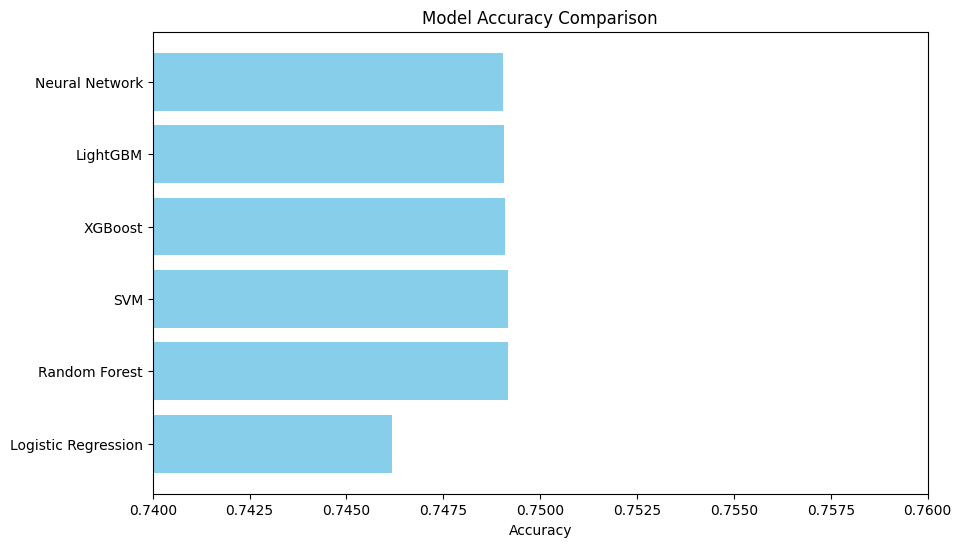

In [3]:
import matplotlib.pyplot as plt

# Data for the models and their accuracy
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM', 'Neural Network']
accuracies = [0.746184, 0.749171, 0.749161, 0.749101, 0.749071, 0.749036]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh( models,accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim([0.74, 0.76])
plt.show()


In [ ]:
# Feature Engineering

In [61]:
import pandas as pd
# Read the modified Traindf_m
Traindf_m = pd.read_csv("C:/Users/ncssa/Downloads/Traindf_loaded_modified.csv")

# Read the modified Testdf_m
Testdf_m = pd.read_csv("C:/Users/ncssa/Downloads/Testdf_loaded_modified.csv")

print("Modified DataFrames read successfully!")


Modified DataFrames read successfully!


In [62]:
Traindf_m['MitreTechniques'][1]

'T1105;T1140;T1216;T1218;T1218.003;T1218.004;T1218.005;T1218.010;T1218.011;T1220'

In [63]:
Testdf_m['MitreTechniques']

0                                                    T1071
1        T1105;T1140;T1216;T1218;T1218.003;T1218.004;T1...
2        T1003;T1005;T1119;T1539;T1550.004;T1552.001;T1...
3                                    T1027;T1047;T1204.002
4                T1027;T1027.002;T1027.005;T1105;T1204.002
                               ...                        
30133                                            T1059.001
30134    T1021.002;T1036.004;T1047;T1059.003;T1543.003;...
30135                      T1003;T1555;T1555.003;T1555.004
30136    T1003;T1003.002;T1003.004;T1012;T1021;T1090.00...
30137                        T1552.001;T1555.003;T1555.004
Name: MitreTechniques, Length: 30138, dtype: object

In [64]:
import pandas as pd

# Combine MitreTechniques from both datasets to get all unique techniques
all_techniques = set()
for df in [Traindf_m, Testdf_m]:
    all_techniques.update(df['MitreTechniques'].str.split(';').explode())

# Generate a DataFrame with one-hot encoding for all techniques
def encode_mitre_techniques(df, all_techniques):
    # Create a dictionary of technique one-hot encodings
    encoded_data = {f"MitreTechniques_{tech}": df['MitreTechniques'].str.contains(fr"\b{tech}\b", regex=True).astype(int)
                    for tech in all_techniques}
    # Concatenate the new one-hot encoded DataFrame with the original
    return pd.concat([df, pd.DataFrame(encoded_data)], axis=1)

# Apply the function to both datasets
Traindf_m = encode_mitre_techniques(Traindf_m, all_techniques)
Testdf_m = encode_mitre_techniques(Testdf_m, all_techniques)

# Drop the original MitreTechniques column if no longer needed
Traindf_m.drop(columns=['MitreTechniques'], inplace=True)
Testdf_m.drop(columns=['MitreTechniques'], inplace=True)


In [65]:
Traindf_m

,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,MitreTechniques_T1074.002,MitreTechniques_T1505.002,MitreTechniques_T1574.002,MitreTechniques_T1567,MitreTechniques_T1546.008,MitreTechniques_T1546.002,MitreTechniques_T1562,MitreTechniques_T1087.002,MitreTechniques_T1114.001,MitreTechniques_T1574.007
0,111,Others,Others,Others,162,132,CommandAndControl,BenignPositive,Ip,Related,...,0,0,0,0,0,0,0,0,0,0
1,690,Others,Others,Others,347,356,DefenseEvasion,BenignPositive,User,Impacted,...,0,0,0,0,0,0,0,0,0,0
2,208,Others,Others,Others,114,92,CredentialAccess,BenignPositive,Process,Related,...,0,0,0,0,0,0,0,0,0,0
3,26,Others,Others,Others,43,28,Malware,BenignPositive,Process,Related,...,0,0,0,0,0,0,0,0,0,0
4,42,Others,Others,Others,43,28,Malware,BenignPositive,File,Related,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,8,Others,Others,Others,138,119,Execution,TruePositive,Machine,Impacted,...,0,0,0,0,0,0,0,0,0,0
30134,445,Others,Others,Others,544,593,LateralMovement,TruePositive,Process,Related,...,0,0,0,0,0,0,0,0,0,0
30135,335,Others,Others,Others,1319,2590,CredentialAccess,TruePositive,Process,Related,...,0,0,0,0,0,0,0,0,0,0
30136,373,Others,Others,Others,315,314,CredentialAccess,TruePositive,File,Related,...,0,0,0,0,0,0,0,0,0,0


In [66]:
Testdf_m.columns

Index(['OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       ...
       'MitreTechniques_T1074.002', 'MitreTechniques_T1505.002',
       'MitreTechniques_T1574.002', 'MitreTechniques_T1567',
       'MitreTechniques_T1546.008', 'MitreTechniques_T1546.002',
       'MitreTechniques_T1562', 'MitreTechniques_T1087.002',
       'MitreTechniques_T1114.001', 'MitreTechniques_T1574.007'],
      dtype='object', length=253)

In [67]:
Traindf_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30138 entries, 0 to 30137
Columns: 253 entries, OrgId to MitreTechniques_T1574.007
dtypes: int32(225), object(28)
memory usage: 32.3+ MB


In [68]:
Testdf_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30138 entries, 0 to 30137
Columns: 253 entries, OrgId to MitreTechniques_T1574.007
dtypes: int32(225), object(28)
memory usage: 32.3+ MB


In [69]:
# Convert all int32 and int64 columns to object type in Traindf_m
Traindf_m[Traindf_m.select_dtypes(include=['int32', 'int64']).columns] = Traindf_m.select_dtypes(include=['int32', 'int64']).astype('object')

# Convert all int32 and int64 columns to object type in Testdf_m
Testdf_m[Testdf_m.select_dtypes(include=['int32', 'int64']).columns] = Testdf_m.select_dtypes(include=['int32', 'int64']).astype('object')

print("All integer columns successfully converted to object type.")


All integer columns successfully converted to object type.


In [70]:
print(Testdf_m[['OSFamily', 'OSVersion']][Testdf_m[['OSFamily', 'OSVersion']].isnull().any(axis=1)])
print(Testdf_m[['OSFamily', 'OSVersion']][Testdf_m[['OSFamily', 'OSVersion']].isnull().any(axis=1)])


Empty DataFrame
Columns: [OSFamily, OSVersion]
Index: []
Empty DataFrame
Columns: [OSFamily, OSVersion]
Index: []


In [71]:
Traindf_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30138 entries, 0 to 30137
Columns: 253 entries, OrgId to MitreTechniques_T1574.007
dtypes: object(253)
memory usage: 58.2+ MB


In [72]:
Testdf_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30138 entries, 0 to 30137
Columns: 253 entries, OrgId to MitreTechniques_T1574.007
dtypes: object(253)
memory usage: 58.2+ MB


In [73]:
import pandas as pd
#save the new modified Traindf_m
Traindf_m.to_csv("C:/Users/ncssa/Downloads/Traindf_new_modified.csv",index = False)

# save the new modified Testdf_m
Testdf_m.to_csv("C:/Users/ncssa/Downloads/Testdf_new_modified.csv", index = False)

print("new_Modified DataFrames saved successfully!")


new_Modified DataFrames saved successfully!


In [74]:
# Example: Assuming columns 24 and 25 should be strings
dtype_dict = {Traindf_m.columns[24]: str, Traindf_m.columns[25]: str}
Traindf_m = pd.read_csv("C:/Users/ncssa/Downloads/Traindf_new_modified.csv", dtype=dtype_dict)
Testdf_m = pd.read_csv("C:/Users/ncssa/Downloads/Testdf_new_modified.csv", dtype=dtype_dict)

print("DataFrames loaded with specified column data types.")


DataFrames loaded with specified column data types.


In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Function to encode data
def encode_data(df):
    # Identify columns for one-hot encoding
    columns_to_encode = [col for col in df.columns if col != 'IncidentGrade' and not col.startswith('MitreTechniques')]
    
    # One-hot encode selected columns
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)
    
    # Label encode 'IncidentGrade'
    df_encoded['IncidentGrade'] = label_encoder.fit_transform(df['IncidentGrade'])
    
    return df_encoded

# Apply encoding to both datasets
Traindf_m_encoded = encode_data(Traindf_m)
Testdf_m_encoded = encode_data(Testdf_m)

# Encoded DataFrames are now ready


In [76]:
Traindf_m_encoded

,IncidentGrade,MitreTechniques_T1570,MitreTechniques_T1220,MitreTechniques_T1003.001,MitreTechniques_T1003.005,MitreTechniques_T1221,MitreTechniques_T1134.001,MitreTechniques_T1563,MitreTechniques_T1090.001,MitreTechniques_T1114,...,OSVersion_4,OSVersion_5,OSVersion_6,OSVersion_66,OSVersion_7,OSVersion_Others,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,LastVerdict_Malicious,LastVerdict_Suspicious
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
1,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
30134,2,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
30135,2,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
30136,2,0,0,0,0,0,0,0,1,0,...,False,False,False,True,False,False,False,True,False,True


In [77]:
Testdf_m_encoded

,IncidentGrade,MitreTechniques_T1570,MitreTechniques_T1220,MitreTechniques_T1003.001,MitreTechniques_T1003.005,MitreTechniques_T1221,MitreTechniques_T1134.001,MitreTechniques_T1563,MitreTechniques_T1090.001,MitreTechniques_T1114,...,OSVersion_4,OSVersion_5,OSVersion_6,OSVersion_66,OSVersion_7,OSVersion_Others,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,LastVerdict_Malicious,LastVerdict_Suspicious
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
1,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
30134,2,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
30135,2,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,True
30136,2,0,0,0,0,0,0,0,1,0,...,False,False,False,True,False,False,False,True,False,True


                    Feature  Importance
435                OrgId_26    0.031458
519                OrgId_42    0.022215
198   MitreTechniques_T1552    0.019956
685            OrgId_Others    0.018324
635                OrgId_79    0.018257
...                     ...         ...
1034         AlertId_188430    0.000000
4019          DeviceId_1630    0.000000
1035         AlertId_188436    0.000000
4021          DeviceId_1637    0.000000
2205         AlertId_424593    0.000000

[8931 rows x 2 columns]


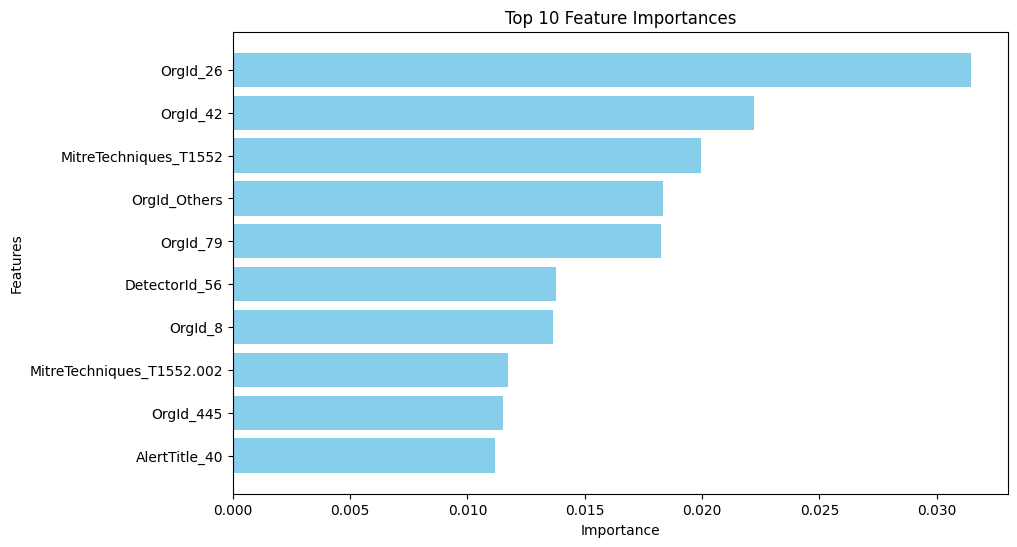

In [78]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Separate features and target from Traindf_m_encoded
X_train = Traindf_m_encoded.drop(columns=['IncidentGrade'])  # Features
y_train = Traindf_m_encoded['IncidentGrade']  # Target

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [79]:
print(feature_importances['Feature'][:20])

435                      OrgId_26
519                      OrgId_42
198         MitreTechniques_T1552
685                  OrgId_Others
635                      OrgId_79
3431                DetectorId_56
640                       OrgId_8
39      MitreTechniques_T1552.002
527                     OrgId_445
3712                AlertTitle_40
441                      OrgId_27
477                     OrgId_337
415                     OrgId_238
209         MitreTechniques_T1003
3852    Category_CredentialAccess
443                     OrgId_274
3040               AlertId_Others
661                       OrgId_9
542                     OrgId_493
3445                DetectorId_62
Name: Feature, dtype: object


In [8]:
import pandas as pd
Traindf_m = pd.read_csv("C:/Users/ncssa/Downloads/Traindf_new_modified.csv")
Testdf_m = pd.read_csv("C:/Users/ncssa/Downloads/Testdf_new_modified.csv")

print("DataFrames loaded with specified column data types.")

C:\Users\ncssa\AppData\Local\Temp\ipykernel_11092\3699532011.py:2: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  Traindf_m = pd.read_csv("C:/Users/ncssa/Downloads/Traindf_new_modified.csv")


DataFrames loaded with specified column data types.


C:\Users\ncssa\AppData\Local\Temp\ipykernel_11092\3699532011.py:3: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  Testdf_m = pd.read_csv("C:/Users/ncssa/Downloads/Testdf_new_modified.csv")


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Function to encode data
def encode_data(df):
    # Identify columns for one-hot encoding
    columns_to_encode = [col for col in df.columns if col != 'IncidentGrade' and not col.startswith('MitreTechniques')]
    
    # One-hot encode selected columns
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)
    
    # Label encode 'IncidentGrade'
    df_encoded['IncidentGrade'] = label_encoder.fit_transform(df['IncidentGrade'])
    
    return df_encoded

# Apply encoding to both datasets
Traindf_m_encoded = encode_data(Traindf_m)
Testdf_m_encoded = encode_data(Testdf_m)

# Encoded DataFrames are now ready


In [10]:
top_10_features = ['OrgId_26','OrgId_42','DetectorId_56','AlertTitle_40',
    'MitreTechniques_T1012','OrgId_8','OrgId_79','OrgId_445','OrgId_337',
    'Category_CredentialAccess','OrgId_Others','DetectorId_62','AlertId_Others','OrgId_274',
    'AlertTitle_46','OrgId_27','OrgId_208','OrgId_238','MitreTechniques_T1552',
    'FolderPath_Others','OrgId_493','OrgId_9','OrgId_373','OrgId_23',
    'Category_Malware',
    'AlertTitle_28',
    'MitreTechniques_T1059.001',
    'FolderPath_9'
]


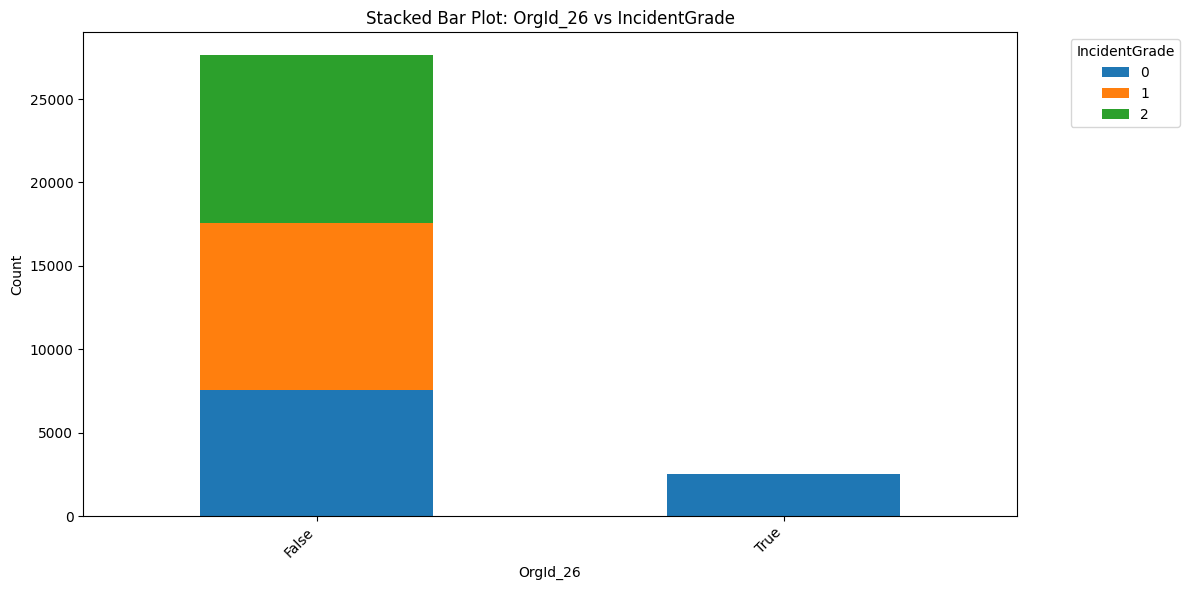

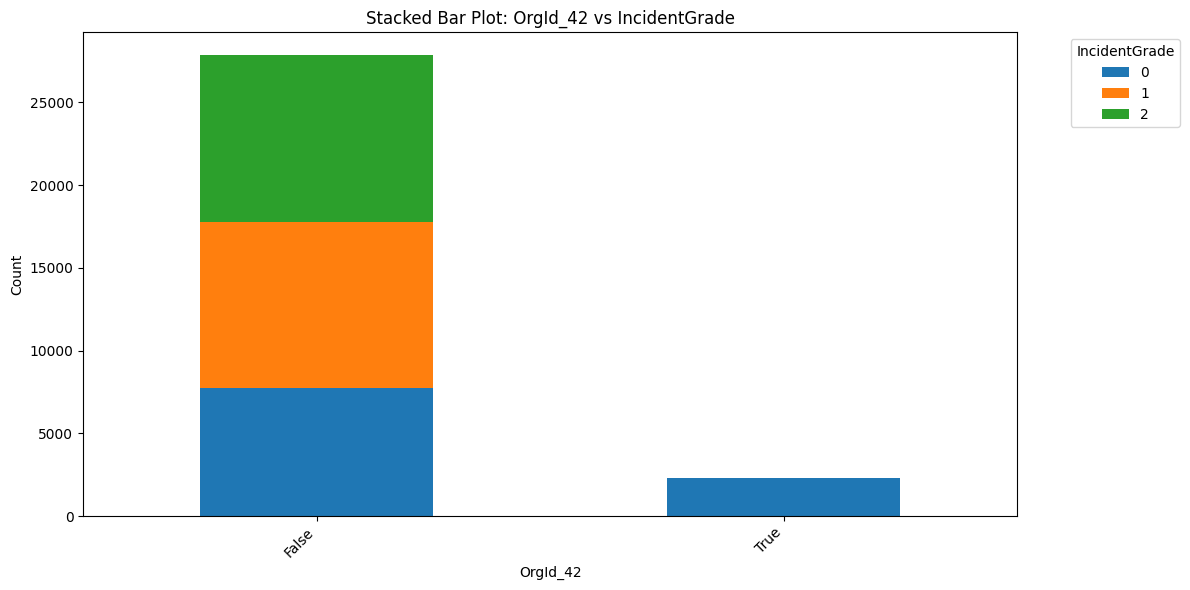

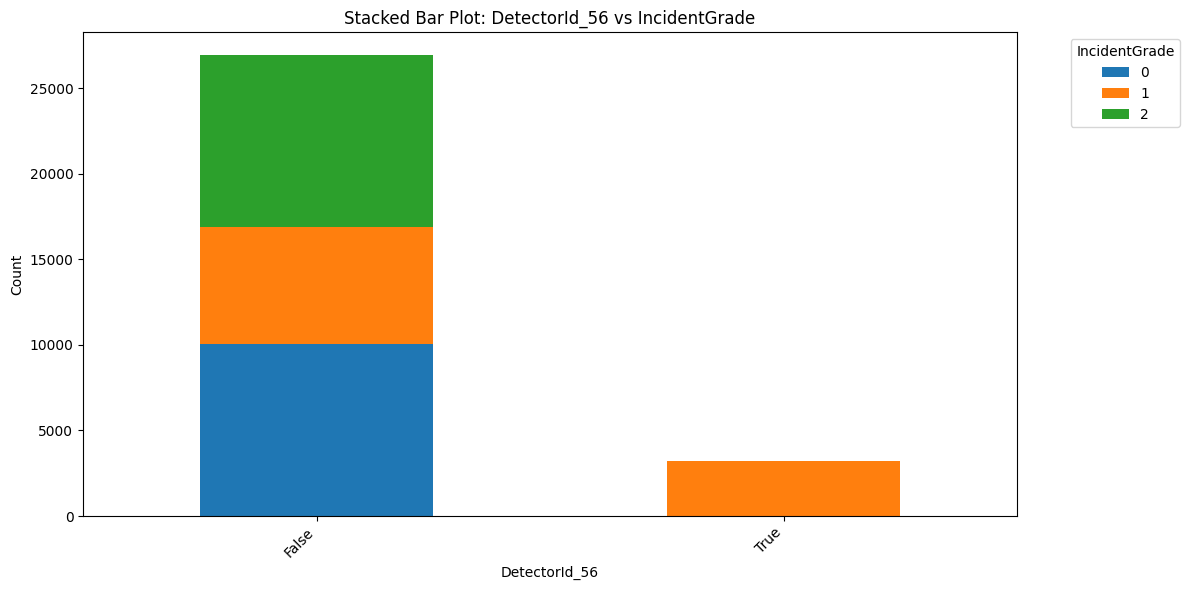

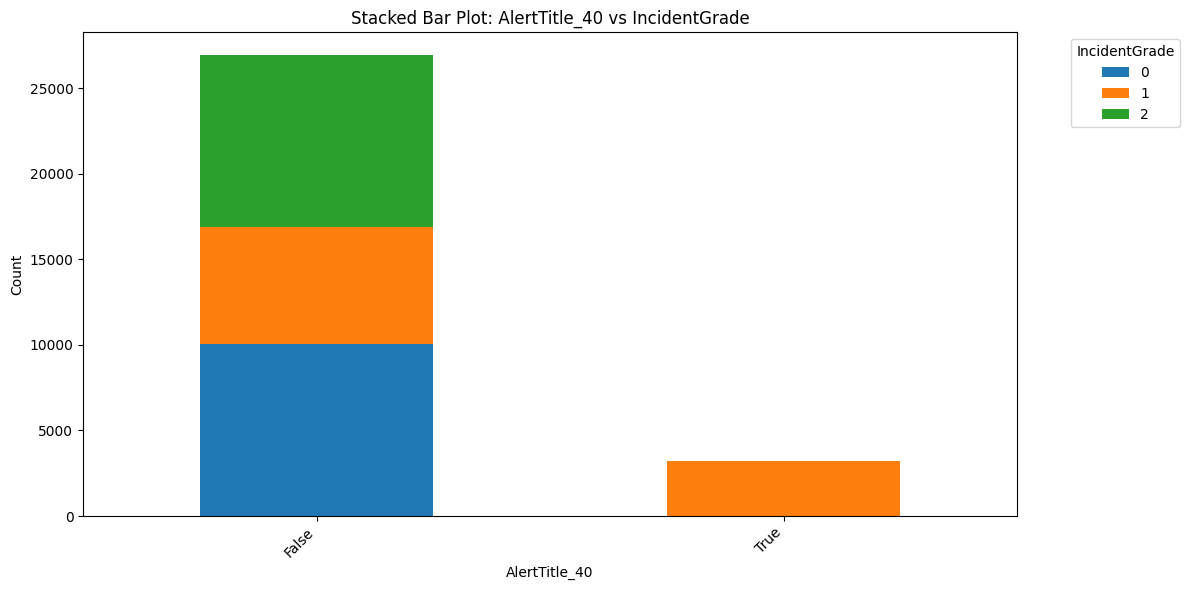

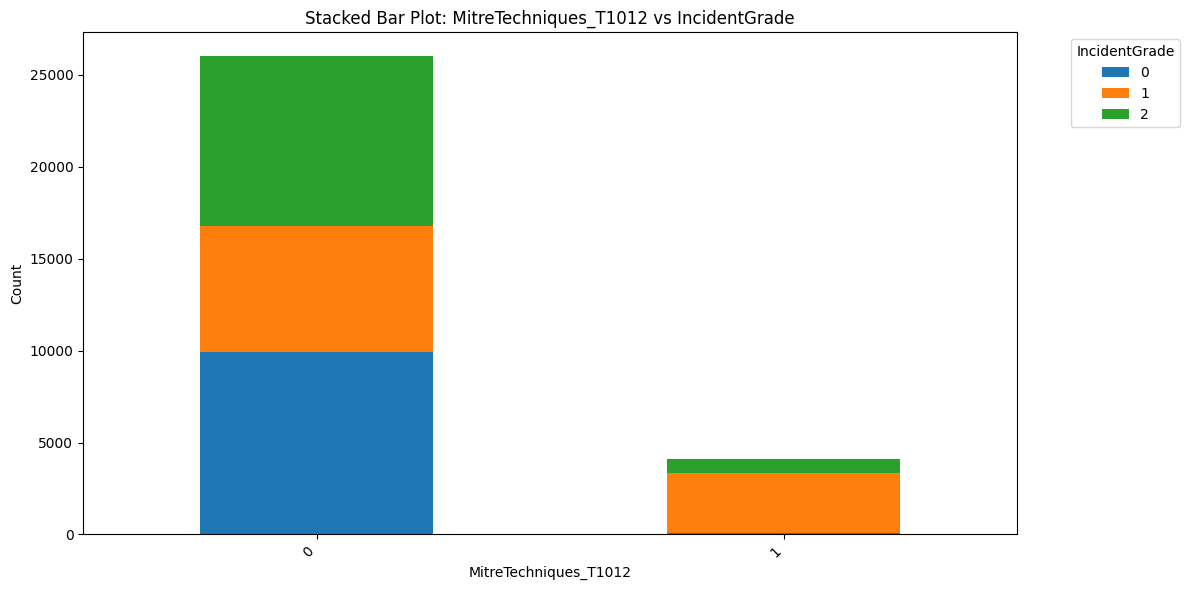

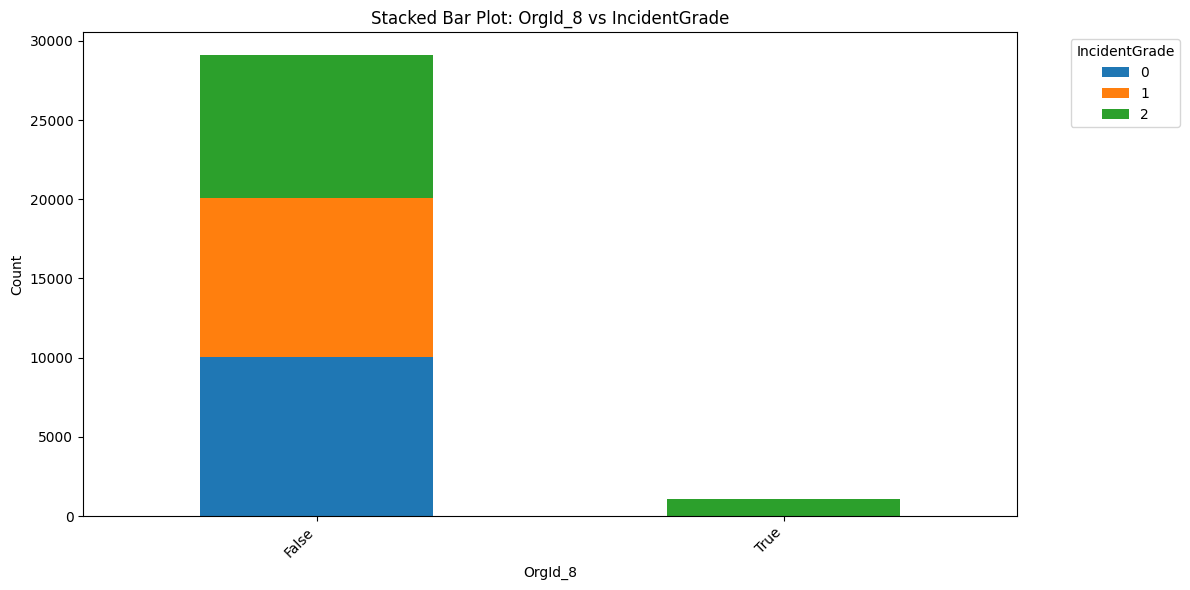

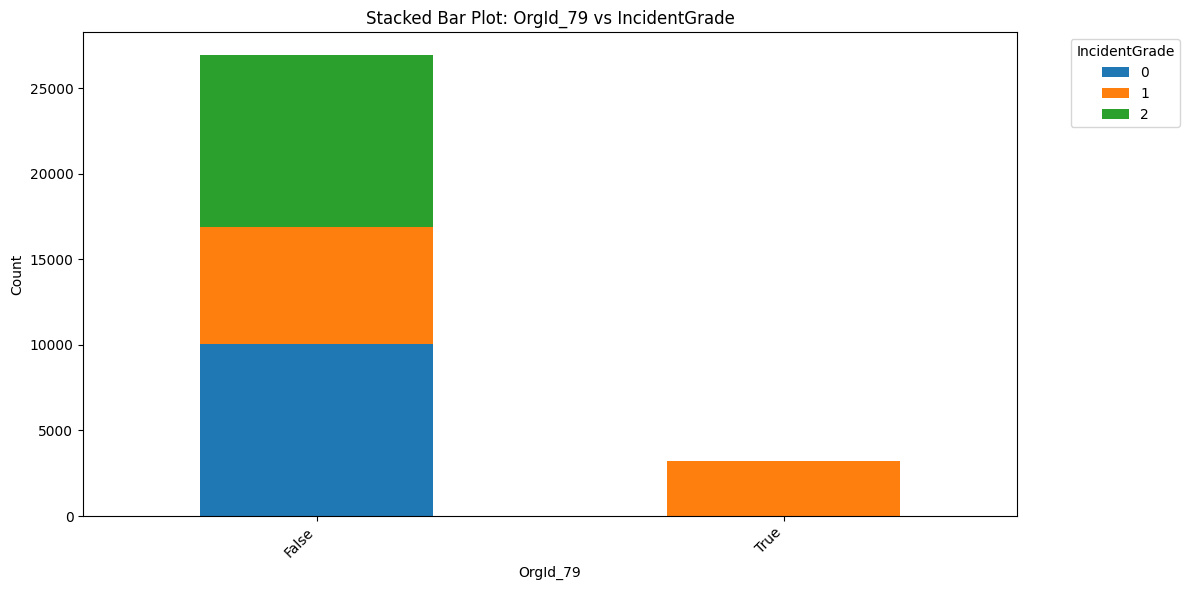

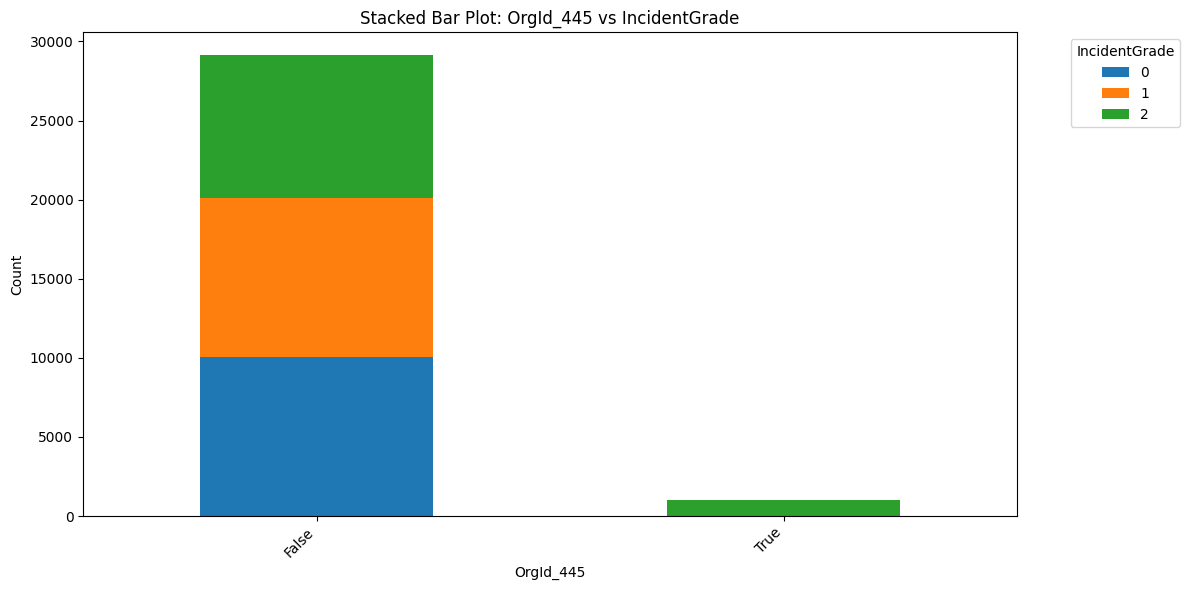

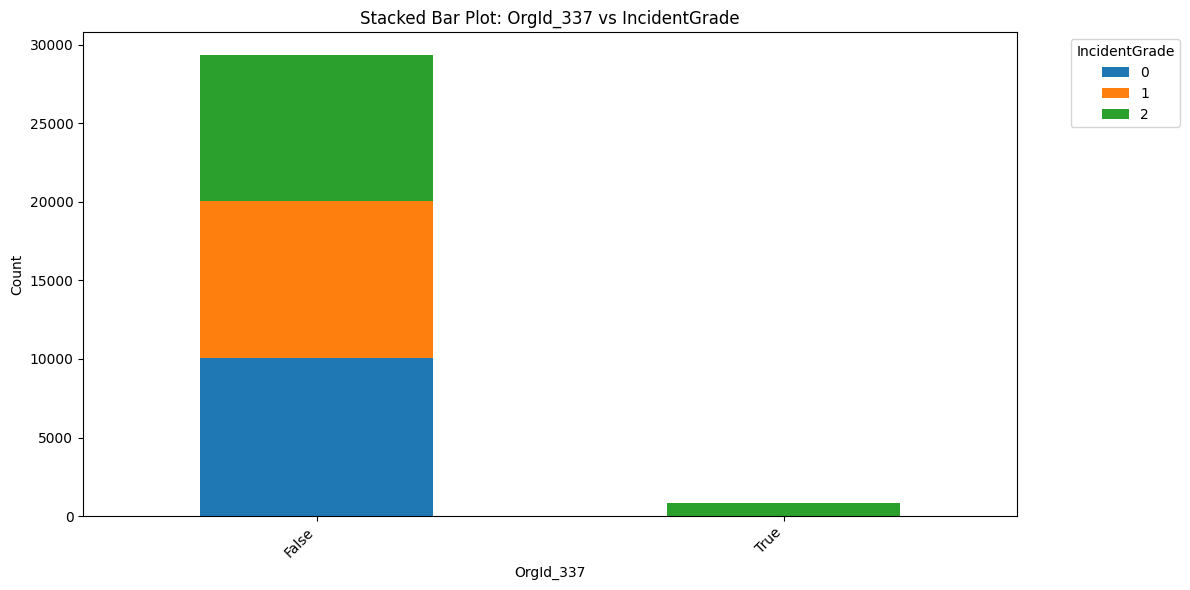

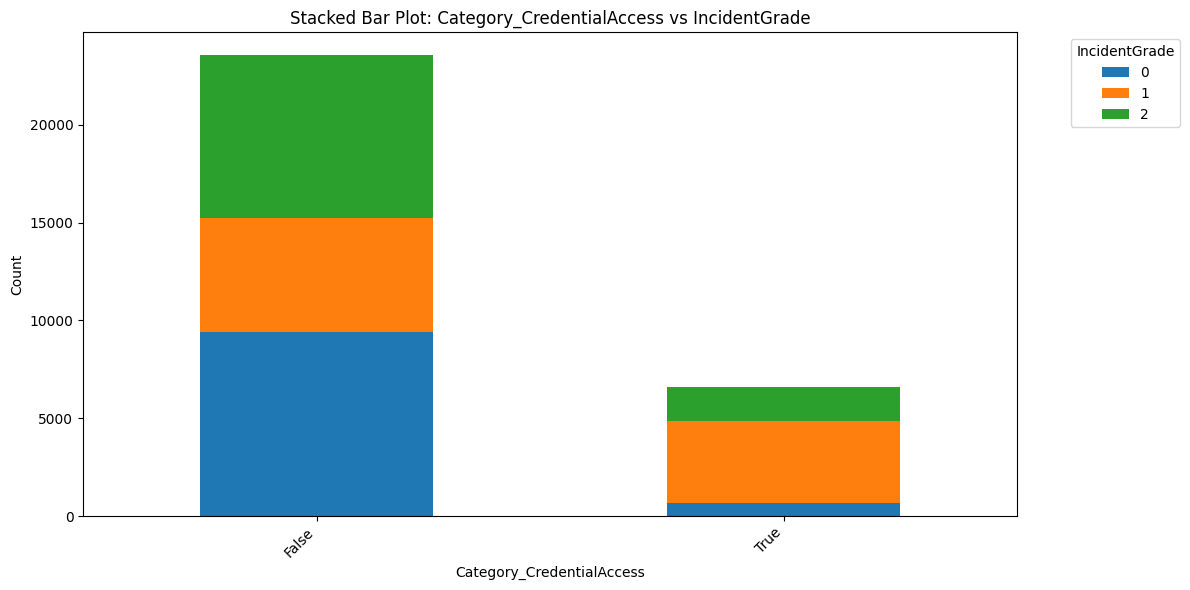

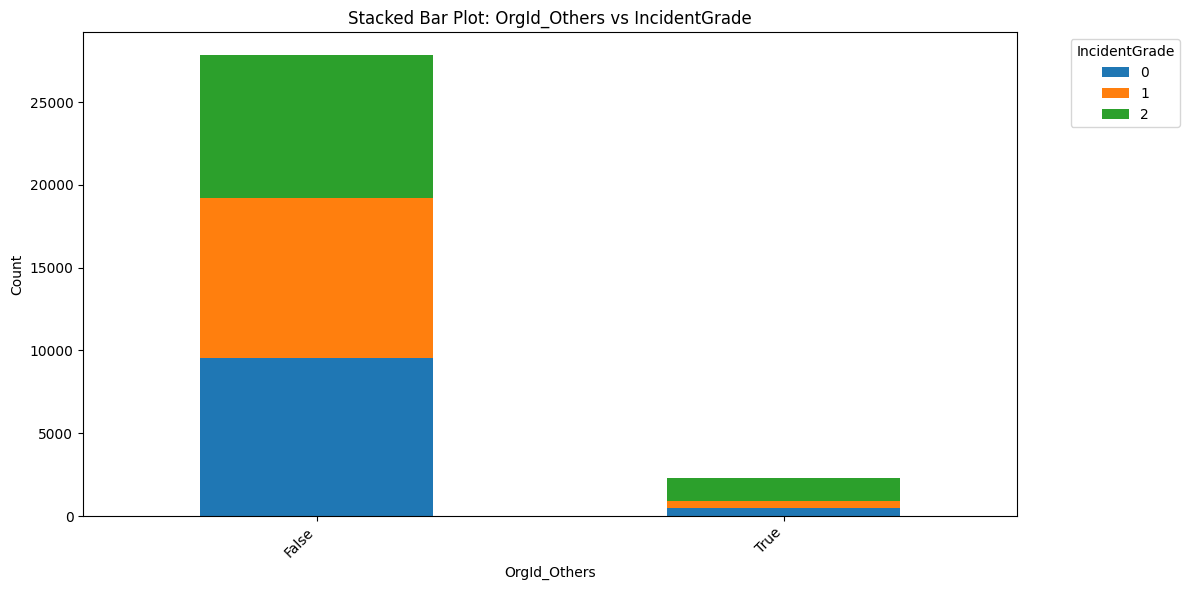

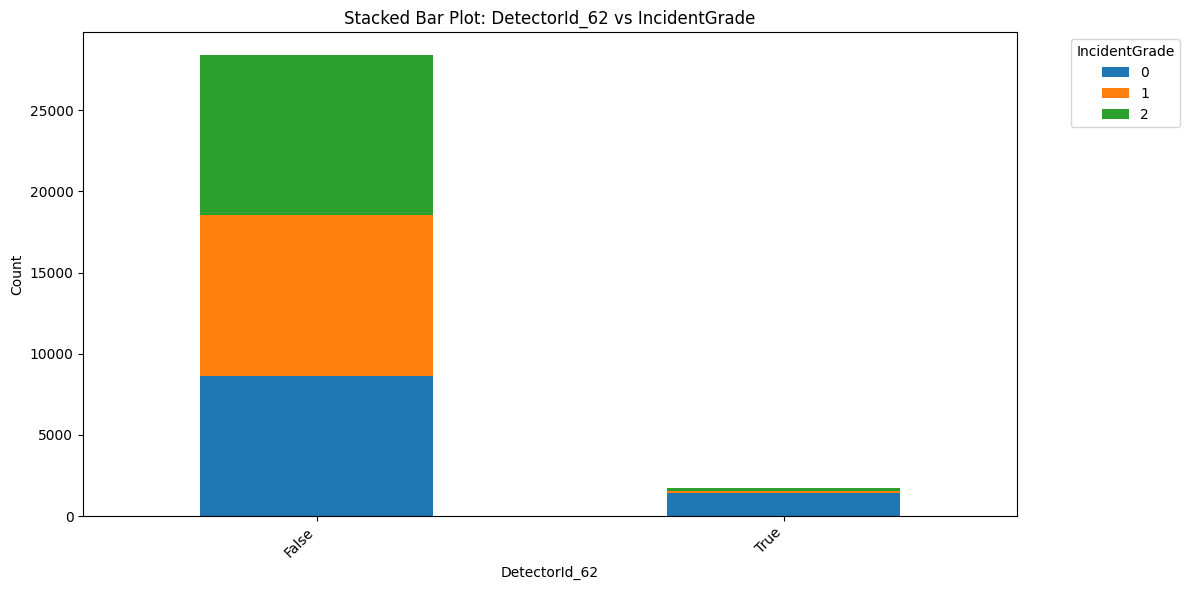

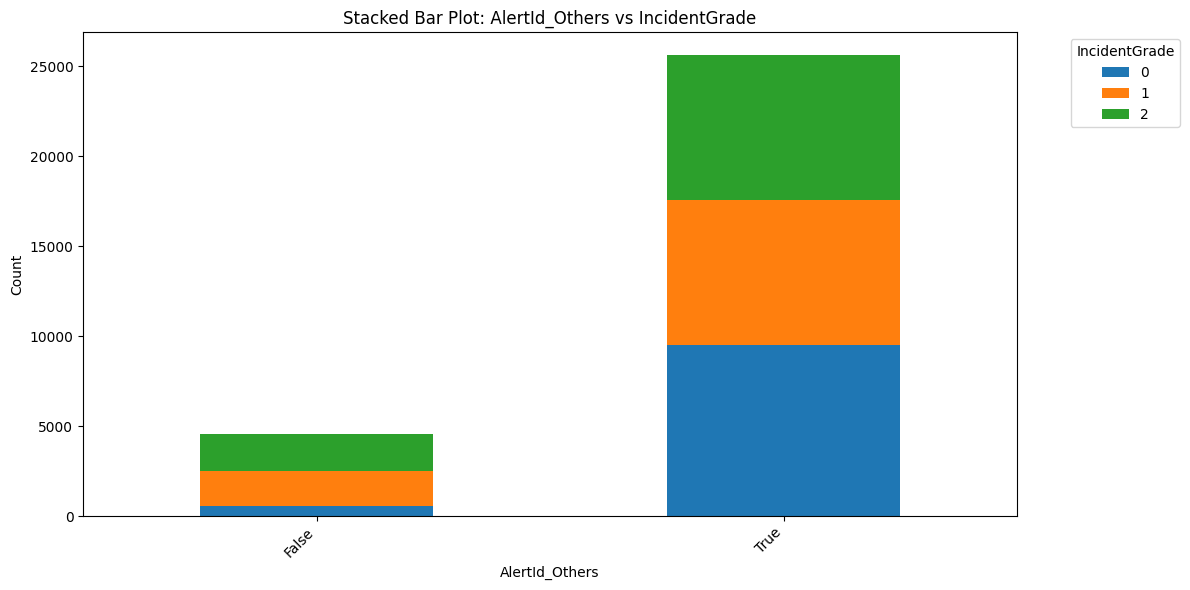

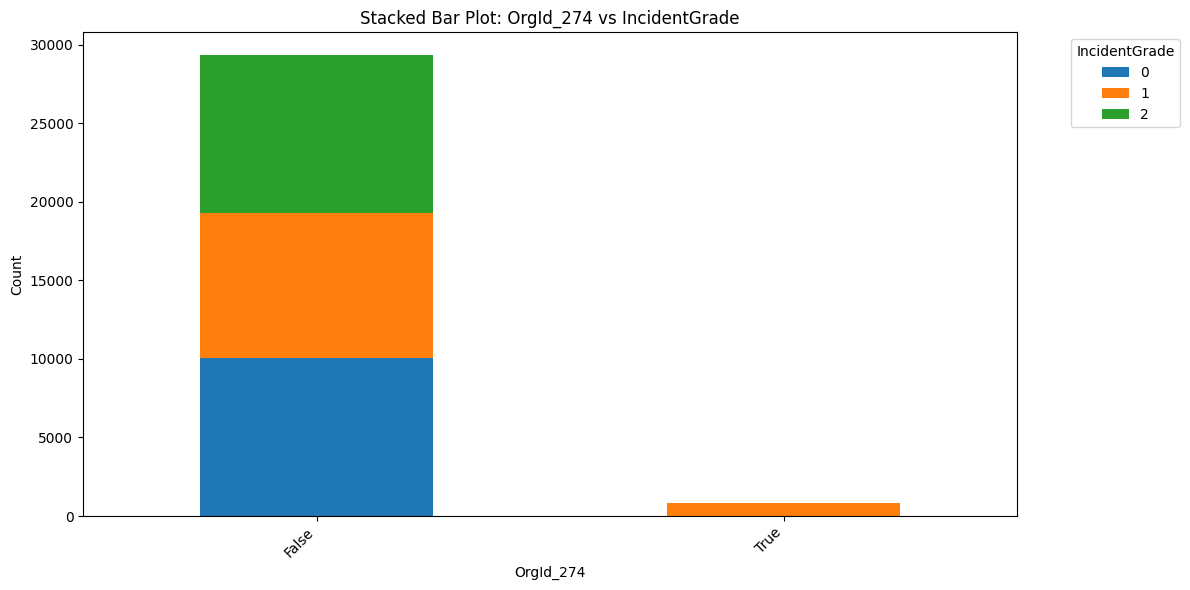

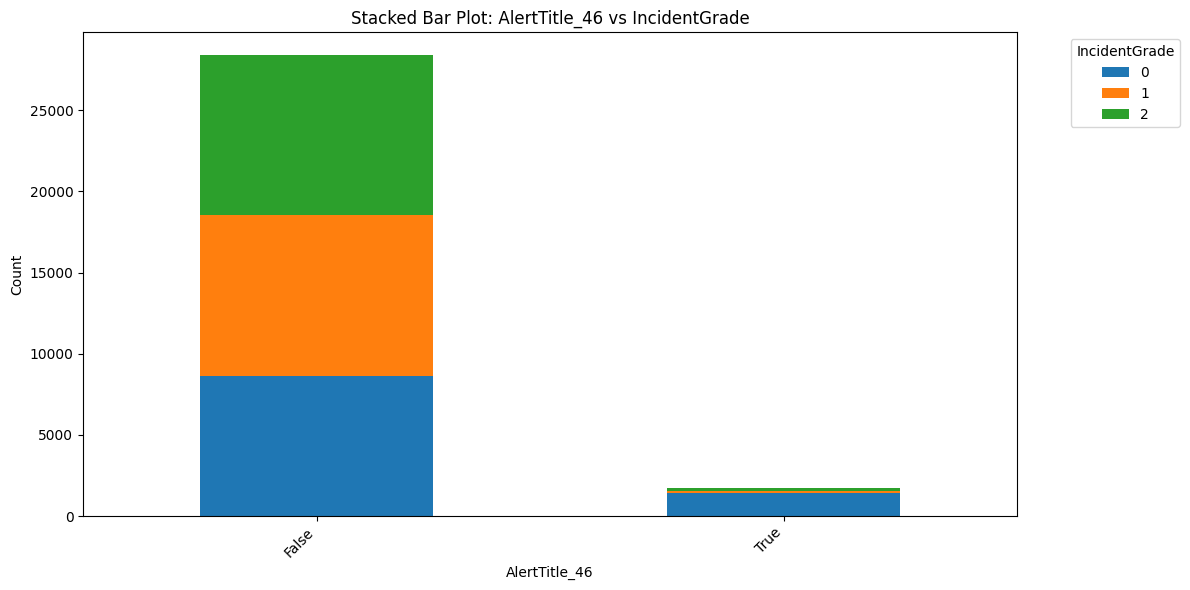

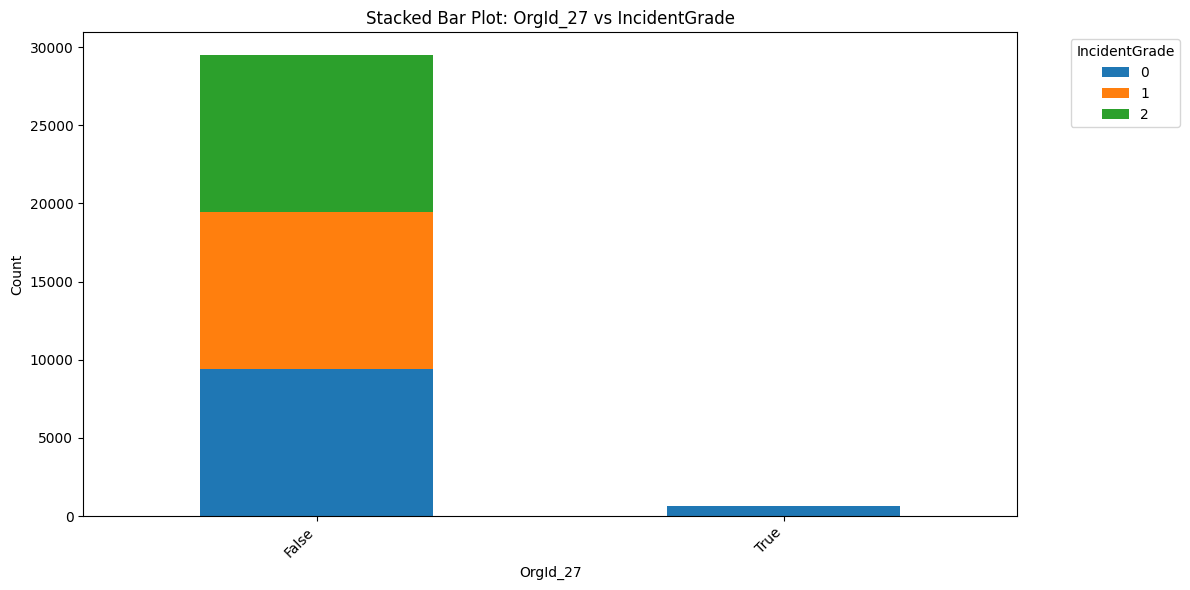

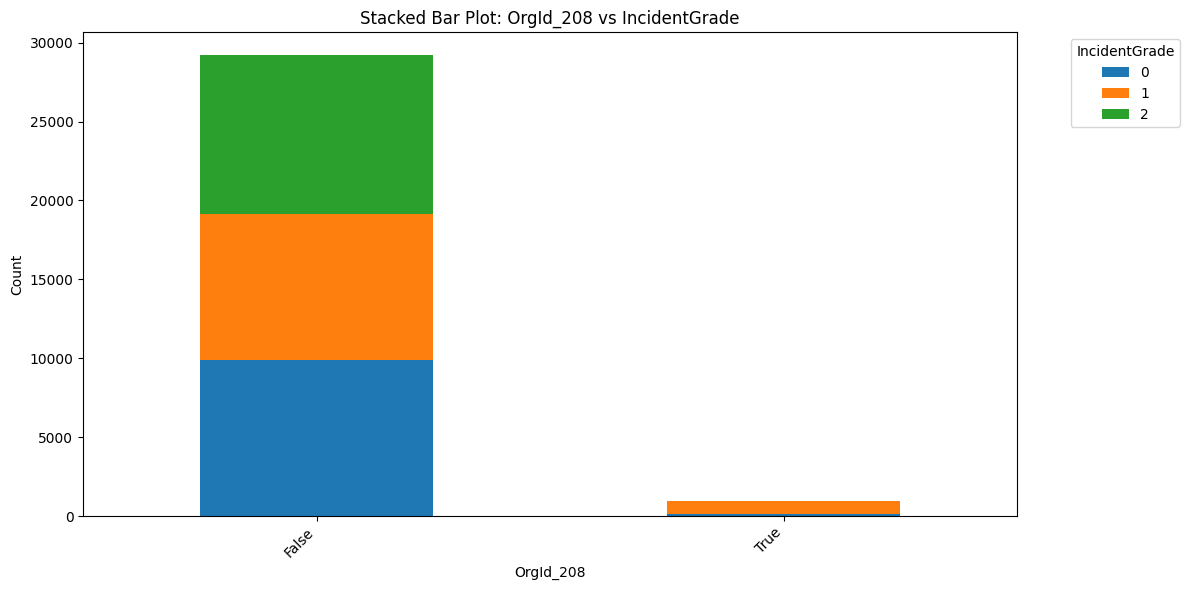

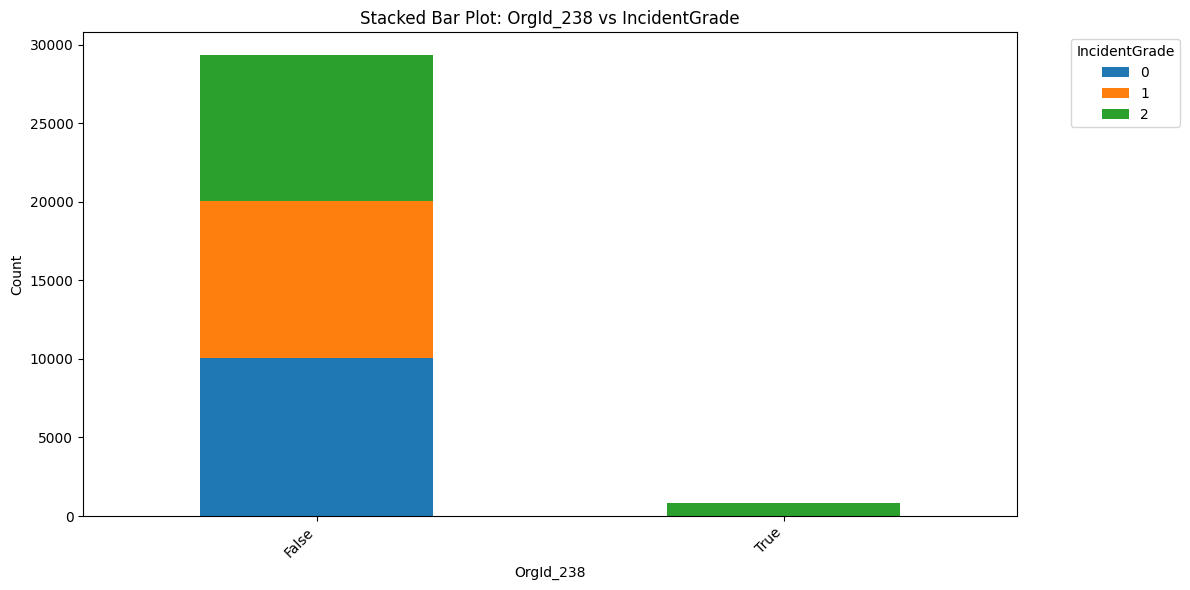

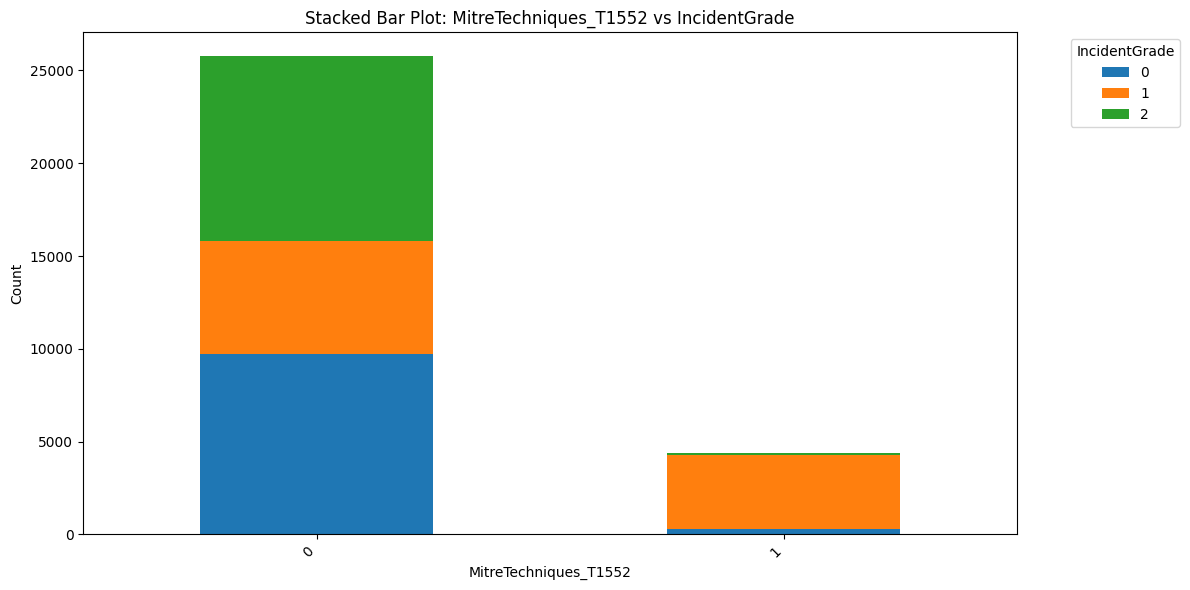

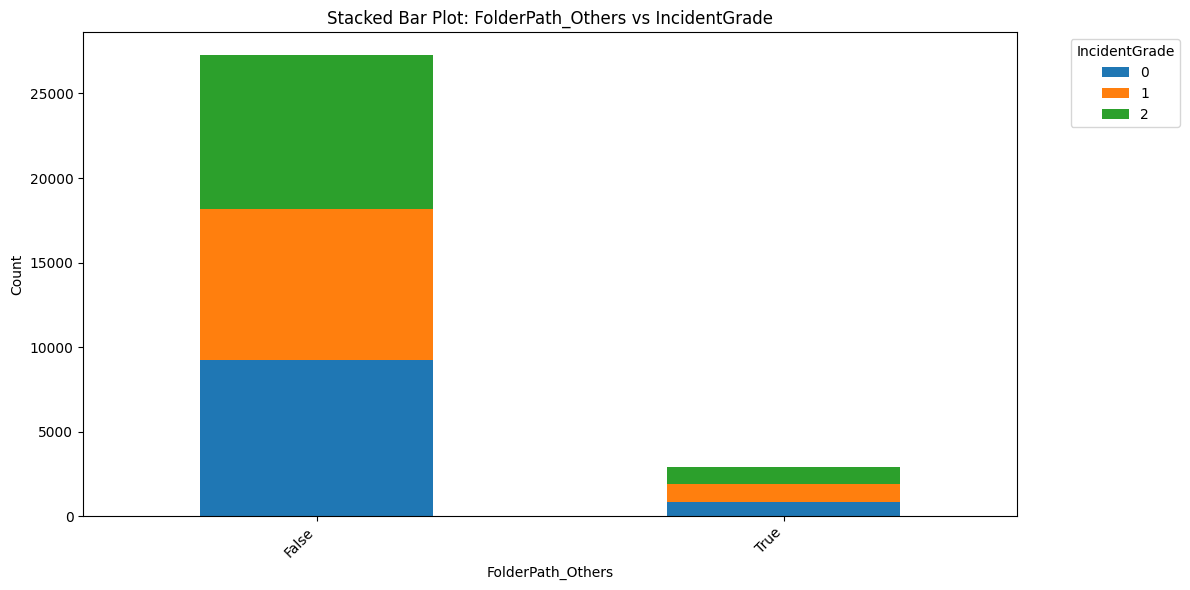

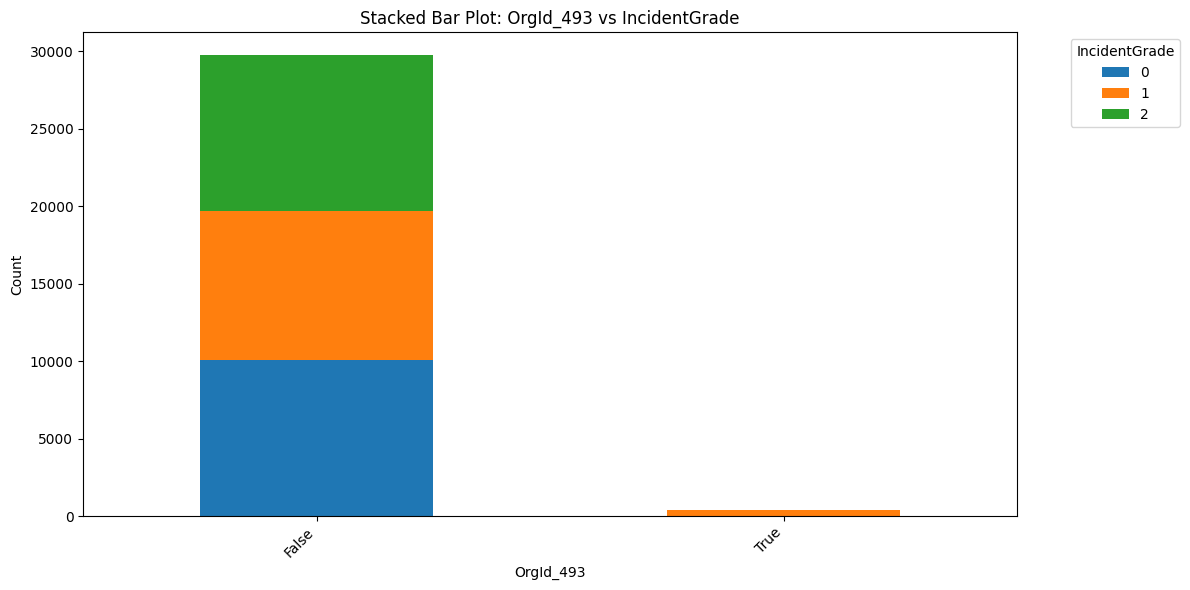

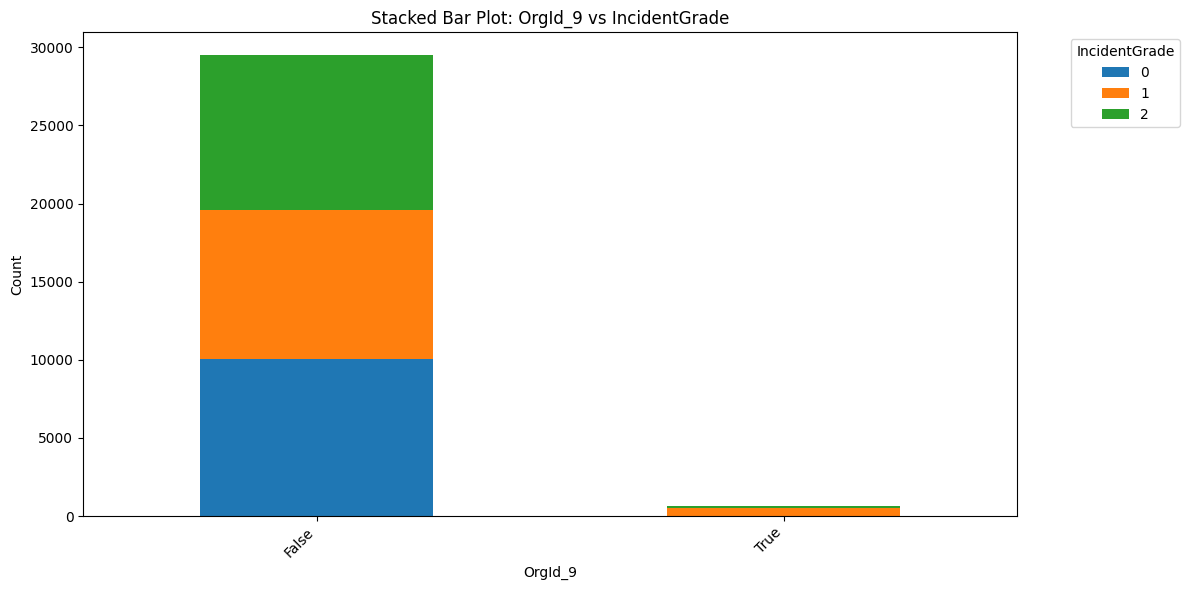

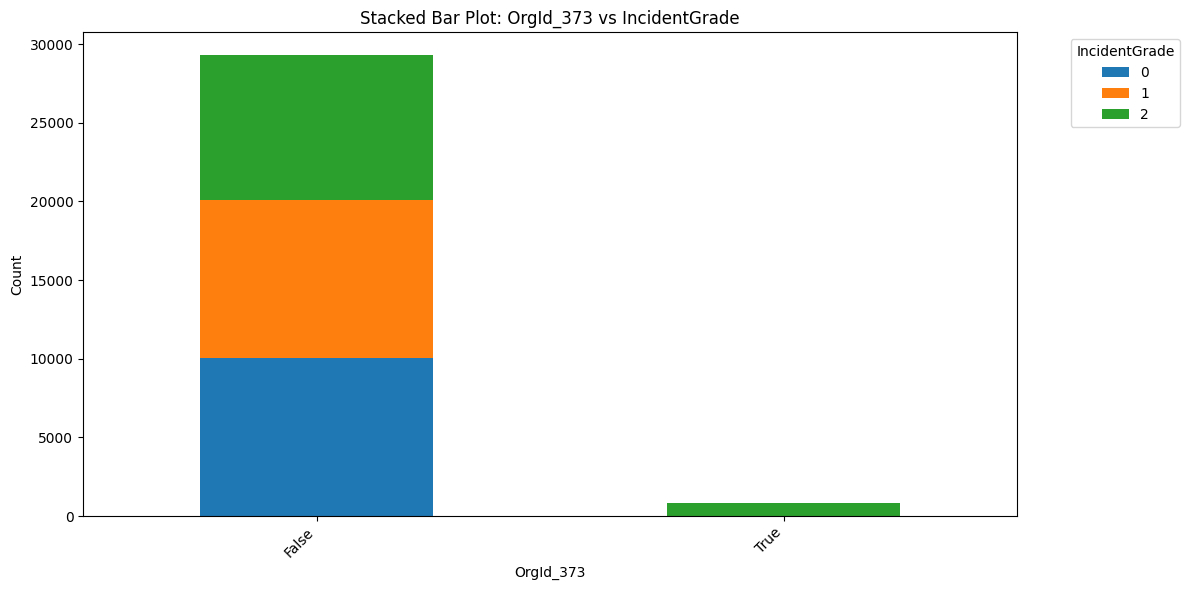

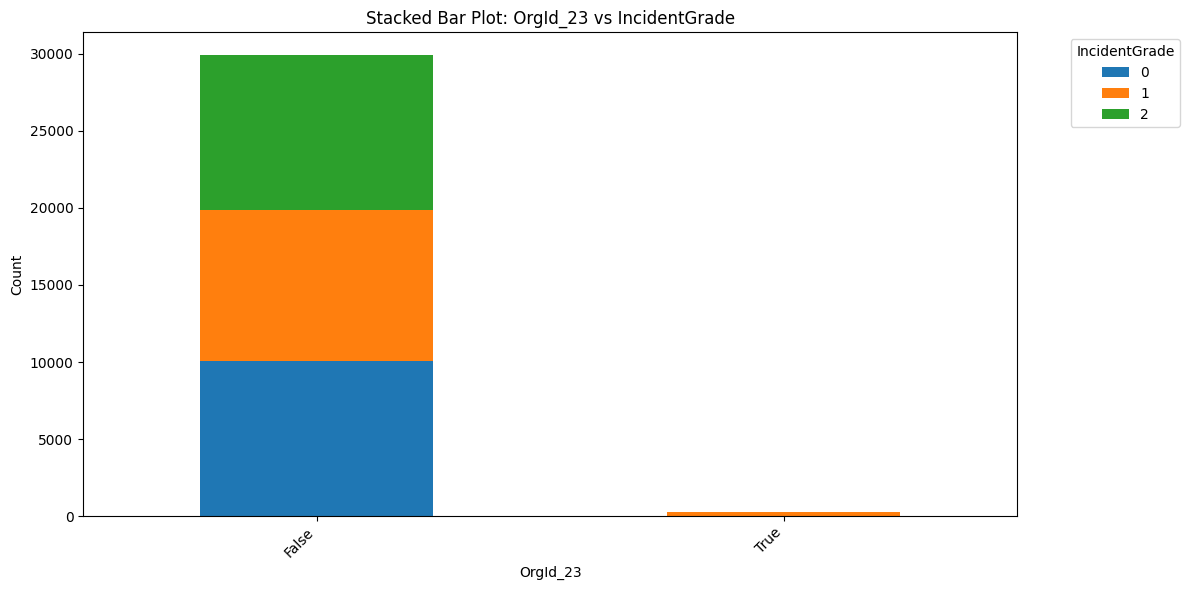

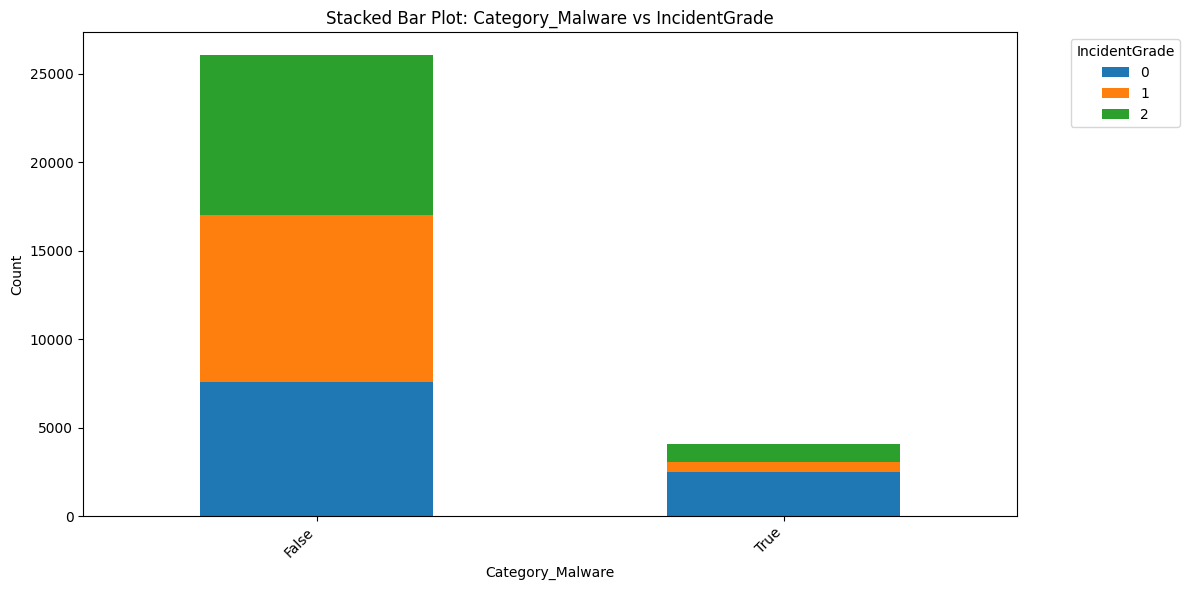

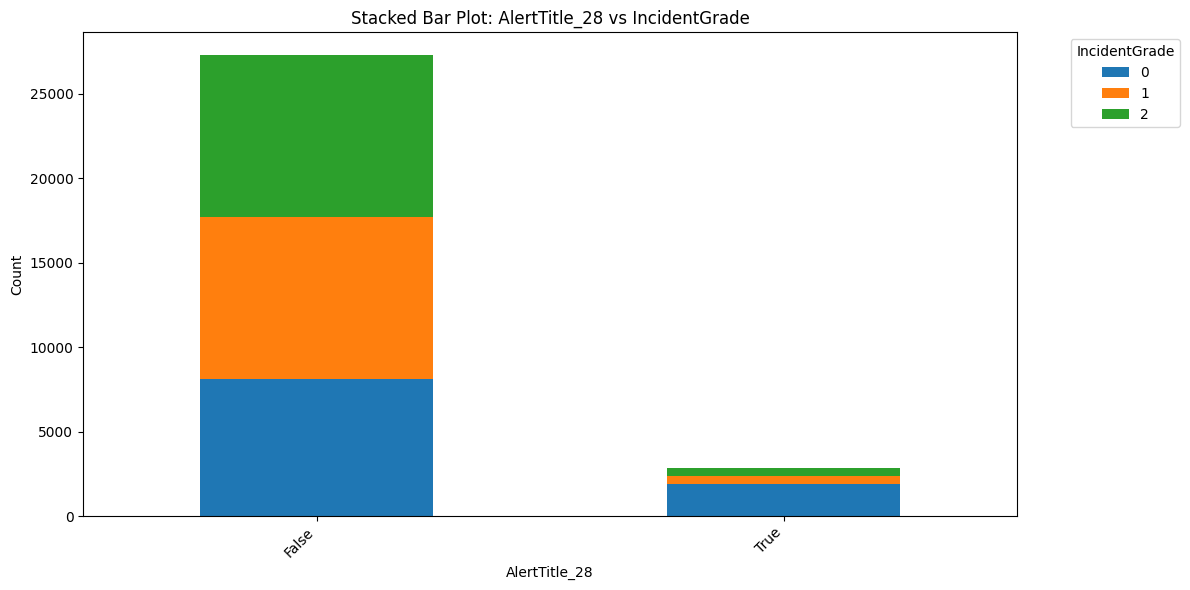

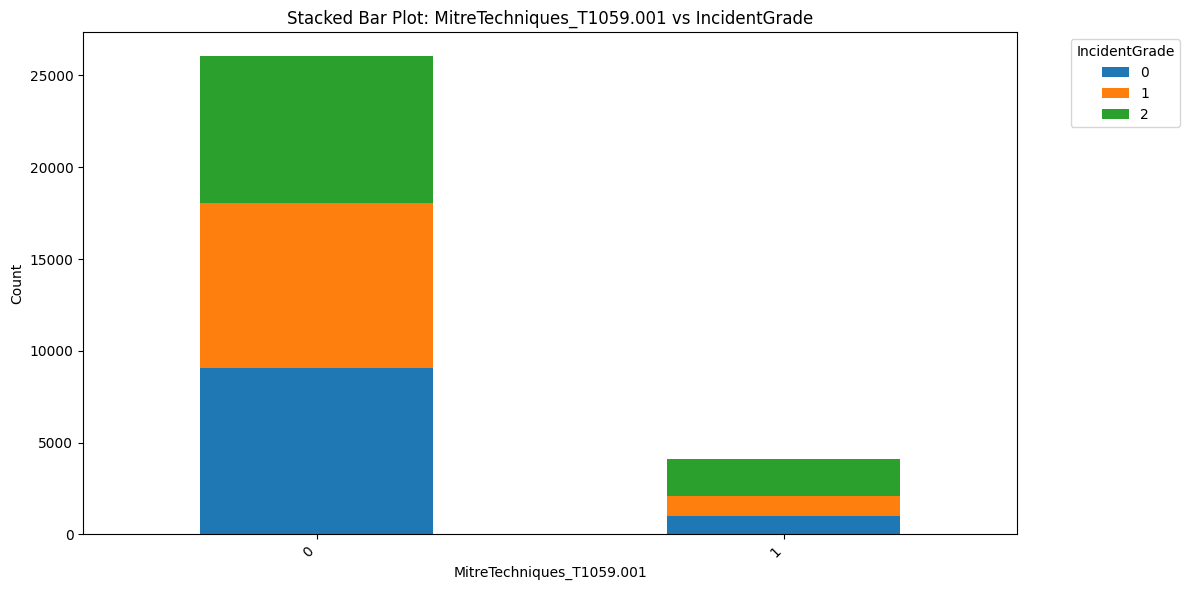

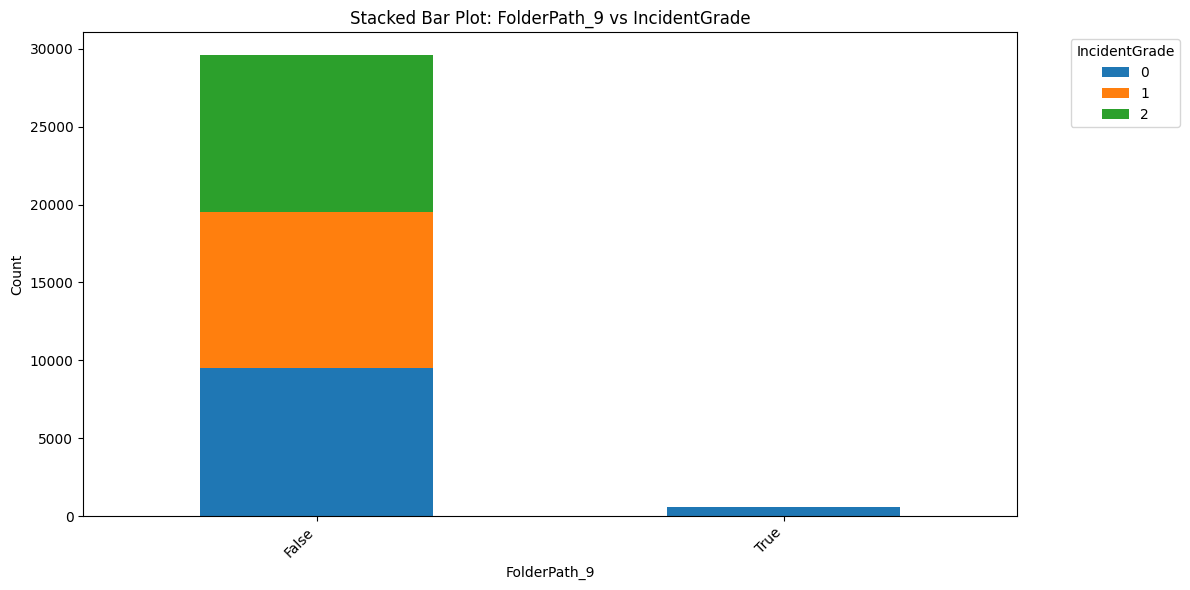

In [11]:
import matplotlib.pyplot as plt

# Create stacked bar plots for each of the top_10 categorical features
for feature in top_10_features:
    # Calculate the count of each category for each class of the target
    count_data = Traindf_m_encoded.groupby([feature, 'IncidentGrade']).size().unstack(fill_value=0)
    
    # Plot stacked bar plot
    count_data.plot(kind='bar', stacked=True, figsize=(12,6))
    
    # Customize plot
    plt.title(f'Stacked Bar Plot: {feature} vs IncidentGrade')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='IncidentGrade', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
import pandas as pd

# List of top 10 important features
top_10_features = ['OrgId_26','OrgId_42','DetectorId_56','AlertTitle_40',
    'MitreTechniques_T1012','OrgId_8','OrgId_79','OrgId_445','OrgId_337',
    'Category_CredentialAccess','OrgId_Others','DetectorId_62','AlertId_Others','OrgId_274',
    'AlertTitle_46','OrgId_27','OrgId_208','OrgId_238','MitreTechniques_T1552',
    'FolderPath_Others','OrgId_493','OrgId_9','OrgId_373','OrgId_23',
    'Category_Malware',
    'AlertTitle_28',
    'MitreTechniques_T1059.001',
    'FolderPath_9'
]

# Extract the selected top 10 features and target variable
X = Traindf_m_encoded[top_10_features]  # Input features
y = Traindf_m_encoded['IncidentGrade']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Dictionary to store evaluation results
model_results = {}

# Train and save each model separately
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the model using joblib
    model_filename = f"C:/Users/ncssa/Downloads/{model_name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, model_filename)
    
    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the evaluation metrics
    model_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']

    }

# Convert the results to a DataFrame
evaluation_df = pd.DataFrame(model_results).T

# Print the evaluation DataFrame
print(evaluation_df)


                     Accuracy  Precision Class 0  Recall Class 0  \
Logistic Regression  0.742203           0.686233        0.806052   
Random Forest        0.753816           0.679108        0.830357   
SVM                  0.753650           0.678282        0.830357   

                     F1-Score Class 0  Precision Class 1  Recall Class 1  \
Logistic Regression          0.741332           0.787353        0.713127   
Random Forest                0.747155           0.858223        0.690319   
SVM                          0.746655           0.857862        0.691333   

                     F1-Score Class 1  Precision Class 2  Recall Class 2  \
Logistic Regression          0.748404           0.769888        0.707209   
Random Forest                0.765169           0.763158        0.739578   
SVM                          0.765647           0.763959        0.738107   

                     F1-Score Class 2  
Logistic Regression          0.737219  
Random Forest                0.751183

In [82]:
# After performing feature engineering, the performance of the models has improved. Here's a breakdown of the results:

# Training Data Performance:
# Accuracy:
# Random Forest (0.753816) and SVM (0.753650) show the highest accuracy, with Logistic Regression slightly behind (0.742203).
# Precision Class 0:
# Logistic Regression performs the best in terms of precision for Class 0 (0.686233), followed closely by Random Forest (0.679108) and SVM (0.678282).
# Recall Class 0:
# Random Forest and SVM both have the same highest recall for Class 0 (0.830357), while Logistic Regression is slightly lower (0.806052).
# F1-Score Class 0:
# Random Forest (0.747155) leads in F1-Score for Class 0, with SVM (0.746655) close behind, and Logistic Regression (0.741332) trailing.
# Precision Class 1:
# Random Forest (0.858223) and SVM (0.857862) show similar performance for Class 1 precision, outperforming Logistic Regression (0.787353).
# Recall Class 1:
# Logistic Regression (0.713127) performs the best in recall for Class 1, while Random Forest (0.690319) and SVM (0.691333) are slightly lower.
# F1-Score Class 1:
# Random Forest (0.765169) and SVM (0.765647) have a strong F1-Score for Class 1, surpassing Logistic Regression (0.748404).
# Precision Class 2:
# Logistic Regression (0.769888) leads in precision for Class 2, closely followed by Random Forest (0.763158) and SVM (0.763959).
# Recall Class 2:
# Random Forest (0.739578) has the highest recall for Class 2, followed by SVM (0.738107). Logistic Regression is the lowest (0.707209).
# F1-Score Class 2:
# Random Forest (0.751183) and SVM (0.750811) have the best F1-Score for Class 2, with Logistic Regression trailing behind (0.737219).


In [83]:
from sklearn.metrics import classification_report
import joblib
import pandas as pd

# Ensure the Test DataFrame contains the same features as training
X_test_unknown = Testdf_m_encoded[top_10_features]
y_test_unknown = Testdf_m_encoded['IncidentGrade']  # Assuming ground truth labels are available

# Dictionary to store evaluation results on unknown data
unknown_results = {}

# Loop through saved models
for model_name in models.keys():
    # Load the trained model
    model_filename = f"C:/Users/ncssa/Downloads/{model_name.replace(' ', '_').lower()}.pkl"
    model = joblib.load(model_filename)
    
    # Predict using the model
    y_pred_unknown = model.predict(X_test_unknown)
    
    # Evaluate the model (if ground truth labels are available)
    report = classification_report(y_test_unknown, y_pred_unknown, output_dict=True)
    
    # Store the evaluation metrics
    unknown_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']
    }

# Convert results to a DataFrame
unknown_evaluation_df = pd.DataFrame(unknown_results).T

# Print the evaluation DataFrame
print("Evaluation on Unknown Data:")
print(unknown_evaluation_df)


Evaluation on Unknown Data:
                     Accuracy  Precision Class 0  Recall Class 0  \
Logistic Regression  0.734919           0.679580        0.799721   
Random Forest        0.745073           0.675145        0.824408   
SVM                  0.744509           0.672946        0.825005   

                     F1-Score Class 0  Precision Class 1  Recall Class 1  \
Logistic Regression          0.734772           0.787130        0.703763   
Random Forest                0.742348           0.845348        0.682859   
SVM                          0.741257           0.847753        0.681764   

                     F1-Score Class 1  Precision Class 2  Recall Class 2  \
Logistic Regression          0.743115           0.754768        0.701274   
Random Forest                0.755465           0.749590        0.727951   
SVM                          0.755752           0.749359        0.726757   

                     F1-Score Class 2  
Logistic Regression          0.727038  
Random Fo

In [ ]:
# Evaluation on Unseen Data:
# Accuracy:
# Random Forest (0.745073) slightly outperforms SVM (0.744509), with Logistic Regression behind (0.734919).
# Precision Class 0:
# Logistic Regression has the highest precision for Class 0 (0.679580), followed by SVM (0.672946) and Random Forest (0.675145).
# Recall Class 0:
# SVM (0.825005) and Random Forest (0.824408) perform similarly for recall in Class 0, slightly better than Logistic Regression (0.799721).
# F1-Score Class 0:
# Random Forest (0.742348) and SVM (0.741257) have the best F1-Score for Class 0, with Logistic Regression (0.734772) trailing.
# Precision Class 1:
# SVM (0.847753) and Random Forest (0.845348) lead in Class 1 precision, with Logistic Regression (0.787130) trailing.
# Recall Class 1:
# Logistic Regression (0.703763) has the highest recall for Class 1, while Random Forest (0.682859) and SVM (0.681764) are slightly lower.
# F1-Score Class 1:
# Random Forest (0.755465) and SVM (0.755752) are the top performers for Class 1 F1-Score, outperforming Logistic Regression (0.743115).
# Precision Class 2:
# SVM (0.749359) and Random Forest (0.749590) show almost identical precision for Class 2, while Logistic Regression is lower (0.754768).
# Recall Class 2:
# Random Forest (0.727951) leads in recall for Class 2, with SVM (0.726757) closely following, and Logistic Regression (0.701274) being the lowest.
# F1-Score Class 2:
# Random Forest (0.738612) and SVM (0.737885) show strong F1-Scores for Class 2, with Logistic Regression behind (0.727038).
# Summary:
# Random Forest and SVM are performing quite similarly after feature engineering, with Random Forest showing a slight advantage in recall and 
#                                         overall F1-Score for Class 2.
# Logistic Regression has seen some improvement, particularly in precision for Class 0 and recall for Class 1, but it still lags behind 
#                                                                                                the other two models in most metrics.
# SVM outperforms Random Forest in precision for Class 1, but Random Forest maintains a lead in recall for Class 0 and Class 2.
# Given these results, Random Forest and SVM would be strong candidates for deployment, with Random Forest perhaps having a slight edge overall
#                                                                      in terms of recall for Class 0 and Class 2.








In [84]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],  # Number of trees
        'max_depth': [None, 10, 20, 30],  # Depth of each tree
        'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
        'min_samples_leaf': [1, 2, 4]     # Minimum samples in a leaf
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],         # Regularization strength
        'kernel': ['linear', 'rbf'],    # Kernel type
        'gamma': ['scale', 'auto']      # Kernel coefficient
    }
}

# Dictionary to store best models and results
best_models = {}
tuned_model_results = {}

for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available processors
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the evaluation metrics
    tuned_model_results[model_name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']
    }

# Convert the tuned results to a DataFrame
tuned_evaluation_df = pd.DataFrame(tuned_model_results).T

# Print the tuned evaluation DataFrame
print("Tuned Model Results:")
print(tuned_evaluation_df)


Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Performing Grid Search for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Performing Grid Search for SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Tuned Model Results:
                                                           Best Params  \
Logistic Regression                        {'C': 1, 'solver': 'lbfgs'}   
Random Forest        {'max_depth': None, 'min_samples_leaf': 2, 'mi...   
SVM                       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}   

                     Accuracy Precision Class 0 Recall Class 0  \
Logistic Regression  0.742203          0.686233       0.806052   
Random Forest        0.753152          0.678586       0.828373   
SVM                  0.753816          0.679108       0.830357   

                    F1-Score Class 0 Precision Class 1 Recall Class 1  \
Logistic Regression         0.7

In [39]:
# After performing grid search with tuning on hyperparameters, here's the updated model performance:

# Tuned Hyperparameters:
# Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
# Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
# SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# Training Data Performance:
# Accuracy:
# SVM (0.753816) achieves the highest accuracy, followed by Random Forest (0.753152), and Logistic Regression is slightly behind at (0.742203).
# Precision Class 0:
# Logistic Regression (0.686233) has the best precision for Class 0, slightly outperforming Random Forest (0.678586) and SVM (0.679108).
# Recall Class 0:
# SVM (0.830357) shows the highest recall for Class 0, followed closely by Random Forest (0.828373), with Logistic Regression being the lowest at
# (0.806052).
# F1-Score Class 0:
# SVM (0.747155) and Random Forest (0.746035) are close, with Logistic Regression at (0.741332).
# Precision Class 1:
# SVM (0.858223) and Random Forest (0.857503) both excel in precision for Class 1, while Logistic Regression lags at (0.787353).
# Recall Class 1:
# Logistic Regression (0.713127) has the highest recall for Class 1, while Random Forest (0.689306) and SVM (0.690319) are slightly lower.
# F1-Score Class 1:
# SVM (0.747155) and Random Forest (0.746035) are top performers, while Logistic Regression stands at (0.748404).
# Precision Class 2:
# SVM (0.763158) and Random Forest (0.762241) perform similarly, with Logistic Regression behind (0.769888).
# Recall Class 2:
# Random Forest (0.740559) has the best recall for Class 2, followed by SVM (0.739578), and Logistic Regression (0.707209).
# F1-Score Class 2:
# Random Forest (0.751244) and SVM (0.751183) outperform Logistic Regression (0.737219)

In [85]:
from sklearn.metrics import classification_report

# Ensure unseen data has the same features as the training data
X_unseen = Testdf_m_encoded[top_10_features]
y_unseen = Testdf_m_encoded['IncidentGrade']

# Dictionary to store evaluation results for unseen data
unseen_results = {}

# Evaluate each tuned model
for model_name, model in best_models.items():
    # Predict on unseen data
    y_pred_unseen = model.predict(X_unseen)
    report = classification_report(y_unseen, y_pred_unseen, output_dict=True)
    
    # Store the evaluation metrics
    unseen_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']
    }

# Convert the results to a DataFrame
unseen_evaluation_df = pd.DataFrame(unseen_results).T

# Print the evaluation results
print("Evaluation on Unseen Data:")
print(unseen_evaluation_df)


Evaluation on Unseen Data:
                     Accuracy  Precision Class 0  Recall Class 0  \
Logistic Regression  0.734919           0.679580        0.799721   
Random Forest        0.744807           0.673904        0.824905   
SVM                  0.745073           0.675145        0.824408   

                     F1-Score Class 0  Precision Class 1  Recall Class 1  \
Logistic Regression          0.734772           0.787130        0.703763   
Random Forest                0.741798           0.847813        0.680968   
SVM                          0.742348           0.845348        0.682859   

                     F1-Score Class 1  Precision Class 2  Recall Class 2  \
Logistic Regression          0.743115           0.754768        0.701274   
Random Forest                0.755286           0.748977        0.728549   
SVM                          0.755465           0.749590        0.727951   

                     F1-Score Class 2  
Logistic Regression          0.727038  
Random For

In [41]:
# Evaluation on Unseen Data:
# Accuracy:
# SVM (0.745073) performs the best, with Random Forest (0.744807) slightly behind, and Logistic Regression (0.734919) trailing.
# Precision Class 0:
# Logistic Regression (0.679580) leads in precision for Class 0, with SVM (0.675145) and Random Forest (0.673904) closely following.
# Recall Class 0:
# SVM (0.824408) and Random Forest (0.824905) perform similarly for recall in Class 0, slightly outperforming Logistic Regression (0.799721).
# F1-Score Class 0:
# SVM (0.742348) and Random Forest (0.741798) are top performers, while Logistic Regression is at (0.734772).
# Precision Class 1:
# SVM (0.845348) and Random Forest (0.847813) both excel in Class 1 precision, with Logistic Regression (0.787130) behind.
# Recall Class 1:
# Logistic Regression (0.703763) has the best recall for Class 1, followed by SVM (0.682859) and Random Forest (0.680968).
# F1-Score Class 1:
# SVM (0.755465) and Random Forest (0.755286) outperform Logistic Regression (0.743115).
# Precision Class 2:
# SVM (0.749590) and Random Forest (0.748977) show almost identical performance in Class 2 precision, while Logistic Regression (0.754768) is
#                                                              slightly behind.
# Recall Class 2:
# Random Forest (0.728549) has the highest recall for Class 2, with SVM (0.727951) just slightly lower, and Logistic Regression (0.701274) trailing.
# F1-Score Class 2:
# Random Forest (0.738621) and SVM (0.738612) perform similarly, with Logistic Regression at (0.727038).
# Summary:
# SVM and Random Forest perform very similarly after hyperparameter tuning, with SVM showing slightly better performance in precision and 
#                                                Random Forest having a slight edge in recall for Class 0 and Class 2.
# Logistic Regression still lags behind the other two models in most metrics but remains competitive in precision for Class 0 and recall for Class 1.







In [88]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
import pandas as pd

# List of top 10 important features
top_10_features = ['OrgId_26','OrgId_42','DetectorId_56','AlertTitle_40',
    'MitreTechniques_T1012','OrgId_8','OrgId_79','OrgId_445','OrgId_337',
    'Category_CredentialAccess','OrgId_Others','DetectorId_62','AlertId_Others','OrgId_274',
    'AlertTitle_46','OrgId_27','OrgId_208','OrgId_238','MitreTechniques_T1552',
    'FolderPath_Others','OrgId_493','OrgId_9','OrgId_373','OrgId_23',
    'Category_Malware',
    'AlertTitle_28',
    'MitreTechniques_T1059.001',
    'FolderPath_9'
]

# Extract the selected top 10 features and target variable
X = Traindf_m_encoded[top_10_features]  # Input features
y = Traindf_m_encoded['IncidentGrade']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    'Logistic Regression smote': LogisticRegression(),
    'Random Forest smote': RandomForestClassifier(),
    'SVM smote': SVC()
}

# Dictionary to store evaluation results
model_results = {}

# Train and save each model separately
for model_name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Save the model using joblib
    model_filename = f"C:/Users/ncssa/Downloads/{model_name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, model_filename)
    
    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the evaluation metrics
    model_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']
    }

# Convert the results to a DataFrame
evaluation_df = pd.DataFrame(model_results).T

# Print the evaluation DataFrame
print(evaluation_df)


                           Accuracy  Precision Class 0  Recall Class 0  \
Logistic Regression smote  0.740876           0.686233        0.806052   
Random Forest smote        0.753484           0.678557        0.830357   
SVM smote                  0.753650           0.678282        0.830357   

                           F1-Score Class 0  Precision Class 1  \
Logistic Regression smote          0.741332           0.789563   
Random Forest smote                0.746821           0.858044   
SVM smote                          0.746655           0.857862   

                           Recall Class 1  F1-Score Class 1  \
Logistic Regression smote        0.705525          0.745182   
Random Forest smote              0.689306          0.764474   
SVM smote                        0.691333          0.765647   

                           Precision Class 2  Recall Class 2  F1-Score Class 2  
Logistic Regression smote           0.763838        0.710642          0.736280  
Random Forest smote    

#### Observations:
# Random Forest and SVM performed similarly with SMOTE, achieving the highest accuracy of approximately 0.7537.
# F1-Score for Class 2 is notably higher for both Random Forest (0.7512) and SVM (0.7508) compared to Logistic Regression (0.7363), 
# indicating better performance for the multi-class scenario.
# Precision and Recall for Class 0 and Class 1 were more balanced across all models, with SVM slightly outperforming the others in terms 
# of F1-Score for Class 1.
# The results suggest that Random Forest and SVM are more robust after SMOTE, particularly in terms of F1-Score, while Logistic Regression
# performs a bit lower across most metrics, especially for Class 2.



In [89]:
from sklearn.metrics import classification_report
import joblib
import pandas as pd

# Ensure the Test DataFrame contains the same features as training
X_test_unknown = Testdf_m_encoded[top_10_features]
y_test_unknown = Testdf_m_encoded['IncidentGrade']  # Assuming ground truth labels are available

# Dictionary to store evaluation results on unknown data
unknown_results = {}

# Loop through saved models
for model_name in models.keys():
    # Load the trained model
    model_filename = f"C:/Users/ncssa/Downloads/{model_name.replace(' ', '_').lower()}.pkl"
    model = joblib.load(model_filename)
    
    # Predict using the model
    y_pred_unknown = model.predict(X_test_unknown)
    
    # Evaluate the model (if ground truth labels are available)
    report = classification_report(y_test_unknown, y_pred_unknown, output_dict=True)
    
    # Store the evaluation metrics
    unknown_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Precision Class 2': report['2']['precision'],
        'Recall Class 2': report['2']['recall'],
        'F1-Score Class 2': report['2']['f1-score']
    }

# Convert results to a DataFrame
unknown_evaluation_df = pd.DataFrame(unknown_results).T

# Print the evaluation DataFrame
print("Evaluation on Unknown Data:")
print(unknown_evaluation_df)


Evaluation on Unknown Data:
                           Accuracy  Precision Class 0  Recall Class 0  \
Logistic Regression smote  0.734123           0.679580        0.799721   
Random Forest smote        0.745006           0.673841        0.825901   
SVM smote                  0.744509           0.672946        0.825005   

                           F1-Score Class 0  Precision Class 1  \
Logistic Regression smote          0.734772           0.792196   
Random Forest smote                0.742162           0.848060   
SVM smote                          0.741257           0.847753   

                           Recall Class 1  F1-Score Class 1  \
Logistic Regression smote        0.695202          0.740537   
Random Forest smote              0.681167          0.755506   
SVM smote                        0.681764          0.755752   

                           Precision Class 2  Recall Class 2  F1-Score Class 2  
Logistic Regression smote           0.748105        0.707446          0.7272

In [ ]:
# The evaluation on unknown data (or out-of-sample data) with SMOTE shows the following key metrics for each model:

# Logistic Regression (SMOTE) on Unknown Data
# Accuracy: 0.7341
# Precision (Class 0): 0.6796
# Recall (Class 0): 0.7997
# F1-Score (Class 0): 0.7348
# Precision (Class 1): 0.7922
# Recall (Class 1): 0.6952
# F1-Score (Class 1): 0.7405
# Precision (Class 2): 0.7481
# Recall (Class 2): 0.7074
# F1-Score (Class 2): 0.7272
# Random Forest (SMOTE) on Unknown Data
# Accuracy: 0.7450
# Precision (Class 0): 0.6738
# Recall (Class 0): 0.8259
# F1-Score (Class 0): 0.7422
# Precision (Class 1): 0.8481
# Recall (Class 1): 0.6812
# F1-Score (Class 1): 0.7555
# Precision (Class 2): 0.7496
# Recall (Class 2): 0.7280
# F1-Score (Class 2): 0.7386
# SVM (SMOTE) on Unknown Data
# Accuracy: 0.7445
# Precision (Class 0): 0.6730
# Recall (Class 0): 0.8250
# F1-Score (Class 0): 0.7413
# Precision (Class 1): 0.8478
# Recall (Class 1): 0.6818
# F1-Score (Class 1): 0.7558
# Precision (Class 2): 0.7494
# Recall (Class 2): 0.7268
# F1-Score (Class 2): 0.7379
# Observations:
# Random Forest and SVM continue to perform similarly, both achieving slightly higher accuracy (0.7450 for Random Forest and 0.7445 for SVM)
#                                                                                               compared to Logistic Regression (0.7341).
# F1-Score for Class 2 remains the highest for Random Forest (0.7386), with SVM following closely behind (0.7379).
# Precision and Recall for Class 0 and Class 1 show that Random Forest and SVM balance the classes effectively with strong performance in both
# recall and precision for Class 0 (with recall values above 0.825).
# Logistic Regression showed slightly weaker results across all metrics when compared to the other two models, particularly in the F1-Score for 
#                                                                                                                     Class 2 and Accuracy.
# Conclusion:
# Random Forest and SVM are the top contenders, with Random Forest performing marginally better in terms of F1-Score for Class 2 on unknown data.
# Both models show good generalization on the unseen data, with high precision and recall across classes.
# Logistic Regression, although effective, lags slightly behind in overall performance, especially for Class 2.


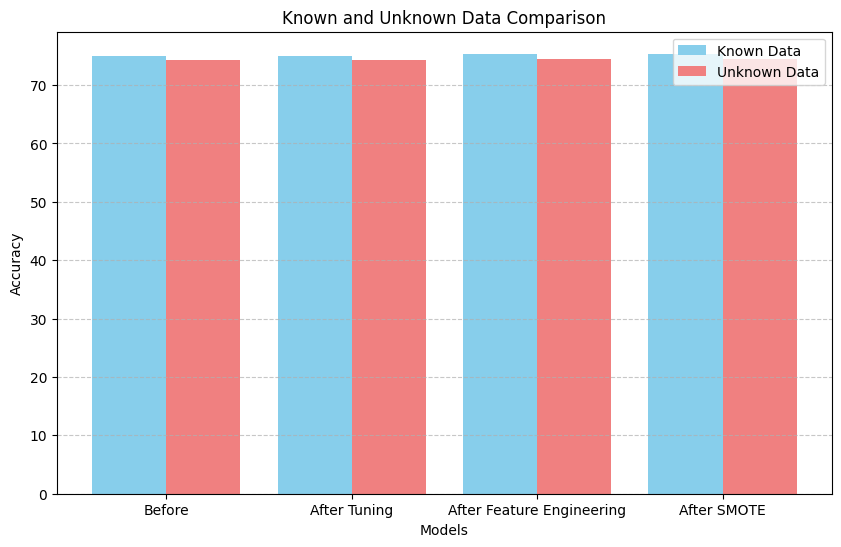

In [5]:
import matplotlib.pyplot as plt

# Data
known_data = [74.91, 74.92, 75.38, 75.34]
unknown_data = [74.3, 74.28, 74.5, 74.5]
labels = ['Before', 'After Tuning', 'After Feature Engineering', 'After SMOTE']

x = range(len(labels))

bar_width = 0.4
plt.figure(figsize=(10, 6))

plt.bar(x, known_data, width=bar_width, label='Known Data', color='skyblue')
plt.bar([i + bar_width for i in x], unknown_data, width=bar_width, label='Unknown Data', color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Known and Unknown Data Comparison')
plt.xticks([i + bar_width/2 for i in x], labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [87]:
# # Random Forest is my choice random_forest.pkl is saved with 
# Accuracy
# known data - 0.753816 (75%)
# unknown data - 0.745073 (74.5%)